***
# Model Deployment : Machine Learning Model Experiment Logging and Tracking Using Open-Source Frameworks

***
### [**John Pauline Pineda**](https://github.com/JohnPaulinePineda) <br> <br> *August 10, 2025*
***

* [**1. Table of Contents**](#TOC)
    * [1.1 Data Background](#1.1)
    * [1.2 Data Description](#1.2)
    * [1.3 Data Quality Assessment](#1.3)
    * [1.4 Data Preprocessing](#1.4)
        * [1.4.1 Data Splitting](#1.4.1)
        * [1.4.2 Data Profiling](#1.4.2)
        * [1.4.3 Category Aggregation and Encoding](#1.4.3)
        * [1.4.4 Outlier and Distributional Shape Analysis](#1.4.4)
        * [1.4.5 Collinearity](#1.4.5)
    * [1.5 Data Exploration](#1.5)
        * [1.5.1 Exploratory Data Analysis](#1.5.1)
        * [1.5.2 Hypothesis Testing](#1.5.2)
    * [1.6 Premodelling Data Preparation](#1.6)
        * [1.6.1 Preprocessed Data Description](#1.6.1)
        * [1.6.2 Preprocessing Pipeline Development](#1.6.2)
    * [1.7 Ensemble Model Development, Logging and Tracking using the MLFlow Framework](#1.7)
        * [1.7.1 Random Forest](#1.7.1)
        * [1.7.2 AdaBoost](#1.7.2)
        * [1.7.3 Gradient Boosting](#1.7.3)
        * [1.7.4 XGBoost](#1.7.4)
        * [1.7.5 Light GBM](#1.7.5)
        * [1.7.6 CatBoost](#1.7.6)
        * [1.7.7 Experiment Organization](#1.7.7)
        * [1.7.8 Run Comparison](#1.7.8)
        * [1.7.9 Artifact Storage](#1.7.9)
        * [1.7.10 Model Registry](#1.7.10)
        * [1.7.11 Model Inference](#1.7.11)
* [**2. Summary**](#Summary)   
* [**3. References**](#References)

***

# 1. Table of Contents <a class="anchor" id="TOC"></a>

## 1.1. Data Background <a class="anchor" id="1.1"></a>

An open [Thyroid Disease Dataset](https://www.kaggle.com/datasets/jainaru/thyroid-disease-data/data) from [Kaggle](https://www.kaggle.com/) (with all credits attributed to [Jai Naru](https://www.kaggle.com/jainaru) and [Abuchi Onwuegbusi](https://www.kaggle.com/datasets/abuchionwuegbusi/thyroid-cancer-recurrence-prediction/data)) was used for the analysis as consolidated from the following primary sources: 
1. Reference Repository entitled **Differentiated Thyroid Cancer Recurrence** from [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/915/differentiated+thyroid+cancer+recurrence)
2. Research Paper entitled **Machine Learning for Risk Stratification of Thyroid Cancer Patients: a 15-year Cohort Study** from the [European Archives of Oto-Rhino-Laryngology](https://link.springer.com/article/10.1007/s00405-023-08299-w)

This study hypothesized that the various clinicopathological characteristics influence differentiated thyroid cancer recurrence between patients.

The dichotomous categorical variable for the study is:
* <span style="color: #FF0000">Recurred</span> - Status of the patient (Yes, Recurrence of differentiated thyroid cancer | No, No recurrence of differentiated thyroid cancer)

The predictor variables for the study are:
* <span style="color: #FF0000">Age</span> - Patient's age (Years)
* <span style="color: #FF0000">Gender</span> - Patient's sex (M | F)
* <span style="color: #FF0000">Smoking</span> - Indication of smoking (Yes | No)
* <span style="color: #FF0000">Hx Smoking</span> - Indication of smoking history (Yes | No)
* <span style="color: #FF0000">Hx Radiotherapy</span> - Indication of radiotherapy history for any condition (Yes | No)
* <span style="color: #FF0000">Thyroid Function</span> - Status of thyroid function (Clinical Hyperthyroidism, Hypothyroidism | Subclinical Hyperthyroidism, Hypothyroidism | Euthyroid)
* <span style="color: #FF0000">Physical Examination</span> - Findings from physical examination including palpation of the thyroid gland and surrounding structures (Normal | Diffuse Goiter | Multinodular Goiter | Single Nodular Goiter Left, Right)
* <span style="color: #FF0000">Adenopathy</span> - Indication of enlarged lymph nodes in the neck region (No | Right | Extensive | Left | Bilateral | Posterior)
* <span style="color: #FF0000">Pathology</span> - Specific thyroid cancer type as determined by pathology examination of biopsy samples (Follicular | Hurthel Cell | Micropapillary | Papillary)
* <span style="color: #FF0000">Focality</span> - Indication if the cancer is limited to one location or present in multiple locations (Uni-Focal | Multi-Focal)
* <span style="color: #FF0000">Risk</span> - Risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type (Low | Intermediate | High)
* <span style="color: #FF0000">T</span> - Tumor classification based on its size and extent of invasion into nearby structures (T1a | T1b | T2 | T3a | T3b | T4a | T4b)
* <span style="color: #FF0000">N</span> - Nodal classification indicating the involvement of lymph nodes (N0 | N1a | N1b)
* <span style="color: #FF0000">M</span> - Metastasis classification indicating the presence or absence of distant metastases (M0 | M1)
* <span style="color: #FF0000">Stage</span> - Overall stage of the cancer, typically determined by combining T, N, and M classifications (I | II | III | IVa | IVb)
* <span style="color: #FF0000">Response</span> - Cancer's response to treatment (Biochemical Incomplete | Indeterminate | Excellent | Structural Incomplete)

## 1.2. Data Description <a class="anchor" id="1.2"></a>

1. The initial tabular dataset was comprised of 383 observations and 17 variables (including 1 target and 16 predictors).
    * **383 rows** (observations)
    * **17 columns** (variables)
        * **1/17 target** (categorical)
             * <span style="color: #FF0000">Recurred</span>
        * **1/17 predictor** (numeric)
             * <span style="color: #FF0000">Age</span>
        * **16/17 predictor** (categorical)
             * <span style="color: #FF0000">Gender</span>
             * <span style="color: #FF0000">Smoking</span>
             * <span style="color: #FF0000">Hx_Smoking</span>
             * <span style="color: #FF0000">Hx_Radiotherapy</span>
             * <span style="color: #FF0000">Thyroid_Function</span>
             * <span style="color: #FF0000">Physical_Examination</span>
             * <span style="color: #FF0000">Adenopathy</span>
             * <span style="color: #FF0000">Pathology</span>
             * <span style="color: #FF0000">Focality</span>
             * <span style="color: #FF0000">Risk</span>
             * <span style="color: #FF0000">T</span>
             * <span style="color: #FF0000">N</span>
             * <span style="color: #FF0000">M</span>
             * <span style="color: #FF0000">Stage</span>
             * <span style="color: #FF0000">Response</span>

In [1]:
##################################
# Loading Python Libraries
##################################
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import itertools
import os
import re
import pickle
%matplotlib inline

import mlflow
from mlflow.tracking import MlflowClient
from mlflow.models.signature import infer_signature
from mlflow.exceptions import RestException
import mlflow.data

import hashlib
import json
from urllib.parse import urlparse
import logging

from operator import truediv
from sklearn.preprocessing import OrdinalEncoder
from scipy import stats
from scipy.stats import pointbiserialr, chi2_contingency

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, ParameterGrid, StratifiedShuffleSplit
from sklearn.base import clone


In [2]:
##################################
# Defining file paths
##################################
DATASETS_ORIGINAL_PATH = r"datasets\original"
DATASETS_FINAL_PATH = r"datasets\final\complete"
DATASETS_FINAL_TRAIN_PATH = r"datasets\final\train"
DATASETS_FINAL_TRAIN_FEATURES_PATH = r"datasets\final\train\features"
DATASETS_FINAL_TRAIN_TARGET_PATH = r"datasets\final\train\target"
DATASETS_FINAL_VALIDATION_PATH = r"datasets\final\validation"
DATASETS_FINAL_VALIDATION_FEATURES_PATH = r"datasets\final\validation\features"
DATASETS_FINAL_VALIDATION_TARGET_PATH = r"datasets\final\validation\target"
DATASETS_FINAL_TEST_PATH = r"datasets\final\test"
DATASETS_FINAL_TEST_FEATURES_PATH = r"datasets\final\test\features"
DATASETS_FINAL_TEST_TARGET_PATH = r"datasets\final\test\target"
DATASETS_PREPROCESSED_PATH = r"datasets\preprocessed"
DATASETS_PREPROCESSED_TRAIN_PATH = r"datasets\preprocessed\train"
DATASETS_PREPROCESSED_TRAIN_FEATURES_PATH = r"datasets\preprocessed\train\features"
DATASETS_PREPROCESSED_TRAIN_TARGET_PATH = r"datasets\preprocessed\train\target"
DATASETS_PREPROCESSED_VALIDATION_PATH = r"datasets\preprocessed\validation"
DATASETS_PREPROCESSED_VALIDATION_FEATURES_PATH = r"datasets\preprocessed\validation\features"
DATASETS_PREPROCESSED_VALIDATION_TARGET_PATH = r"datasets\preprocessed\validation\target"
DATASETS_PREPROCESSED_TEST_PATH = r"datasets\preprocessed\test"
DATASETS_PREPROCESSED_TEST_FEATURES_PATH = r"datasets\preprocessed\test\features"
DATASETS_PREPROCESSED_TEST_TARGET_PATH = r"datasets\preprocessed\test\target"

In [3]:
##################################
# Loading the dataset
# from the DATASETS_ORIGINAL_PATH
##################################
thyroid_cancer = pd.read_csv(os.path.join("..", DATASETS_ORIGINAL_PATH, "Thyroid_Diff.csv"))

In [4]:
##################################
# Performing a general exploration of the dataset
##################################
print('Dataset Dimensions: ')
display(thyroid_cancer.shape)

Dataset Dimensions: 


(383, 17)

In [5]:
##################################
# Listing the column names and data types
##################################
print('Column Names and Data Types:')
display(thyroid_cancer.dtypes)

Column Names and Data Types:


Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiotherapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object
Recurred                object
dtype: object

In [6]:
##################################
# Converting integer columns to float
# for a more convenient downstream processing
##################################
thyroid_cancer = thyroid_cancer.astype({
    col: 'float64' for col in thyroid_cancer.select_dtypes(include='int').columns
})
print('Column Names and Data Types:')
display(thyroid_cancer.dtypes)

Column Names and Data Types:


Age                     float64
Gender                   object
Smoking                  object
Hx Smoking               object
Hx Radiotherapy          object
Thyroid Function         object
Physical Examination     object
Adenopathy               object
Pathology                object
Focality                 object
Risk                     object
T                        object
N                        object
M                        object
Stage                    object
Response                 object
Recurred                 object
dtype: object

In [7]:
##################################
# Renaming and standardizing the column names
# to replace blanks with undercores
##################################
thyroid_cancer.columns = thyroid_cancer.columns.str.replace(" ", "_")

In [8]:
##################################
# Taking a snapshot of the dataset
##################################
thyroid_cancer.head()

,Age,Gender,Smoking,Hx_Smoking,Hx_Radiotherapy,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27.0,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34.0,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30.0,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62.0,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62.0,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [9]:
##################################
# Selecting categorical columns (both object and categorical types)
# and listing the unique categorical levels
##################################
cat_cols = thyroid_cancer.select_dtypes(include=["object", "category"]).columns
for col in cat_cols:
    print(f"Categorical | Object Column: {col}")
    print(thyroid_cancer[col].unique())  
    print("-" * 40)

Categorical | Object Column: Gender
['F' 'M']
----------------------------------------
Categorical | Object Column: Smoking
['No' 'Yes']
----------------------------------------
Categorical | Object Column: Hx_Smoking
['No' 'Yes']
----------------------------------------
Categorical | Object Column: Hx_Radiotherapy
['No' 'Yes']
----------------------------------------
Categorical | Object Column: Thyroid_Function
['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']
----------------------------------------
Categorical | Object Column: Physical_Examination
['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']
----------------------------------------
Categorical | Object Column: Adenopathy
['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']
----------------------------------------
Categorical | Object Column: Pathology
['Micropapillary' 'Papillary' 'Folli

In [10]:
##################################
# Correcting a category level
##################################
thyroid_cancer["Pathology"] = thyroid_cancer["Pathology"].replace("Hurthel cell", "Hurthle Cell")

In [11]:
##################################
# Setting the levels of the categorical variables
##################################
thyroid_cancer['Recurred'] = thyroid_cancer['Recurred'].astype('category')
thyroid_cancer['Recurred'] = thyroid_cancer['Recurred'].cat.set_categories(['No', 'Yes'], ordered=True)
thyroid_cancer['Gender'] = thyroid_cancer['Gender'].astype('category')
thyroid_cancer['Gender'] = thyroid_cancer['Gender'].cat.set_categories(['M', 'F'], ordered=True)
thyroid_cancer['Smoking'] = thyroid_cancer['Smoking'].astype('category')
thyroid_cancer['Smoking'] = thyroid_cancer['Smoking'].cat.set_categories(['No', 'Yes'], ordered=True)
thyroid_cancer['Hx_Smoking'] = thyroid_cancer['Hx_Smoking'].astype('category')
thyroid_cancer['Hx_Smoking'] = thyroid_cancer['Hx_Smoking'].cat.set_categories(['No', 'Yes'], ordered=True)
thyroid_cancer['Hx_Radiotherapy'] = thyroid_cancer['Hx_Radiotherapy'].astype('category')
thyroid_cancer['Hx_Radiotherapy'] = thyroid_cancer['Hx_Radiotherapy'].cat.set_categories(['No', 'Yes'], ordered=True)
thyroid_cancer['Thyroid_Function'] = thyroid_cancer['Thyroid_Function'].astype('category')
thyroid_cancer['Thyroid_Function'] = thyroid_cancer['Thyroid_Function'].cat.set_categories(['Euthyroid', 'Subclinical Hypothyroidism', 'Subclinical Hyperthyroidism', 'Clinical Hypothyroidism', 'Clinical Hyperthyroidism'], ordered=True)
thyroid_cancer['Physical_Examination'] = thyroid_cancer['Physical_Examination'].astype('category')
thyroid_cancer['Physical_Examination'] = thyroid_cancer['Physical_Examination'].cat.set_categories(['Normal', 'Single nodular goiter-left', 'Single nodular goiter-right', 'Multinodular goiter', 'Diffuse goiter'], ordered=True)
thyroid_cancer['Adenopathy'] = thyroid_cancer['Adenopathy'].astype('category')
thyroid_cancer['Adenopathy'] = thyroid_cancer['Adenopathy'].cat.set_categories(['No', 'Left', 'Right', 'Bilateral', 'Posterior', 'Extensive'], ordered=True)
thyroid_cancer['Pathology'] = thyroid_cancer['Pathology'].astype('category')
thyroid_cancer['Pathology'] = thyroid_cancer['Pathology'].cat.set_categories(['Hurthle Cell', 'Follicular', 'Micropapillary', 'Papillary'], ordered=True)
thyroid_cancer['Focality'] = thyroid_cancer['Focality'].astype('category')
thyroid_cancer['Focality'] = thyroid_cancer['Focality'].cat.set_categories(['Uni-Focal', 'Multi-Focal'], ordered=True)
thyroid_cancer['Risk'] = thyroid_cancer['Risk'].astype('category')
thyroid_cancer['Risk'] = thyroid_cancer['Risk'].cat.set_categories(['Low', 'Intermediate', 'High'], ordered=True)
thyroid_cancer['T'] = thyroid_cancer['T'].astype('category')
thyroid_cancer['T'] = thyroid_cancer['T'].cat.set_categories(['T1a', 'T1b', 'T2', 'T3a', 'T3b', 'T4a', 'T4b'], ordered=True)
thyroid_cancer['N'] = thyroid_cancer['N'].astype('category')
thyroid_cancer['N'] = thyroid_cancer['N'].cat.set_categories(['N0', 'N1a', 'N1b'], ordered=True)
thyroid_cancer['M'] = thyroid_cancer['M'].astype('category')
thyroid_cancer['M'] = thyroid_cancer['M'].cat.set_categories(['M0', 'M1'], ordered=True)
thyroid_cancer['Stage'] = thyroid_cancer['Stage'].astype('category')
thyroid_cancer['Stage'] = thyroid_cancer['Stage'].cat.set_categories(['I', 'II', 'III', 'IVA', 'IVB'], ordered=True)
thyroid_cancer['Response'] = thyroid_cancer['Response'].astype('category')
thyroid_cancer['Response'] = thyroid_cancer['Response'].cat.set_categories(['Excellent', 'Structural Incomplete', 'Biochemical Incomplete', 'Indeterminate'], ordered=True)

In [12]:
##################################
# Performing a general exploration of the numeric variables
##################################
print('Numeric Variable Summary:')
display(thyroid_cancer.describe(include='number').transpose())

Numeric Variable Summary:


,count,mean,std,min,25%,50%,75%,max
Age,383.0,40.866841,15.134494,15.0,29.0,37.0,51.0,82.0


In [13]:
##################################
# Performing a general exploration of the categorical variables
##################################
print('Categorical Variable Summary:')
display(thyroid_cancer.describe(include='category').transpose())

Categorical Variable Summary:


,count,unique,top,freq
Gender,383,2,F,312
Smoking,383,2,No,334
Hx_Smoking,383,2,No,355
Hx_Radiotherapy,383,2,No,376
Thyroid_Function,383,5,Euthyroid,332
Physical_Examination,383,5,Single nodular goiter-right,140
Adenopathy,383,6,No,277
Pathology,383,4,Papillary,287
Focality,383,2,Uni-Focal,247
Risk,383,3,Low,249


In [14]:
##################################
# Performing a general exploration of the categorical variable levels
# based on the ordered categories
##################################
ordered_cat_cols = thyroid_cancer.select_dtypes(include=["category"]).columns
for col in ordered_cat_cols:
    print(f"Column: {col}")
    print("Absolute Frequencies:")
    print(thyroid_cancer[col].value_counts().reindex(thyroid_cancer[col].cat.categories))
    print("\nNormalized Frequencies:")
    print(thyroid_cancer[col].value_counts(normalize=True).reindex(thyroid_cancer[col].cat.categories))
    print("-" * 50)

Column: Gender
Absolute Frequencies:
M     71
F    312
Name: count, dtype: int64

Normalized Frequencies:
M    0.185379
F    0.814621
Name: proportion, dtype: float64
--------------------------------------------------
Column: Smoking
Absolute Frequencies:
No     334
Yes     49
Name: count, dtype: int64

Normalized Frequencies:
No     0.872063
Yes    0.127937
Name: proportion, dtype: float64
--------------------------------------------------
Column: Hx_Smoking
Absolute Frequencies:
No     355
Yes     28
Name: count, dtype: int64

Normalized Frequencies:
No     0.926893
Yes    0.073107
Name: proportion, dtype: float64
--------------------------------------------------
Column: Hx_Radiotherapy
Absolute Frequencies:
No     376
Yes      7
Name: count, dtype: int64

Normalized Frequencies:
No     0.981723
Yes    0.018277
Name: proportion, dtype: float64
--------------------------------------------------
Column: Thyroid_Function
Absolute Frequencies:
Euthyroid                      332
Subclini

## 1.3. Data Quality Assessment <a class="anchor" id="1.3"></a>

Data quality findings based on assessment are as follows:
1. A total of 19 duplicated rows were identified.
    * In total, 34 observations were affected, consisting of 16 unique occurrences and 19 subsequent duplicates.
    * These 19 duplicates spanned 16 distinct variations, meaning some variations had multiple duplicates.
    * To clean the dataset, all 19 duplicate rows were removed, retaining only the first occurrence of each of the 16 unique variations.
2. No missing data noted for any variable with Null.Count>0 and Fill.Rate<1.0.
3. Low variance observed for 8 variables with First.Second.Mode.Ratio>5.
    * <span style="color: #FF0000">Hx_Radiotherapy</span>: First.Second.Mode.Ratio = 51.000 (comprised 2 category levels)
    * <span style="color: #FF0000">M</span>: First.Second.Mode.Ratio = 19.222 (comprised 2 category levels)
    * <span style="color: #FF0000">Thyroid_Function</span>: First.Second.Mode.Ratio = 15.650 (comprised 5 category levels)
    * <span style="color: #FF0000">Hx_Smoking</span>: First.Second.Mode.Ratio = 12.000 (comprised 2 category levels)
    * <span style="color: #FF0000">Stage</span>: First.Second.Mode.Ratio = 9.812 (comprised 5 category levels)
    * <span style="color: #FF0000">Smoking</span>: First.Second.Mode.Ratio = 6.428 (comprised 2 category levels)
    * <span style="color: #FF0000">Pathology</span>: First.Second.Mode.Ratio = 6.022 (comprised 4 category levels)
    * <span style="color: #FF0000">Adenopathy</span>: First.Second.Mode.Ratio = 5.375 (comprised 5 category levels)
4. No low variance observed for any variable with Unique.Count.Ratio>10.
5. No high skewness observed for any variable with Skewness>3 or Skewness<(-3).

In [15]:
##################################
# Counting the number of duplicated rows
##################################
thyroid_cancer.duplicated().sum()

np.int64(19)

In [16]:
##################################
# Exploring the duplicated rows
##################################
duplicated_rows = thyroid_cancer[thyroid_cancer.duplicated(keep=False)]
display(duplicated_rows)

,Age,Gender,Smoking,Hx_Smoking,Hx_Radiotherapy,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
8,51.0,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
9,40.0,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
22,36.0,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
32,36.0,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
38,40.0,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
40,51.0,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
61,35.0,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
66,35.0,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
67,51.0,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
69,51.0,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No


In [17]:
##################################
# Checking if duplicated rows have identical values across all columns
##################################
num_unique_dup_rows = duplicated_rows.drop_duplicates().shape[0]
num_total_dup_rows = duplicated_rows.shape[0]
if num_unique_dup_rows == 1:
    print("All duplicated rows have the same values across all columns.")
else:
    print(f"There are {num_unique_dup_rows} unique versions among the {num_total_dup_rows} duplicated rows.")

There are 16 unique versions among the 35 duplicated rows.


In [18]:
##################################
# Counting the unique variations among duplicated rows
##################################
unique_dup_variations = duplicated_rows.drop_duplicates()
variation_counts = duplicated_rows.value_counts().reset_index(name="Count")
print("Unique duplicated row variations and their counts:")
display(variation_counts)

Unique duplicated row variations and their counts:


,Age,Gender,Smoking,Hx_Smoking,Hx_Radiotherapy,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred,Count
0,26.0,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No,4
1,32.0,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No,3
2,22.0,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No,2
3,21.0,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No,2
4,28.0,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No,2
5,29.0,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No,2
6,31.0,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No,2
7,34.0,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No,2
8,35.0,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No,2
9,36.0,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,2


In [19]:
##################################
# Removing the duplicated rows and
# retaining only the first occurrence
##################################
thyroid_cancer_row_filtered = thyroid_cancer.drop_duplicates(keep="first")
print('Dataset Dimensions: ')
display(thyroid_cancer_row_filtered.shape)

Dataset Dimensions: 


(364, 17)

In [20]:
##################################
# Gathering the data types for each column
##################################
data_type_list = list(thyroid_cancer_row_filtered.dtypes)

In [21]:
##################################
# Gathering the variable names for each column
##################################
variable_name_list = list(thyroid_cancer_row_filtered.columns)

In [22]:
##################################
# Gathering the number of observations for each column
##################################
row_count_list = list([len(thyroid_cancer_row_filtered)] * len(thyroid_cancer_row_filtered.columns))

In [23]:
##################################
# Gathering the number of missing data for each column
##################################
null_count_list = list(thyroid_cancer_row_filtered.isna().sum(axis=0))

In [24]:
##################################
# Gathering the number of non-missing data for each column
##################################
non_null_count_list = list(thyroid_cancer_row_filtered.count())

In [25]:
##################################
# Gathering the missing data percentage for each column
##################################
fill_rate_list = map(truediv, non_null_count_list, row_count_list)

In [26]:
##################################
# Formulating the summary
# for all columns
##################################
all_column_quality_summary = pd.DataFrame(zip(variable_name_list,
                                              data_type_list,
                                              row_count_list,
                                              non_null_count_list,
                                              null_count_list,
                                              fill_rate_list), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count',                                                 
                                                 'Fill.Rate'])
display(all_column_quality_summary)

,Column.Name,Column.Type,Row.Count,Non.Null.Count,Null.Count,Fill.Rate
0,Age,float64,364,364,0,1.0
1,Gender,category,364,364,0,1.0
2,Smoking,category,364,364,0,1.0
3,Hx_Smoking,category,364,364,0,1.0
4,Hx_Radiotherapy,category,364,364,0,1.0
5,Thyroid_Function,category,364,364,0,1.0
6,Physical_Examination,category,364,364,0,1.0
7,Adenopathy,category,364,364,0,1.0
8,Pathology,category,364,364,0,1.0
9,Focality,category,364,364,0,1.0


In [27]:
##################################
# Counting the number of columns
# with Fill.Rate < 1.00
##################################
len(all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<1)])

0

In [28]:
##################################
# Identifying the rows
# with Fill.Rate < 0.90
##################################
column_low_fill_rate = all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<0.90)]

In [29]:
##################################
# Gathering the indices for each observation
##################################
row_index_list = thyroid_cancer_row_filtered.index

In [30]:
##################################
# Gathering the number of columns for each observation
##################################
column_count_list = list([len(thyroid_cancer_row_filtered.columns)] * len(thyroid_cancer_row_filtered))

In [31]:
##################################
# Gathering the number of missing data for each row
##################################
null_row_list = list(thyroid_cancer_row_filtered.isna().sum(axis=1))

In [32]:
##################################
# Gathering the missing data percentage for each column
##################################
missing_rate_list = map(truediv, null_row_list, column_count_list)

In [33]:
##################################
# Identifying the rows
# with missing data
##################################
all_row_quality_summary = pd.DataFrame(zip(row_index_list,
                                           column_count_list,
                                           null_row_list,
                                           missing_rate_list), 
                                        columns=['Row.Name',
                                                 'Column.Count',
                                                 'Null.Count',                                                 
                                                 'Missing.Rate'])
display(all_row_quality_summary)


,Row.Name,Column.Count,Null.Count,Missing.Rate
0,0,17,0,0.0
1,1,17,0,0.0
2,2,17,0,0.0
3,3,17,0,0.0
4,4,17,0,0.0
...,...,...,...,...
359,378,17,0,0.0
360,379,17,0,0.0
361,380,17,0,0.0
362,381,17,0,0.0


In [34]:
##################################
# Counting the number of rows
# with Missing.Rate > 0.00
##################################
len(all_row_quality_summary[(all_row_quality_summary['Missing.Rate']>0.00)])

0

In [35]:
##################################
# Formulating the dataset
# with numeric columns only
##################################
thyroid_cancer_numeric = thyroid_cancer_row_filtered.select_dtypes(include='number')

In [36]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = thyroid_cancer_numeric.columns

In [37]:
##################################
# Gathering the minimum value for each numeric column
##################################
numeric_minimum_list = thyroid_cancer_numeric.min()

In [38]:
##################################
# Gathering the mean value for each numeric column
##################################
numeric_mean_list = thyroid_cancer_numeric.mean()

In [39]:
##################################
# Gathering the median value for each numeric column
##################################
numeric_median_list = thyroid_cancer_numeric.median()

In [40]:
##################################
# Gathering the maximum value for each numeric column
##################################
numeric_maximum_list = thyroid_cancer_numeric.max()

In [41]:
##################################
# Gathering the first mode values for each numeric column
##################################
numeric_first_mode_list = [thyroid_cancer_row_filtered[x].value_counts(dropna=True).index.tolist()[0] for x in thyroid_cancer_numeric]

In [42]:
##################################
# Gathering the second mode values for each numeric column
##################################
numeric_second_mode_list = [thyroid_cancer_row_filtered[x].value_counts(dropna=True).index.tolist()[1] for x in thyroid_cancer_numeric]

In [43]:
##################################
# Gathering the count of first mode values for each numeric column
##################################
numeric_first_mode_count_list = [thyroid_cancer_numeric[x].isin([thyroid_cancer_row_filtered[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in thyroid_cancer_numeric]

In [44]:
##################################
# Gathering the count of second mode values for each numeric column
##################################
numeric_second_mode_count_list = [thyroid_cancer_numeric[x].isin([thyroid_cancer_row_filtered[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in thyroid_cancer_numeric]

In [45]:
##################################
# Gathering the first mode to second mode ratio for each numeric column
##################################
numeric_first_second_mode_ratio_list = map(truediv, numeric_first_mode_count_list, numeric_second_mode_count_list)

In [46]:
##################################
# Gathering the count of unique values for each numeric column
##################################
numeric_unique_count_list = thyroid_cancer_numeric.nunique(dropna=True)

In [47]:
##################################
# Gathering the number of observations for each numeric column
##################################
numeric_row_count_list = list([len(thyroid_cancer_numeric)] * len(thyroid_cancer_numeric.columns))


In [48]:
##################################
# Gathering the unique to count ratio for each numeric column
##################################
numeric_unique_count_ratio_list = map(truediv, numeric_unique_count_list, numeric_row_count_list)

In [49]:
##################################
# Gathering the skewness value for each numeric column
##################################
numeric_skewness_list = thyroid_cancer_numeric.skew()

In [50]:
##################################
# Gathering the kurtosis value for each numeric column
##################################
numeric_kurtosis_list = thyroid_cancer_numeric.kurtosis()

In [51]:
##################################
# Generating a column quality summary for the numeric column
##################################
numeric_column_quality_summary = pd.DataFrame(zip(numeric_variable_name_list,
                                                numeric_minimum_list,
                                                numeric_mean_list,
                                                numeric_median_list,
                                                numeric_maximum_list,
                                                numeric_first_mode_list,
                                                numeric_second_mode_list,
                                                numeric_first_mode_count_list,
                                                numeric_second_mode_count_list,
                                                numeric_first_second_mode_ratio_list,
                                                numeric_unique_count_list,
                                                numeric_row_count_list,
                                                numeric_unique_count_ratio_list,
                                                numeric_skewness_list,
                                                numeric_kurtosis_list), 
                                        columns=['Numeric.Column.Name',
                                                 'Minimum',
                                                 'Mean',
                                                 'Median',
                                                 'Maximum',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio',
                                                 'Skewness',
                                                 'Kurtosis'])
display(numeric_column_quality_summary)

,Numeric.Column.Name,Minimum,Mean,Median,Maximum,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio,Skewness,Kurtosis
0,Age,15.0,41.25,38.0,82.0,31.0,27.0,21,13,1.615385,65,364,0.178571,0.678269,-0.359255


In [52]:
##################################
# Counting the number of numeric columns
# with First.Second.Mode.Ratio > 5.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['First.Second.Mode.Ratio']>5)])

0

In [53]:
##################################
# Counting the number of numeric columns
# with Unique.Count.Ratio > 10.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['Unique.Count.Ratio']>10)])

0

In [54]:
##################################
# Counting the number of numeric columns
# with Skewness > 3.00 or Skewness < -3.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['Skewness']>3) | (numeric_column_quality_summary['Skewness']<(-3))])

0

In [55]:
##################################
# Formulating the dataset
# with categorical columns only
##################################
thyroid_cancer_categorical = thyroid_cancer_row_filtered.select_dtypes(include='category')

In [56]:
##################################
# Gathering the variable names for the categorical column
##################################
categorical_variable_name_list = thyroid_cancer_categorical.columns

In [57]:
##################################
# Gathering the first mode values for each categorical column
##################################
categorical_first_mode_list = [thyroid_cancer_row_filtered[x].value_counts().index.tolist()[0] for x in thyroid_cancer_categorical]

In [58]:
##################################
# Gathering the second mode values for each categorical column
##################################
categorical_second_mode_list = [thyroid_cancer_row_filtered[x].value_counts().index.tolist()[1] for x in thyroid_cancer_categorical]

In [59]:
##################################
# Gathering the count of first mode values for each categorical column
##################################
categorical_first_mode_count_list = [thyroid_cancer_categorical[x].isin([thyroid_cancer_row_filtered[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in thyroid_cancer_categorical]

In [60]:
##################################
# Gathering the count of second mode values for each categorical column
##################################
categorical_second_mode_count_list = [thyroid_cancer_categorical[x].isin([thyroid_cancer_row_filtered[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in thyroid_cancer_categorical]

In [61]:
##################################
# Gathering the first mode to second mode ratio for each categorical column
##################################
categorical_first_second_mode_ratio_list = map(truediv, categorical_first_mode_count_list, categorical_second_mode_count_list)

In [62]:
##################################
# Gathering the count of unique values for each categorical column
##################################
categorical_unique_count_list = thyroid_cancer_categorical.nunique(dropna=True)

In [63]:
##################################
# Gathering the number of observations for each categorical column
##################################
categorical_row_count_list = list([len(thyroid_cancer_categorical)] * len(thyroid_cancer_categorical.columns))

In [64]:
##################################
# Gathering the unique to count ratio for each categorical column
##################################
categorical_unique_count_ratio_list = map(truediv, categorical_unique_count_list, categorical_row_count_list)


In [65]:
##################################
# Generating a column quality summary for the categorical columns
##################################
categorical_column_quality_summary = pd.DataFrame(zip(categorical_variable_name_list,
                                                    categorical_first_mode_list,
                                                    categorical_second_mode_list,
                                                    categorical_first_mode_count_list,
                                                    categorical_second_mode_count_list,
                                                    categorical_first_second_mode_ratio_list,
                                                    categorical_unique_count_list,
                                                    categorical_row_count_list,
                                                    categorical_unique_count_ratio_list), 
                                        columns=['Categorical.Column.Name',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio'])
display(categorical_column_quality_summary)

,Categorical.Column.Name,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio
0,Gender,F,M,293,71,4.126761,2,364,0.005495
1,Smoking,No,Yes,315,49,6.428571,2,364,0.005495
2,Hx_Smoking,No,Yes,336,28,12.000000,2,364,0.005495
3,Hx_Radiotherapy,No,Yes,357,7,51.000000,2,364,0.005495
4,Thyroid_Function,Euthyroid,Clinical Hyperthyroidism,313,20,15.650000,5,364,0.013736
5,Physical_Examination,Multinodular goiter,Single nodular goiter-right,135,127,1.062992,5,364,0.013736
6,Adenopathy,No,Right,258,48,5.375000,6,364,0.016484
7,Pathology,Papillary,Micropapillary,271,45,6.022222,4,364,0.010989
8,Focality,Uni-Focal,Multi-Focal,228,136,1.676471,2,364,0.005495
9,Risk,Low,Intermediate,230,102,2.254902,3,364,0.008242


In [66]:
##################################
# Counting the number of categorical columns
# with First.Second.Mode.Ratio > 5.00
##################################
len(categorical_column_quality_summary[(categorical_column_quality_summary['First.Second.Mode.Ratio']>5)])

8

In [67]:
##################################
# Identifying the categorical columns
# with First.Second.Mode.Ratio > 5.00
##################################
display(categorical_column_quality_summary[(categorical_column_quality_summary['First.Second.Mode.Ratio']>5)].sort_values(by=['First.Second.Mode.Ratio'], ascending=False))

,Categorical.Column.Name,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio
3,Hx_Radiotherapy,No,Yes,357,7,51.000000,2,364,0.005495
12,M,M0,M1,346,18,19.222222,2,364,0.005495
4,Thyroid_Function,Euthyroid,Clinical Hyperthyroidism,313,20,15.650000,5,364,0.013736
2,Hx_Smoking,No,Yes,336,28,12.000000,2,364,0.005495
13,Stage,I,II,314,32,9.812500,5,364,0.013736
1,Smoking,No,Yes,315,49,6.428571,2,364,0.005495
7,Pathology,Papillary,Micropapillary,271,45,6.022222,4,364,0.010989
6,Adenopathy,No,Right,258,48,5.375000,6,364,0.016484


In [68]:
##################################
# Counting the number of categorical columns
# with Unique.Count.Ratio > 10.00
##################################
len(categorical_column_quality_summary[(categorical_column_quality_summary['Unique.Count.Ratio']>10)])

0

## 1.4. Data Preprocessing <a class="anchor" id="1.4"></a>

### 1.4.1 Data Splitting<a class="anchor" id="1.4.1"></a>

1. The baseline dataset (with duplicate rows removed from the original dataset) is comprised of:
    * **364 rows** (observations)
        * **256 Recurred=No**: 70.33%
        * **108 Recurred=Yes**: 29.67%
    * **17 columns** (variables)
        * **1/17 target** (categorical)
             * <span style="color: #FF0000">Recurred</span>
        * **1/17 predictor** (numeric)
             * <span style="color: #FF0000">Age</span>
        * **15/17 predictor** (categorical)
             * <span style="color: #FF0000">Gender</span>
             * <span style="color: #FF0000">Smoking</span>
             * <span style="color: #FF0000">Hx_Smoking</span>
             * <span style="color: #FF0000">Hx_Radiotherapy</span>
             * <span style="color: #FF0000">Thyroid_Function</span>
             * <span style="color: #FF0000">Physical_Examination</span>
             * <span style="color: #FF0000">Adenopathy</span>
             * <span style="color: #FF0000">Pathology</span>
             * <span style="color: #FF0000">Focality</span>
             * <span style="color: #FF0000">Risk</span>
             * <span style="color: #FF0000">T</span>
             * <span style="color: #FF0000">N</span>
             * <span style="color: #FF0000">M</span>
             * <span style="color: #FF0000">Stage</span>
             * <span style="color: #FF0000">Response</span>
2. The baseline dataset was divided into three subsets using a fixed random seed:
    * **test data**: 25% of the original data with class stratification applied
    * **train data (initial)**: 75% of the original data with class stratification applied
        * **train data (final)**: 75% of the **train (initial)** data with class stratification applied
        * **validation data**: 25% of the **train (initial)** data with class stratification applied
3. Models were developed from the **train data (final)**. Using the same dataset, a subset of models with optimal hyperparameters were selected, based on cross-validation.
4. Among candidate models with optimal hyperparameters, the final model were selected based on performance on the **validation data**. 
5. Performance of the selected final model (and other candidate models for post-model selection comparison) were evaluated using the **test data**. 
6. The **train data (final)** subset is comprised of:
    * **204 rows** (observations)
        * **143 Recurred=No**: 70.10%
        * **61 Recurred=Yes**: 29.90%
    * **17 columns** (variables)
7. The **validation data** subset is comprised of:
    * **69 rows** (observations)
        * **49 Recurred=No**: 71.01%
        * **20 Recurred=Yes**: 28.98%
    * **17 columns** (variables)
8. The **test data** subset is comprised of:
    * **91 rows** (observations)
        * **64 Recurred=No**: 70.33%
        * **27 Recurred=Yes**: 29.67%
    * **17 columns** (variables)

In [69]:
##################################
# Creating a dataset copy
# of the row filtered data
##################################
thyroid_cancer_baseline = thyroid_cancer_row_filtered.copy()

In [70]:
##################################
# Performing a general exploration
# of the baseline dataset
##################################
print('Final Dataset Dimensions: ')
display(thyroid_cancer_baseline.shape)

Final Dataset Dimensions: 


(364, 17)

In [71]:
##################################
# Obtaining the distribution of
# of the target variable
##################################
print('Target Variable Breakdown: ')
thyroid_cancer_breakdown = thyroid_cancer_baseline.groupby('Recurred', observed=True).size().reset_index(name='Count')
thyroid_cancer_breakdown['Percentage'] = (thyroid_cancer_breakdown['Count'] / len(thyroid_cancer_baseline)) * 100
display(thyroid_cancer_breakdown)

Target Variable Breakdown: 


,Recurred,Count,Percentage
0,No,256,70.32967
1,Yes,108,29.67033


In [72]:
##################################
# Formulating the train and test data
# from the final dataset
# by applying stratification and
# using a 75-25 ratio
##################################
thyroid_cancer_train_initial, thyroid_cancer_test = train_test_split(thyroid_cancer_baseline, 
                                                               test_size=0.25, 
                                                               stratify=thyroid_cancer_baseline['Recurred'], 
                                                               random_state=987654321)

In [73]:
##################################
# Performing a general exploration
# of the initial training dataset
##################################
X_train_initial = thyroid_cancer_train_initial.drop('Recurred', axis = 1)
y_train_initial = thyroid_cancer_train_initial['Recurred']
print('Initial Train Dataset Dimensions: ')
display(X_train_initial.shape)
display(y_train_initial.shape)
print('Initial Train Target Variable Breakdown: ')
display(y_train_initial.value_counts())
print('Initial Train Target Variable Proportion: ')
display(y_train_initial.value_counts(normalize = True))

Initial Train Dataset Dimensions: 


(273, 16)

(273,)

Initial Train Target Variable Breakdown: 


Recurred
No     192
Yes     81
Name: count, dtype: int64

Initial Train Target Variable Proportion: 


Recurred
No     0.703297
Yes    0.296703
Name: proportion, dtype: float64

In [74]:
##################################
# Performing a general exploration
# of the test dataset
##################################
X_test = thyroid_cancer_test.drop('Recurred', axis = 1)
y_test = thyroid_cancer_test['Recurred']
print('Test Dataset Dimensions: ')
display(X_test.shape)
display(y_test.shape)
print('Test Target Variable Breakdown: ')
display(y_test.value_counts())
print('Test Target Variable Proportion: ')
display(y_test.value_counts(normalize = True))

Test Dataset Dimensions: 


(91, 16)

(91,)

Test Target Variable Breakdown: 


Recurred
No     64
Yes    27
Name: count, dtype: int64

Test Target Variable Proportion: 


Recurred
No     0.703297
Yes    0.296703
Name: proportion, dtype: float64

In [75]:
##################################
# Formulating the train and validation data
# from the train dataset
# by applying stratification and
# using a 75-25 ratio
##################################
thyroid_cancer_train, thyroid_cancer_validation = train_test_split(thyroid_cancer_train_initial, 
                                                             test_size=0.25, 
                                                             stratify=thyroid_cancer_train_initial['Recurred'], 
                                                             random_state=987654321)

In [76]:
##################################
# Performing a general exploration
# of the final training dataset
##################################
X_train = thyroid_cancer_train.drop('Recurred', axis = 1)
y_train = thyroid_cancer_train['Recurred']
print('Final Train Dataset Dimensions: ')
display(X_train.shape)
display(y_train.shape)
print('Final Train Target Variable Breakdown: ')
display(y_train.value_counts())
print('Final Train Target Variable Proportion: ')
display(y_train.value_counts(normalize = True))

Final Train Dataset Dimensions: 


(204, 16)

(204,)

Final Train Target Variable Breakdown: 


Recurred
No     143
Yes     61
Name: count, dtype: int64

Final Train Target Variable Proportion: 


Recurred
No     0.70098
Yes    0.29902
Name: proportion, dtype: float64

In [77]:
##################################
# Performing a general exploration
# of the validation dataset
##################################
X_validation = thyroid_cancer_validation.drop('Recurred', axis = 1)
y_validation = thyroid_cancer_validation['Recurred']
print('Validation Dataset Dimensions: ')
display(X_validation.shape)
display(y_validation.shape)
print('Validation Target Variable Breakdown: ')
display(y_validation.value_counts())
print('Validation Target Variable Proportion: ')
display(y_validation.value_counts(normalize = True))

Validation Dataset Dimensions: 


(69, 16)

(69,)

Validation Target Variable Breakdown: 


Recurred
No     49
Yes    20
Name: count, dtype: int64

Validation Target Variable Proportion: 


Recurred
No     0.710145
Yes    0.289855
Name: proportion, dtype: float64

In [78]:
##################################
# Saving the training data
# to the DATASETS_FINAL_TRAIN_PATH
# and DATASETS_FINAL_TRAIN_FEATURES_PATH
# and DATASETS_FINAL_TRAIN_TARGET_PATH
##################################
thyroid_cancer_train.to_csv(os.path.join("..", DATASETS_FINAL_TRAIN_PATH, "thyroid_cancer_train.csv"), index=False)
X_train.to_csv(os.path.join("..", DATASETS_FINAL_TRAIN_FEATURES_PATH, "X_train.csv"), index=False)
y_train.to_csv(os.path.join("..", DATASETS_FINAL_TRAIN_TARGET_PATH, "y_train.csv"), index=False)

In [79]:
##################################
# Saving the validation data
# to the DATASETS_FINAL_VALIDATION_PATH
# and DATASETS_FINAL_VALIDATION_FEATURE_PATH
# and DATASETS_FINAL_VALIDATION_TARGET_PATH
##################################
thyroid_cancer_validation.to_csv(os.path.join("..", DATASETS_FINAL_VALIDATION_PATH, "thyroid_cancer_validation.csv"), index=False)
X_validation.to_csv(os.path.join("..", DATASETS_FINAL_VALIDATION_FEATURES_PATH, "X_validation.csv"), index=False)
y_validation.to_csv(os.path.join("..", DATASETS_FINAL_VALIDATION_TARGET_PATH, "y_validation.csv"), index=False)

In [80]:
##################################
# Saving the test data
# to the DATASETS_FINAL_TEST_PATH
# and DATASETS_FINAL_TEST_FEATURES_PATH
# and DATASETS_FINAL_TEST_TARGET_PATH
##################################
thyroid_cancer_test.to_csv(os.path.join("..", DATASETS_FINAL_TEST_PATH, "thyroid_cancer_test.csv"), index=False)
X_test.to_csv(os.path.join("..", DATASETS_FINAL_TEST_FEATURES_PATH, "X_test.csv"), index=False)
y_test.to_csv(os.path.join("..", DATASETS_FINAL_TEST_TARGET_PATH, "y_test.csv"), index=False)

### 1.4.2 Data Profiling<a class="anchor" id="1.4.2"></a>

1. No significant distributional anomalies were observed for the numeric predictor <span style="color: #FF0000">Age</span>.
2. 9 categorical predictors were observed with categories consisting of too few cases that risk poor generalization and cross-validation issues:
    * <span style="color: #FF0000">Thyroid_Function</span>: 
        * **171** <span style="color: #FF0000">Thyroid_Function=Euthyroid</span>: 83.82%
        * **10** <span style="color: #FF0000">Thyroid_Function=Subclinical Hypothyroidism</span>: 4.90%
        * **3** <span style="color: #FF0000">Thyroid_Function=Subclinical Hyperthyroidism</span>: 1.47%
        * **7** <span style="color: #FF0000">Thyroid_Function=Clinical Hypothyroidism</span>: 3.43%
        * **13** <span style="color: #FF0000">Thyroid_Function=Clinical Hyperthyroidism</span>: 6.37%
    * <span style="color: #FF0000">Physical_Examination</span>:
        * **4** <span style="color: #FF0000">Physical_Examination=Normal</span>: 1.96%
        * **50** <span style="color: #FF0000">Physical_Examination=Single nodular goiter-left</span>: 24.50%
        * **68** <span style="color: #FF0000">Physical_Examination=Single nodular goiter-right</span>: 33.33%
        * **79** <span style="color: #FF0000">Physical_Examination=Multinodular goiter</span>: 38.72%
        * **3** <span style="color: #FF0000">Physical_Examination=Diffuse goiter</span>: 1.47%
    * <span style="color: #FF0000">Adenopathy</span>:
        * **144** <span style="color: #FF0000">Adenopathy=No</span>: 70.59%
        * **14** <span style="color: #FF0000">Adenopathy=Left</span>: 6.86%
        * **21** <span style="color: #FF0000">Adenopathy=Right</span>: 10.29%
        * **19** <span style="color: #FF0000">Adenopathy=Bilateral</span>: 9.31%
        * **2** <span style="color: #FF0000">Adenopathy=Posterior</span>: 9.84%
        * **4** <span style="color: #FF0000">Adenopathy=Extensive</span>: 1.96%
    * <span style="color: #FF0000">Pathology</span>:
        * **15** <span style="color: #FF0000">Pathology=Hurthle Cell</span>: 7.35%
        * **14** <span style="color: #FF0000">Pathology=Follicular</span>: 6.86%
        * **26** <span style="color: #FF0000">Pathology=Micropapillary</span>: 12.74%
        * **149** <span style="color: #FF0000">Pathology=Papillary</span>: 73.03%
    * <span style="color: #FF0000">Risk</span>:
        * **127** <span style="color: #FF0000">Risk=Low</span>: 62.25%
        * **60** <span style="color: #FF0000">Risk=Intermediate</span>: 29.41%
        * **17** <span style="color: #FF0000">Risk=High</span>: 8.33%
    * <span style="color: #FF0000">T</span>:
        * **26** <span style="color: #FF0000">T=T1a</span>: 12.74%
        * **21** <span style="color: #FF0000">T=T1b</span>: 10.29%
        * **73** <span style="color: #FF0000">T=T2</span>: 35.78%
        * **58** <span style="color: #FF0000">T=T3a</span>: 28.43%
        * **10** <span style="color: #FF0000">T=T3b</span>: 4.90%
        * **12** <span style="color: #FF0000">T=T4a</span>: 5.88%
        * **4** <span style="color: #FF0000">T=T4b</span>: 1.96%
    * <span style="color: #FF0000">N</span>:
        * **139** <span style="color: #FF0000">N=N0</span>: 68.13%
        * **11** <span style="color: #FF0000">N=N1a</span>: 5.39%
        * **54** <span style="color: #FF0000">N=N1b</span>: 26.47%
    * <span style="color: #FF0000">Stage</span>:
        * **174** <span style="color: #FF0000">Stage=I</span>: 85.29%
        * **21** <span style="color: #FF0000">Stage=II</span>: 10.29%
        * **2** <span style="color: #FF0000">Stage=III</span>: 0.98%
        * **2** <span style="color: #FF0000">Stage=IVA</span>: 0.98%
        * **5** <span style="color: #FF0000">Stage=IVB</span>: 2.45%
    * <span style="color: #FF0000">Response</span>:
        * **109** <span style="color: #FF0000">Response=Excellent</span>: 53.43%
        * **53** <span style="color: #FF0000">Response=Structural Incomplete</span>: 25.98%
        * **8** <span style="color: #FF0000">Response=Biochemical Incomplete</span>: 3.92%
        * **34** <span style="color: #FF0000">Response=Indeterminate</span>: 16.67%
3. 3 categorical predictors were excluded from the dataset after having been observed with extremely low variance containing categories with very few or almost no variations across observations that may have limited predictive power or drive increased model complexity without performance gains:
    * <span style="color: #FF0000">Hx_Smoking</span>: 
        * **193** <span style="color: #FF0000">Hx_Smoking=No</span>: 94.61%
        * **11** <span style="color: #FF0000">Hx_Smoking=Yes</span>: 5.39%
    * <span style="color: #FF0000">Hx_Radiotherapy</span>: 
        * **202** <span style="color: #FF0000">Hx_Radiotherapy=No</span>: 99.02%
        * **2** <span style="color: #FF0000">Hx_Radiotherapy=Yes</span>: 0.98%
    * <span style="color: #FF0000">M</span>: 
        * **194** <span style="color: #FF0000">M=M0</span>: 95.10%
        * **10** <span style="color: #FF0000">M=M1</span>: 4.90%

In [81]:
##################################
# Segregating the target
# and predictor variables
##################################
thyroid_cancer_train_predictors = thyroid_cancer_train.iloc[:,:-1].columns
thyroid_cancer_train_predictors_numeric = thyroid_cancer_train.iloc[:,:-1].loc[:, thyroid_cancer_train.iloc[:,:-1].columns == 'Age'].columns
thyroid_cancer_train_predictors_categorical = thyroid_cancer_train.iloc[:,:-1].loc[:,thyroid_cancer_train.iloc[:,:-1].columns != 'Age'].columns

In [82]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = thyroid_cancer_train_predictors_numeric

In [83]:
##################################
# Segregating the target variable
# and numeric predictors
##################################
histogram_grouping_variable = 'Recurred'
histogram_frequency_variable = numeric_variable_name_list.values[0]

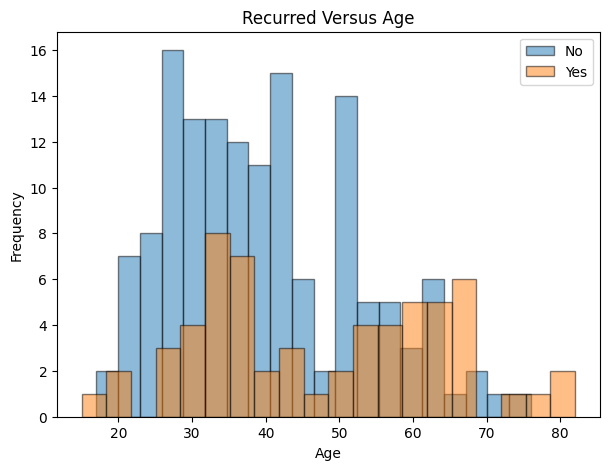

In [84]:
##################################
# Comparing the numeric predictors
# grouped by the target variable
##################################
colors = plt.get_cmap('tab10').colors
plt.figure(figsize=(7, 5))
group_no = thyroid_cancer_train[thyroid_cancer_train[histogram_grouping_variable] == 'No'][histogram_frequency_variable]
group_yes = thyroid_cancer_train[thyroid_cancer_train[histogram_grouping_variable] == 'Yes'][histogram_frequency_variable]
plt.hist(group_no, bins=20, alpha=0.5, color=colors[0], label='No', edgecolor='black')
plt.hist(group_yes, bins=20, alpha=0.5, color=colors[1], label='Yes', edgecolor='black')
plt.title(f'{histogram_grouping_variable} Versus {histogram_frequency_variable}')
plt.xlabel(histogram_frequency_variable)
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [85]:
##################################
# Performing a general exploration of the categorical variable levels
# based on the ordered categories
##################################
ordered_cat_cols = thyroid_cancer_train.select_dtypes(include=["category"]).columns
for col in ordered_cat_cols:
    print(f"Column: {col}")
    print("Absolute Frequencies:")
    print(thyroid_cancer_train[col].value_counts().reindex(thyroid_cancer_train[col].cat.categories))
    print("\nNormalized Frequencies:")
    print(thyroid_cancer_train[col].value_counts(normalize=True).reindex(thyroid_cancer_train[col].cat.categories))
    print("-" * 50)

Column: Gender
Absolute Frequencies:
M     44
F    160
Name: count, dtype: int64

Normalized Frequencies:
M    0.215686
F    0.784314
Name: proportion, dtype: float64
--------------------------------------------------
Column: Smoking
Absolute Frequencies:
No     177
Yes     27
Name: count, dtype: int64

Normalized Frequencies:
No     0.867647
Yes    0.132353
Name: proportion, dtype: float64
--------------------------------------------------
Column: Hx_Smoking
Absolute Frequencies:
No     193
Yes     11
Name: count, dtype: int64

Normalized Frequencies:
No     0.946078
Yes    0.053922
Name: proportion, dtype: float64
--------------------------------------------------
Column: Hx_Radiotherapy
Absolute Frequencies:
No     202
Yes      2
Name: count, dtype: int64

Normalized Frequencies:
No     0.990196
Yes    0.009804
Name: proportion, dtype: float64
--------------------------------------------------
Column: Thyroid_Function
Absolute Frequencies:
Euthyroid                      171
Subclini

In [86]:
##################################
# Segregating the target variable
# and categorical predictors
##################################
proportion_y_variables = thyroid_cancer_train_predictors_categorical
proportion_x_variable = 'Recurred'

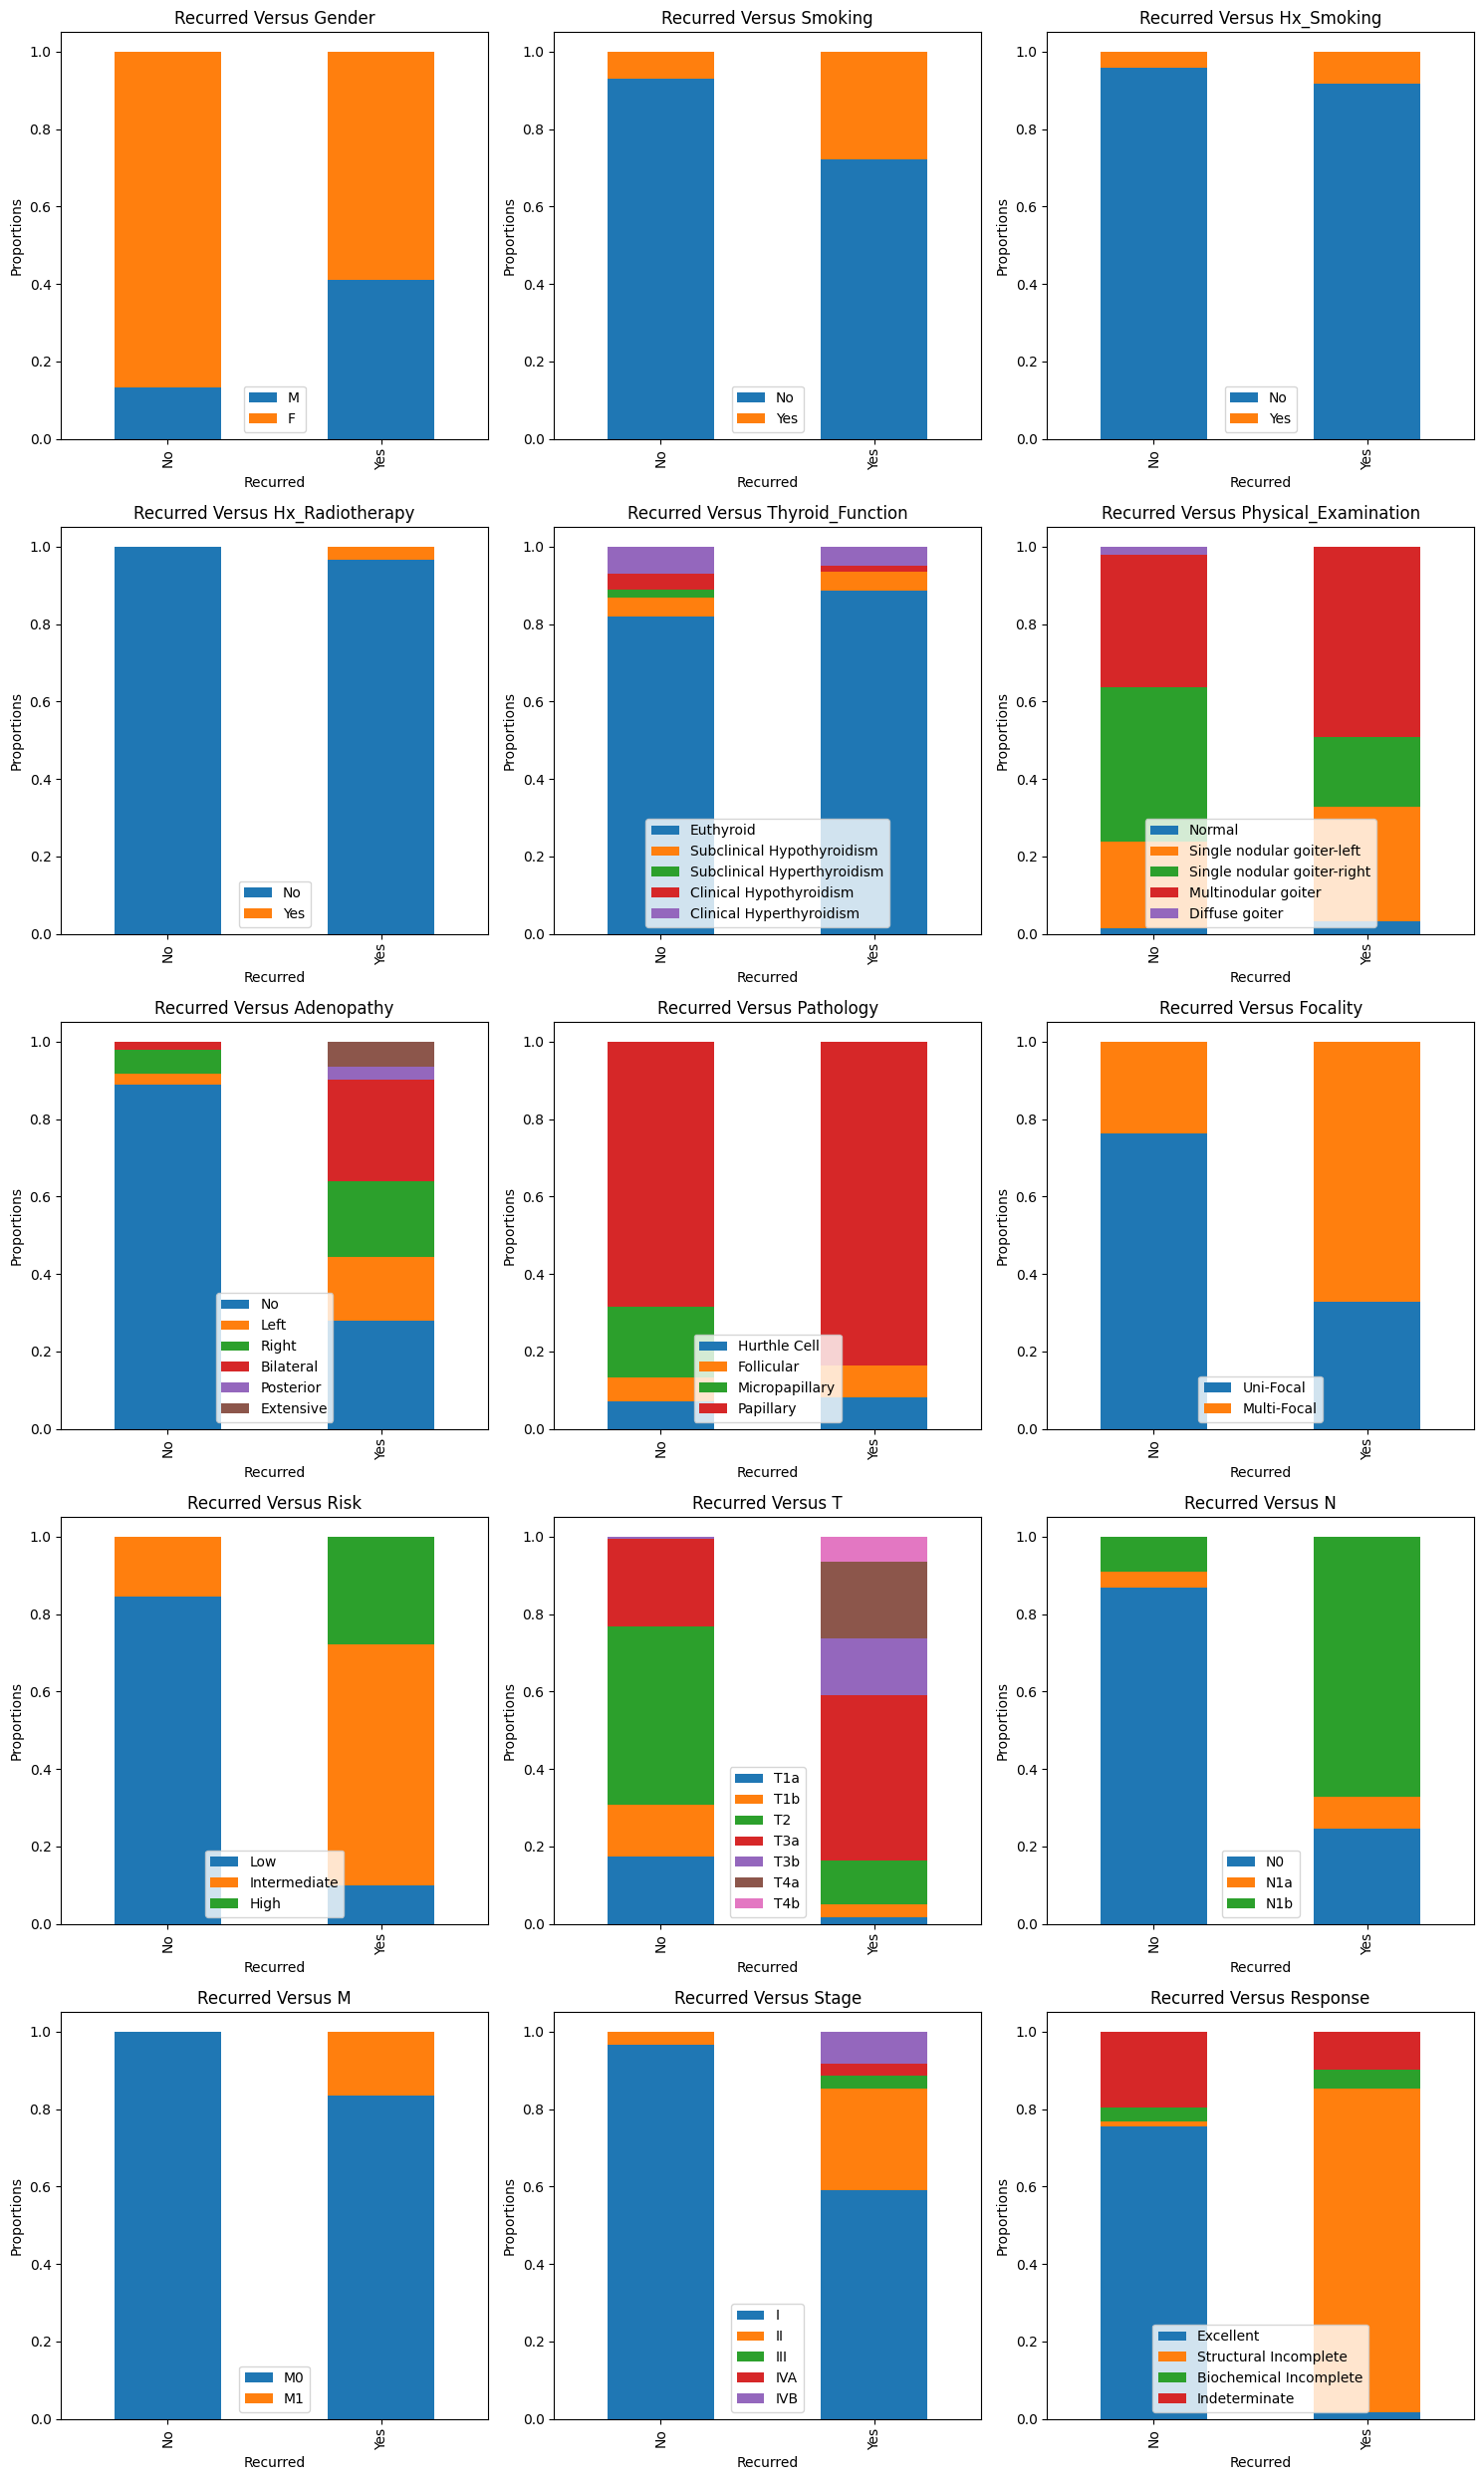

In [87]:
##################################
# Defining the number of 
# rows and columns for the subplots
##################################
num_rows = 5
num_cols = 3

##################################
# Formulating the subplot structure
##################################
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 25))

##################################
# Flattening the multi-row and
# multi-column axes
##################################
axes = axes.ravel()

##################################
# Formulating the individual stacked column plots
# for all categorical columns
##################################
for i, y_variable in enumerate(proportion_y_variables):
    ax = axes[i]
    category_counts = thyroid_cancer_train.groupby([proportion_x_variable, y_variable], observed=True).size().unstack(fill_value=0)
    category_proportions = category_counts.div(category_counts.sum(axis=1), axis=0)
    category_proportions.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'{proportion_x_variable} Versus {y_variable}')
    ax.set_xlabel(proportion_x_variable)
    ax.set_ylabel('Proportions')
    ax.legend(loc="lower center")

##################################
# Adjusting the subplot layout
##################################
plt.tight_layout()

##################################
# Presenting the subplots
##################################
plt.show()

In [88]:
##################################
# Removing predictors observed with extreme
# near-zero variance and a limited number of levels
##################################
thyroid_cancer_train_column_filtered = thyroid_cancer_train.drop(columns=['Hx_Radiotherapy','M','Hx_Smoking'])
thyroid_cancer_train_column_filtered.head()

,Age,Gender,Smoking,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,T,N,Stage,Response,Recurred
140,28.0,F,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,I,Excellent,No
205,36.0,F,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,Low,T2,N1b,I,Indeterminate,No
277,41.0,M,Yes,Euthyroid,Single nodular goiter-right,No,Hurthle Cell,Multi-Focal,Intermediate,T3a,N0,I,Excellent,No
294,42.0,M,No,Subclinical Hypothyroidism,Single nodular goiter-right,No,Papillary,Multi-Focal,Intermediate,T3a,N1a,I,Indeterminate,No
268,32.0,F,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T3a,N0,I,Excellent,No


### 1.4.3 Category Aggregation and Encoding<a class="anchor" id="1.4.3"></a>

1. Category aggregation was applied to the previously identified categorical predictors observed with many levels (high-cardinality) containing only a few observations to improve model stability during cross-validation and enhance generalization:
    * <span style="color: #FF0000">Thyroid_Function</span>: 
        * **171** <span style="color: #FF0000">Thyroid_Function=Euthyroid</span>: 83.82%
        * **33** <span style="color: #FF0000">Thyroid_Function=Hypothyroidism or Hyperthyroidism</span>: 16.18%
    * <span style="color: #FF0000">Physical_Examination</span>:
        * **122** <span style="color: #FF0000">Physical_Examination=Normal or Single Nodular Goiter </span>: 59.80%
        * **82** <span style="color: #FF0000">Physical_Examination=Multinodular or Diffuse Goiter</span>: 40.20%
    * <span style="color: #FF0000">Adenopathy</span>:
        * **144** <span style="color: #FF0000">Adenopathy=No</span>: 70.59%
        * **60** <span style="color: #FF0000">Adenopathy=Yes</span>: 29.41%
    * <span style="color: #FF0000">Pathology</span>:
        * **29** <span style="color: #FF0000">Pathology=Non-Papillary </span>: 14.22%
        * **175** <span style="color: #FF0000">Pathology=Papillary</span>: 85.78%
    * <span style="color: #FF0000">Risk</span>:
        * **127** <span style="color: #FF0000">Risk=Low</span>: 62.25%
        * **77** <span style="color: #FF0000">Risk=Intermediate to High</span>: 37.75%
    * <span style="color: #FF0000">T</span>:
        * **120** <span style="color: #FF0000">T=T1 to T2</span>: 58.82%
        * **84** <span style="color: #FF0000">T=T3 to T4b</span>: 41.18%
    * <span style="color: #FF0000">N</span>:
        * **139** <span style="color: #FF0000">N=N0</span>: 68.14%
        * **65** <span style="color: #FF0000">N=N1</span>: 31.86%
    * <span style="color: #FF0000">Stage</span>:
        * **174** <span style="color: #FF0000">Stage=I</span>: 85.29%
        * **30** <span style="color: #FF0000">Stage=II to IVB</span>: 14.71%
    * <span style="color: #FF0000">Response</span>:
        * **109** <span style="color: #FF0000">Response=Excellent</span>: 53.43%
        * **95** <span style="color: #FF0000">Response=Indeterminate or Incomplete</span>: 46.57%

In [89]:
##################################
# Merging small categories into broader groups 
# for certain categorical predictors
# to ensure sufficient representation in statistical models 
# and prevent sparsity issues in cross-validation
##################################
thyroid_cancer_train_column_filtered['Thyroid_Function'] = thyroid_cancer_train_column_filtered['Thyroid_Function'].map(lambda x: 'Euthyroid' if (x in ['Euthyroid'])  else 'Hypothyroidism or Hyperthyroidism').astype('category')
thyroid_cancer_train_column_filtered['Physical_Examination'] = thyroid_cancer_train_column_filtered['Physical_Examination'].map(lambda x: 'Normal or Single Nodular Goiter' if (x in ['Normal', 'Single nodular goiter-left', 'Single nodular goiter-right'])  else 'Multinodular or Diffuse Goiter').astype('category')
thyroid_cancer_train_column_filtered['Adenopathy'] = thyroid_cancer_train_column_filtered['Adenopathy'].map(lambda x: 'No' if x == 'No' else ('Yes' if pd.notna(x) and x != '' else x)).astype('category')
thyroid_cancer_train_column_filtered['Pathology'] = thyroid_cancer_train_column_filtered['Pathology'].map(lambda x: 'Non-Papillary' if (x in ['Hurthle Cell', 'Follicular'])  else 'Papillary').astype('category')
thyroid_cancer_train_column_filtered['Risk'] = thyroid_cancer_train_column_filtered['Risk'].map(lambda x: 'Low' if (x in ['Low'])  else 'Intermediate to High').astype('category')
thyroid_cancer_train_column_filtered['T'] = thyroid_cancer_train_column_filtered['T'].map(lambda x: 'T1 to T2' if (x in ['T1a', 'T1b', 'T2'])  else 'T3 to T4b').astype('category')
thyroid_cancer_train_column_filtered['N'] = thyroid_cancer_train_column_filtered['N'].map(lambda x: 'N0' if (x in ['N0'])  else 'N1').astype('category')
thyroid_cancer_train_column_filtered['Stage'] = thyroid_cancer_train_column_filtered['Stage'].map(lambda x: 'I' if (x in ['I'])  else 'II to IVB').astype('category')
thyroid_cancer_train_column_filtered['Response'] = thyroid_cancer_train_column_filtered['Response'].map(lambda x: 'Indeterminate or Incomplete' if (x in ['Indeterminate', 'Structural Incomplete', 'Biochemical Incomplete'])  else 'Excellent').astype('category')
thyroid_cancer_train_column_filtered.head()

,Age,Gender,Smoking,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,T,N,Stage,Response,Recurred
140,28.0,F,No,Euthyroid,Multinodular or Diffuse Goiter,No,Papillary,Uni-Focal,Low,T1 to T2,N0,I,Excellent,No
205,36.0,F,No,Euthyroid,Normal or Single Nodular Goiter,Yes,Papillary,Uni-Focal,Low,T1 to T2,N1,I,Indeterminate or Incomplete,No
277,41.0,M,Yes,Euthyroid,Normal or Single Nodular Goiter,No,Non-Papillary,Multi-Focal,Intermediate to High,T3 to T4b,N0,I,Excellent,No
294,42.0,M,No,Hypothyroidism or Hyperthyroidism,Normal or Single Nodular Goiter,No,Papillary,Multi-Focal,Intermediate to High,T3 to T4b,N1,I,Indeterminate or Incomplete,No
268,32.0,F,No,Euthyroid,Normal or Single Nodular Goiter,No,Papillary,Uni-Focal,Low,T3 to T4b,N0,I,Excellent,No


In [90]:
##################################
# Performing a general exploration of the categorical variable levels
# based on the ordered categories
##################################
ordered_cat_cols = thyroid_cancer_train_column_filtered.select_dtypes(include=["category"]).columns
for col in ordered_cat_cols:
    print(f"Column: {col}")
    print("Absolute Frequencies:")
    print(thyroid_cancer_train_column_filtered[col].value_counts().reindex(thyroid_cancer_train_column_filtered[col].cat.categories))
    print("\nNormalized Frequencies:")
    print(thyroid_cancer_train_column_filtered[col].value_counts(normalize=True).reindex(thyroid_cancer_train_column_filtered[col].cat.categories))
    print("-" * 50)

Column: Gender
Absolute Frequencies:
M     44
F    160
Name: count, dtype: int64

Normalized Frequencies:
M    0.215686
F    0.784314
Name: proportion, dtype: float64
--------------------------------------------------
Column: Smoking
Absolute Frequencies:
No     177
Yes     27
Name: count, dtype: int64

Normalized Frequencies:
No     0.867647
Yes    0.132353
Name: proportion, dtype: float64
--------------------------------------------------
Column: Thyroid_Function
Absolute Frequencies:
Euthyroid                            171
Hypothyroidism or Hyperthyroidism     33
Name: count, dtype: int64

Normalized Frequencies:
Euthyroid                            0.838235
Hypothyroidism or Hyperthyroidism    0.161765
Name: proportion, dtype: float64
--------------------------------------------------
Column: Physical_Examination
Absolute Frequencies:
Multinodular or Diffuse Goiter      82
Normal or Single Nodular Goiter    122
Name: count, dtype: int64

Normalized Frequencies:
Multinodular or Dif

In [91]:
##################################
# Segregating the target
# and predictor variables
##################################
thyroid_cancer_train_predictors = thyroid_cancer_train_column_filtered.iloc[:,:-1].columns
thyroid_cancer_train_predictors_numeric = thyroid_cancer_train_column_filtered.iloc[:,:-1].loc[:, thyroid_cancer_train_column_filtered.iloc[:,:-1].columns == 'Age'].columns
thyroid_cancer_train_predictors_categorical = thyroid_cancer_train_column_filtered.iloc[:,:-1].loc[:,thyroid_cancer_train_column_filtered.iloc[:,:-1].columns != 'Age'].columns

In [92]:
##################################
# Segregating the target variable
# and categorical predictors
##################################
proportion_y_variables = thyroid_cancer_train_predictors_categorical
proportion_x_variable = 'Recurred'

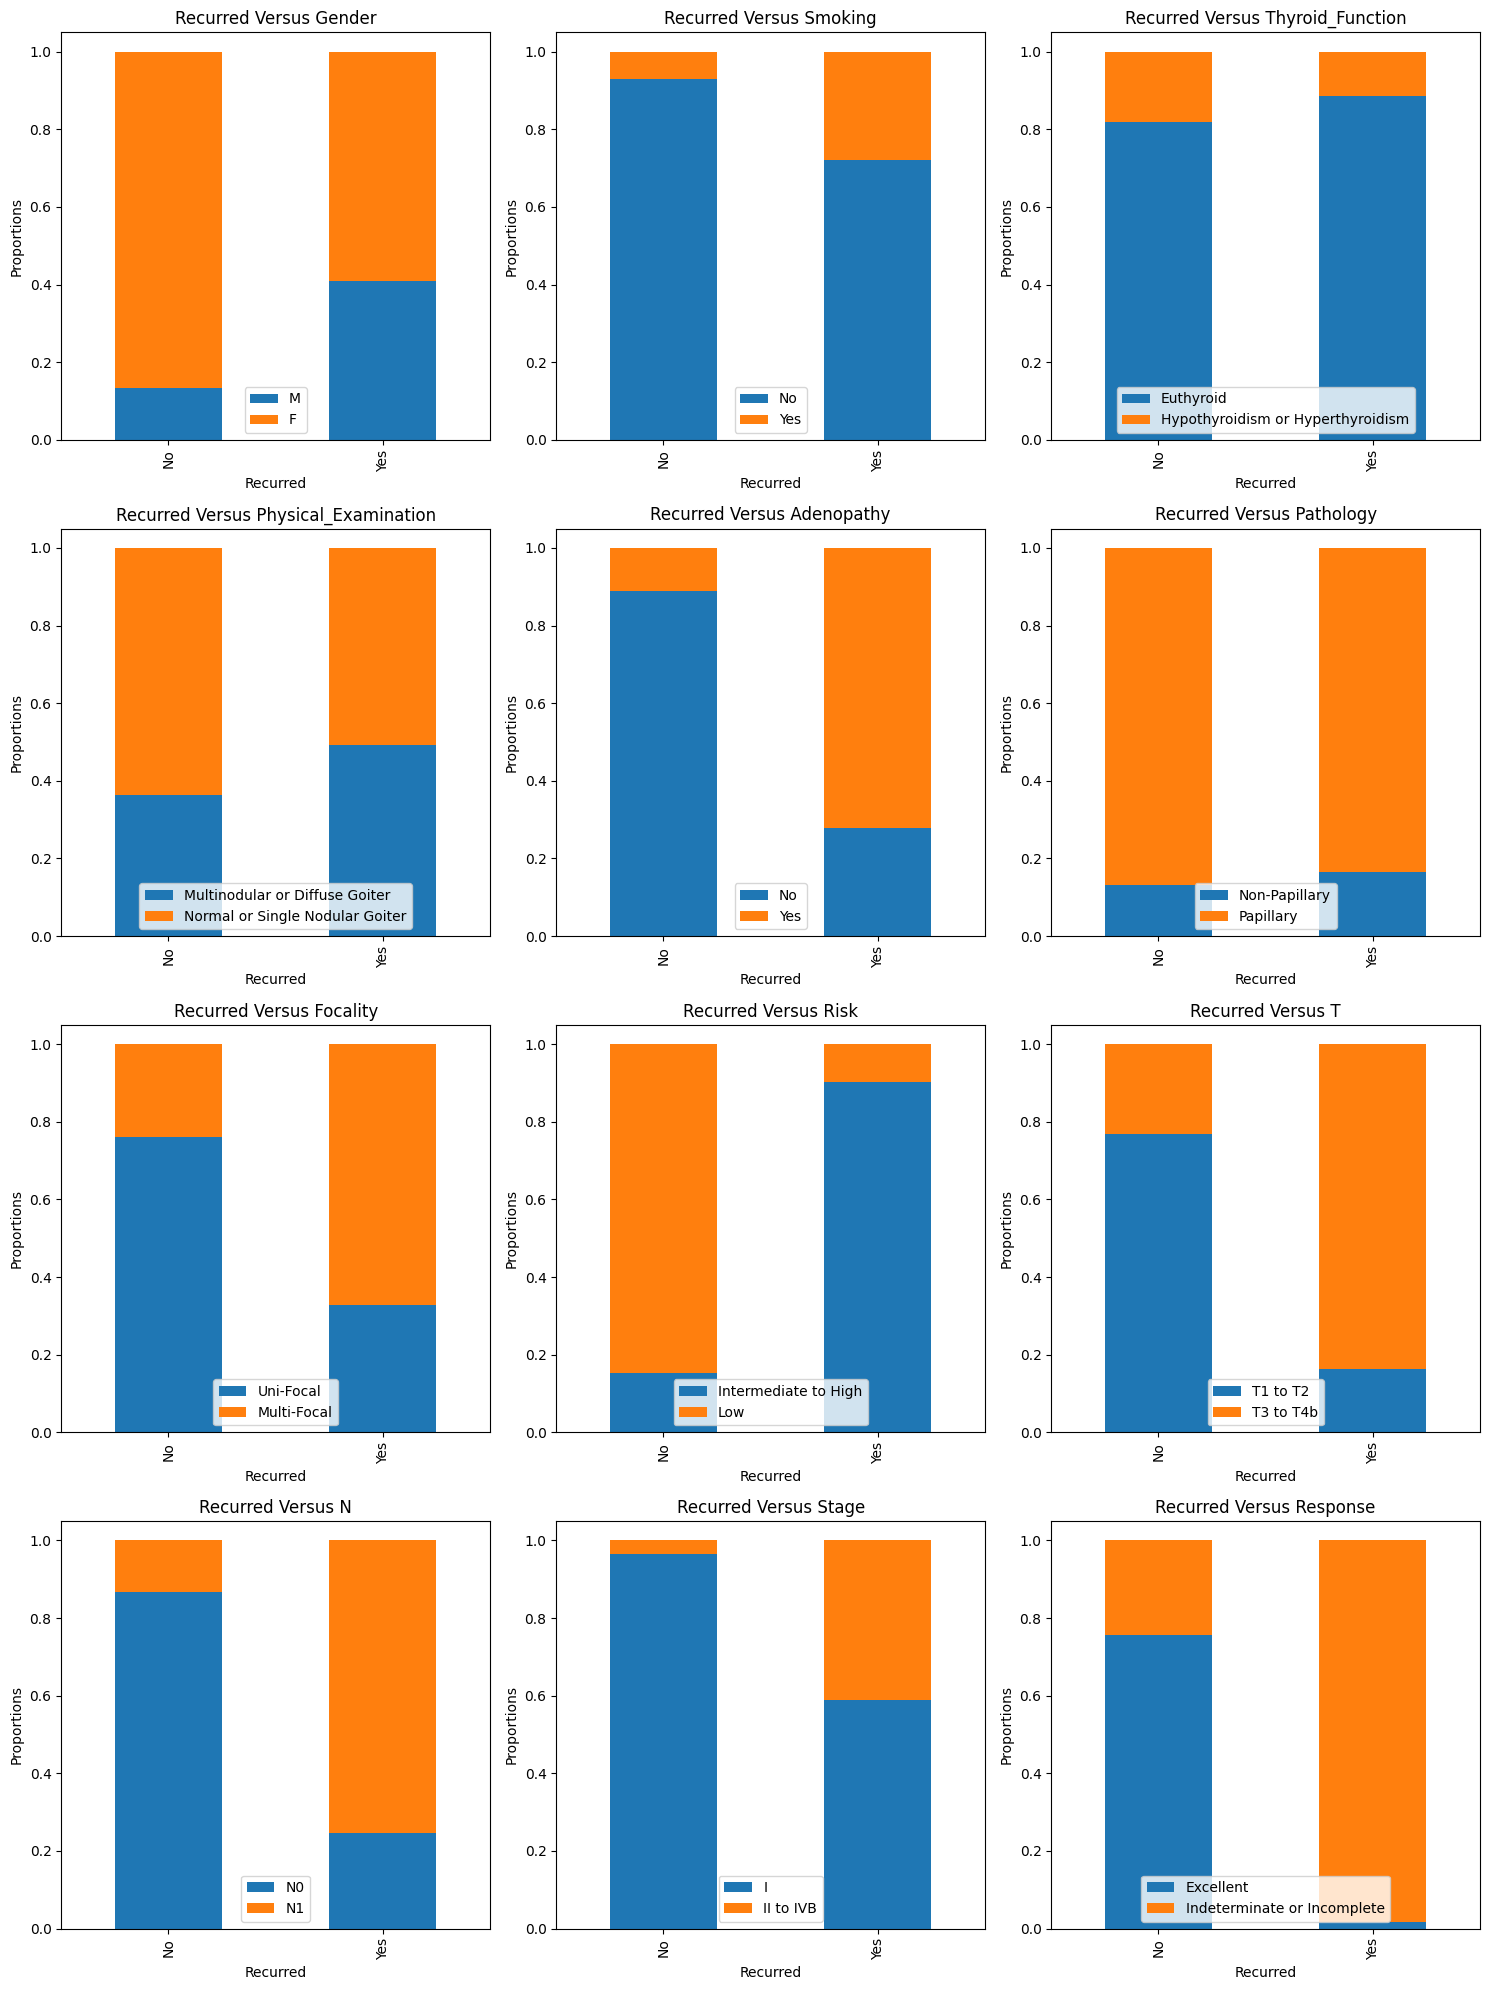

In [93]:
##################################
# Defining the number of 
# rows and columns for the subplots
##################################
num_rows = 4
num_cols = 3

##################################
# Formulating the subplot structure
##################################
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

##################################
# Flattening the multi-row and
# multi-column axes
##################################
axes = axes.ravel()

##################################
# Formulating the individual stacked column plots
# for all categorical columns
##################################
for i, y_variable in enumerate(proportion_y_variables):
    ax = axes[i]
    category_counts = thyroid_cancer_train_column_filtered.groupby([proportion_x_variable, y_variable], observed=True).size().unstack(fill_value=0)
    category_proportions = category_counts.div(category_counts.sum(axis=1), axis=0)
    category_proportions.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'{proportion_x_variable} Versus {y_variable}')
    ax.set_xlabel(proportion_x_variable)
    ax.set_ylabel('Proportions')
    ax.legend(loc="lower center")

##################################
# Adjusting the subplot layout
##################################
plt.tight_layout()

##################################
# Presenting the subplots
##################################
plt.show()

### 1.4.4 Outlier and Distributional Shape Analysis<a class="anchor" id="1.4.4"></a>

1. No outliers (Outlier.Count>0, Outlier.Ratio>0.000), high skewness (Skewness>3 or Skewness<(-3)) or abnormal kurtosis (Skewness>2 or Skewness<(-2)) observed for the numeric predictor.
    * <span style="color: #FF0000">Age</span>: Outlier.Count = 0, Outlier.Ratio = 0.000, Skewness = 0.525, Kurtosis = -0.494

In [94]:
##################################
# Formulating the imputed dataset
# with numeric columns only
##################################
thyroid_cancer_train_column_filtered['Age'] = pd.to_numeric(thyroid_cancer_train_column_filtered['Age'])
thyroid_cancer_train_column_filtered_numeric = thyroid_cancer_train_column_filtered.select_dtypes(include='number')
thyroid_cancer_train_column_filtered_numeric = thyroid_cancer_train_column_filtered_numeric.to_frame() if isinstance(thyroid_cancer_train_column_filtered_numeric, pd.Series) else thyroid_cancer_train_column_filtered_numeric


In [95]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = list(thyroid_cancer_train_column_filtered_numeric.columns)

In [96]:
##################################
# Gathering the skewness value for each numeric column
##################################
numeric_skewness_list = thyroid_cancer_train_column_filtered_numeric.skew()

In [97]:
##################################
# Computing the interquartile range
# for all columns
##################################
thyroid_cancer_train_column_filtered_numeric_q1 = thyroid_cancer_train_column_filtered_numeric.quantile(0.25)
thyroid_cancer_train_column_filtered_numeric_q3 = thyroid_cancer_train_column_filtered_numeric.quantile(0.75)
thyroid_cancer_train_column_filtered_numeric_iqr = thyroid_cancer_train_column_filtered_numeric_q3 - thyroid_cancer_train_column_filtered_numeric_q1

In [98]:
##################################
# Gathering the outlier count for each numeric column
# based on the interquartile range criterion
##################################
numeric_outlier_count_list = ((thyroid_cancer_train_column_filtered_numeric < (thyroid_cancer_train_column_filtered_numeric_q1 - 1.5 * thyroid_cancer_train_column_filtered_numeric_iqr)) | (thyroid_cancer_train_column_filtered_numeric > (thyroid_cancer_train_column_filtered_numeric_q3 + 1.5 * thyroid_cancer_train_column_filtered_numeric_iqr))).sum() 


In [99]:
##################################
# Gathering the number of observations for each column
##################################
numeric_row_count_list = list([len(thyroid_cancer_train_column_filtered_numeric)] * len(thyroid_cancer_train_column_filtered_numeric.columns))

In [100]:
##################################
# Gathering the unique to count ratio for each numeric column
##################################
numeric_outlier_ratio_list = map(truediv, numeric_outlier_count_list, numeric_row_count_list)

In [101]:
##################################
# Gathering the skewness value for each numeric column
##################################
numeric_skewness_list = thyroid_cancer_train_column_filtered_numeric.skew()

In [102]:
##################################
# Gathering the kurtosis value for each numeric column
##################################
numeric_kurtosis_list = thyroid_cancer_train_column_filtered_numeric.kurtosis()

In [103]:
##################################
# Formulating the outlier summary
# for all numeric columns
##################################
numeric_column_outlier_summary = pd.DataFrame(zip(numeric_variable_name_list,
                                                  numeric_skewness_list,
                                                  numeric_outlier_count_list,
                                                  numeric_row_count_list,
                                                  numeric_outlier_ratio_list,
                                                  numeric_skewness_list,
                                                  numeric_kurtosis_list), 
                                        columns=['Numeric.Column.Name',
                                                 'Skewness',
                                                 'Outlier.Count',
                                                 'Row.Count',
                                                 'Outlier.Ratio',
                                                 'Skewness',
                                                 'Kurtosis'])
display(numeric_column_outlier_summary)

,Numeric.Column.Name,Skewness,Outlier.Count,Row.Count,Outlier.Ratio,Skewness,Kurtosis
0,Age,0.525218,0,204,0.0,0.525218,-0.494286


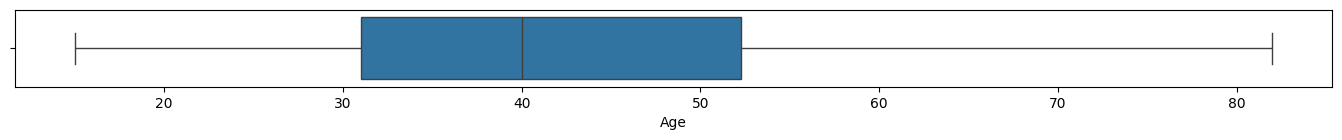

In [104]:
##################################
# Formulating the individual boxplots
# for all numeric columns
##################################
for column in thyroid_cancer_train_column_filtered_numeric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=thyroid_cancer_train_column_filtered_numeric, x=column)

### 1.4.5 Collinearity<a class="anchor" id="1.4.5"></a>

1. Majority of the predictors reported low (<0.50) to moderate (0.50 to 0.75) correlation.
2. Among pairwise combinations of categorical predictors, high Phi.Coefficient values were noted for:
    * <span style="color: #FF0000">N</span> and <span style="color: #FF0000">Adenopathy</span>: Phi.Coefficient = +0.805
    * <span style="color: #FF0000">N</span> and <span style="color: #FF0000">Risk</span>: Phi.Coefficient = +0.726
    * <span style="color: #FF0000">Adenopathy</span> and <span style="color: #FF0000">Risk</span>: Phi.Coefficient = +0.674

In [105]:
##################################
# Creating a dataset copy and
# converting all values to numeric
# for correlation analysis
##################################
pd.set_option('future.no_silent_downcasting', True)
thyroid_cancer_train_correlation = thyroid_cancer_train_column_filtered.copy()
thyroid_cancer_train_correlation_object = thyroid_cancer_train_correlation.iloc[:,1:13].columns
custom_category_orders = {
    'Gender': ['M', 'F'],  
    'Smoking': ['No', 'Yes'],  
    'Thyroid_Function': ['Euthyroid', 'Hypothyroidism or Hyperthyroidism'],  
    'Physical_Examination': ['Normal or Single Nodular Goiter', 'Multinodular or Diffuse Goiter'],  
    'Adenopathy': ['No', 'Yes'],  
    'Pathology': ['Non-Papillary', 'Papillary'],  
    'Focality': ['Uni-Focal', 'Multi-Focal'],  
    'Risk': ['Low', 'Intermediate to High'],  
    'T': ['T1 to T2', 'T3 to T4b'],  
    'N': ['N0', 'N1'],  
    'Stage': ['I', 'II to IVB'],  
    'Response': ['Excellent', 'Indeterminate or Incomplete'] 
}
encoder = OrdinalEncoder(categories=[custom_category_orders[col] for col in thyroid_cancer_train_correlation_object])
thyroid_cancer_train_correlation[thyroid_cancer_train_correlation_object] = encoder.fit_transform(
    thyroid_cancer_train_correlation[thyroid_cancer_train_correlation_object]
)
thyroid_cancer_train_correlation = thyroid_cancer_train_correlation.drop(['Recurred'], axis=1)
display(thyroid_cancer_train_correlation)

,Age,Gender,Smoking,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,T,N,Stage,Response
140,28.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
205,36.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
277,41.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
294,42.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
268,32.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,67.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
115,37.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
67,51.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
161,22.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
##################################
# Initializing the correlation matrix
##################################
thyroid_cancer_train_correlation_matrix = pd.DataFrame(np.zeros((len(thyroid_cancer_train_correlation.columns), len(thyroid_cancer_train_correlation.columns))),
                                                       columns=thyroid_cancer_train_correlation.columns,
                                                       index=thyroid_cancer_train_correlation.columns)

In [107]:
##################################
# Creating an empty correlation matrix
##################################
thyroid_cancer_train_correlation_matrix = pd.DataFrame(
    np.zeros((len(thyroid_cancer_train_correlation.columns), len(thyroid_cancer_train_correlation.columns))),
    index=thyroid_cancer_train_correlation.columns,
    columns=thyroid_cancer_train_correlation.columns
)


##################################
# Calculating different types
# of correlation coefficients
# per variable type
##################################
for i in range(len(thyroid_cancer_train_correlation.columns)):
    for j in range(i, len(thyroid_cancer_train_correlation.columns)):
        if i == j:
            thyroid_cancer_train_correlation_matrix.iloc[i, j] = 1.0  
        else:
            col_i = thyroid_cancer_train_correlation.iloc[:, i]
            col_j = thyroid_cancer_train_correlation.iloc[:, j]

            # Detecting binary variables (assumes binary variables are coded as 0/1)
            is_binary_i = col_i.nunique() == 2
            is_binary_j = col_j.nunique() == 2

            # Computing the Pearson correlation for two continuous variables
            if col_i.dtype in ['int64', 'float64'] and col_j.dtype in ['int64', 'float64']:
                corr = col_i.corr(col_j)

            # Computing the Point-Biserial correlation for continuous and binary variables
            elif (col_i.dtype in ['int64', 'float64'] and is_binary_j) or (col_j.dtype in ['int64', 'float64'] and is_binary_i):
                continuous_var = col_i if col_i.dtype in ['int64', 'float64'] else col_j
                binary_var = col_j if is_binary_j else col_i

                # Convert binary variable to 0/1 (if not already)
                binary_var = binary_var.astype('category').cat.codes
                corr, _ = pointbiserialr(continuous_var, binary_var)

            # Computing the Phi coefficient for two binary variables
            elif is_binary_i and is_binary_j:
                corr = col_i.corr(col_j) 

            # Computing the Cramér's V for two categorical variables (if more than 2 categories)
            else:
                contingency_table = pd.crosstab(col_i, col_j)
                chi2, _, _, _ = chi2_contingency(contingency_table)
                n = contingency_table.sum().sum()
                phi2 = chi2 / n
                r, k = contingency_table.shape
                corr = np.sqrt(phi2 / min(k - 1, r - 1))  # Cramér's V formula

            # Assigning correlation values to the matrix
            thyroid_cancer_train_correlation_matrix.iloc[i, j] = corr
            thyroid_cancer_train_correlation_matrix.iloc[j, i] = corr

# Displaying the correlation matrix
display(thyroid_cancer_train_correlation_matrix)

,Age,Gender,Smoking,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,T,N,Stage,Response
Age,1.000000,-0.185530,0.299971,0.077845,0.012021,0.073931,-0.215274,0.195272,0.205360,0.246838,0.013195,0.528144,0.317978
Gender,-0.185530,1.000000,-0.604101,-0.093290,-0.031935,-0.158480,0.127817,-0.218103,-0.255507,-0.215101,-0.178550,-0.219727,-0.179431
Smoking,0.299971,-0.604101,1.000000,0.064124,0.004339,0.192350,-0.338086,0.182212,0.233024,0.231679,0.105463,0.327952,0.215362
Thyroid_Function,0.077845,-0.093290,0.064124,1.000000,0.019964,-0.137486,-0.049893,0.051564,-0.012519,-0.042960,-0.043275,0.080702,-0.036498
Physical_Examination,0.012021,-0.031935,0.004339,0.019964,1.000000,0.063246,0.018806,0.245779,0.166012,0.086039,0.104553,0.054799,0.116526
Adenopathy,0.073931,-0.158480,0.192350,-0.137486,0.063246,1.000000,0.047117,0.288750,0.673638,0.421762,0.805406,0.278749,0.518887
Pathology,-0.215274,0.127817,-0.338086,-0.049893,0.018806,0.047117,1.000000,-0.126299,-0.117392,-0.286899,0.157869,-0.187683,-0.154637
Focality,0.195272,-0.218103,0.182212,0.051564,0.245779,0.288750,-0.126299,1.000000,0.454926,0.518864,0.307716,0.372331,0.388741
Risk,0.205360,-0.255507,0.233024,-0.012519,0.166012,0.673638,-0.117392,0.454926,1.000000,0.622459,0.726304,0.533264,0.631330
T,0.246838,-0.215101,0.231679,-0.042960,0.086039,0.421762,-0.286899,0.518864,0.622459,1.000000,0.368430,0.468168,0.556742


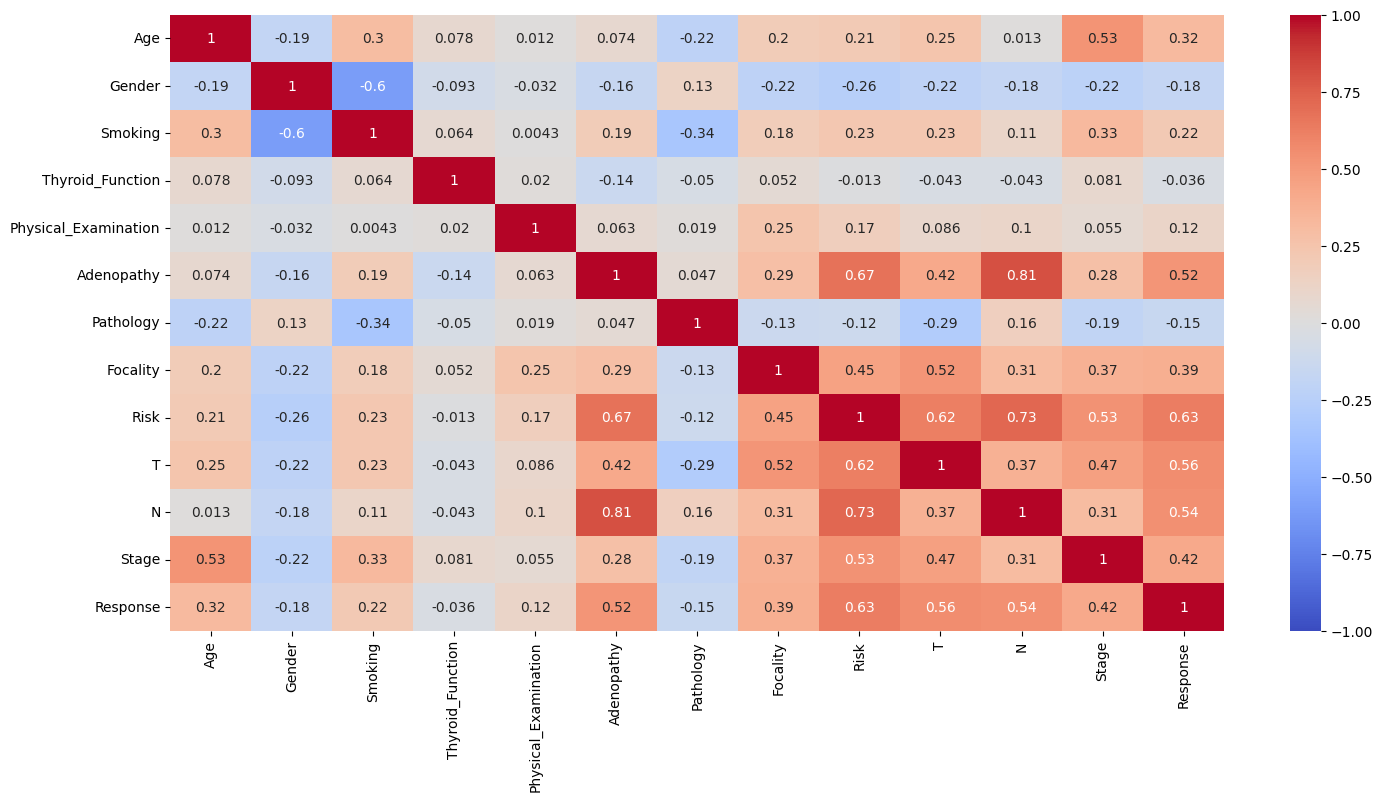

In [108]:
##################################
# Plotting the correlation matrix
# for all pairwise combinations
# of numeric and categorical columns
##################################
plt.figure(figsize=(17, 8))
sns.heatmap(thyroid_cancer_train_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()


## 1.5. Data Exploration <a class="anchor" id="1.5"></a>

### 1.5.1 Exploratory Data Analysis<a class="anchor" id="1.5.1"></a>

1. Bivariate analysis identified individual predictors with generally positive association to the target variable based on visual inspection.
2. Higher values or higher proportions for the following predictors are associated with the <span style="color: #FF0000">Recurred=Yes</span> category: 
    * <span style="color: #FF0000">Age</span>
    * <span style="color: #FF0000">Gender=M</span>    
    * <span style="color: #FF0000">Smoking=Yes</span>    
    * <span style="color: #FF0000">Physical_Examination=Multinodular or Diffuse Goiter</span>    
    * <span style="color: #FF0000">Adenopathy=Yes</span>
    * <span style="color: #FF0000">Focality=Multi-Focal</span>    
    * <span style="color: #FF0000">Risk=Intermediate to High</span>
    * <span style="color: #FF0000">T=T3 to T4b</span>    
    * <span style="color: #FF0000">N=N1</span>
    * <span style="color: #FF0000">Stage=II to IVB</span>    
    * <span style="color: #FF0000">Response=Indeterminate or Incomplete</span>
3. Proportions for the following predictors are not associated with the <span style="color: #FF0000">Recurred=Yes</span> or <span style="color: #FF0000">Recurred=No</span> categories: 
    * <span style="color: #FF0000">Thyroid_Function</span>
    * <span style="color: #FF0000">Pathology</span>    

In [109]:
##################################
# Segregating the target
# and predictor variables
##################################
thyroid_cancer_train_column_filtered_predictors = thyroid_cancer_train_column_filtered.iloc[:,:-1].columns
thyroid_cancer_train_column_filtered_predictors_numeric = thyroid_cancer_train_column_filtered.iloc[:,:-1].loc[:, thyroid_cancer_train_column_filtered.iloc[:,:-1].columns == 'Age'].columns
thyroid_cancer_train_column_filtered_predictors_categorical = thyroid_cancer_train_column_filtered.iloc[:,:-1].loc[:,thyroid_cancer_train_column_filtered.iloc[:,:-1].columns != 'Age'].columns

In [110]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = thyroid_cancer_train_column_filtered_predictors_numeric

In [111]:
##################################
# Segregating the target variable
# and numeric predictors
##################################
boxplot_y_variable = 'Recurred'
boxplot_x_variable = numeric_variable_name_list.values[0]

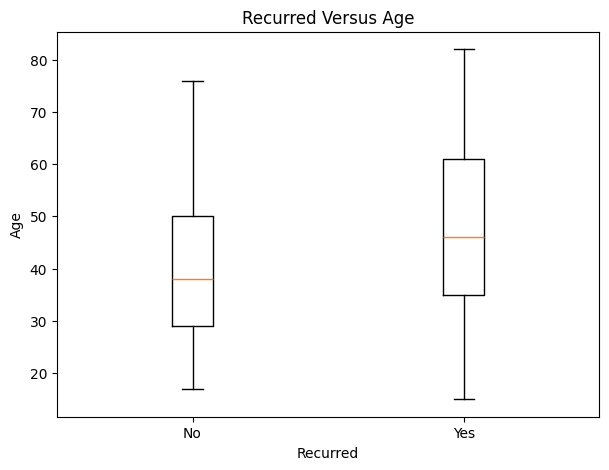

In [112]:
##################################
# Evaluating the numeric predictors
# against the target variable
##################################
plt.figure(figsize=(7, 5))
plt.boxplot([group[boxplot_x_variable] for name, group in thyroid_cancer_train_column_filtered.groupby(boxplot_y_variable, observed=True)])
plt.title(f'{boxplot_y_variable} Versus {boxplot_x_variable}')
plt.xlabel(boxplot_y_variable)
plt.ylabel(boxplot_x_variable)
plt.xticks(range(1, len(thyroid_cancer_train_column_filtered[boxplot_y_variable].unique()) + 1), ['No', 'Yes'])
plt.show()

In [113]:
##################################
# Segregating the target variable
# and categorical predictors
##################################
proportion_y_variables = thyroid_cancer_train_column_filtered_predictors_categorical
proportion_x_variable = 'Recurred'

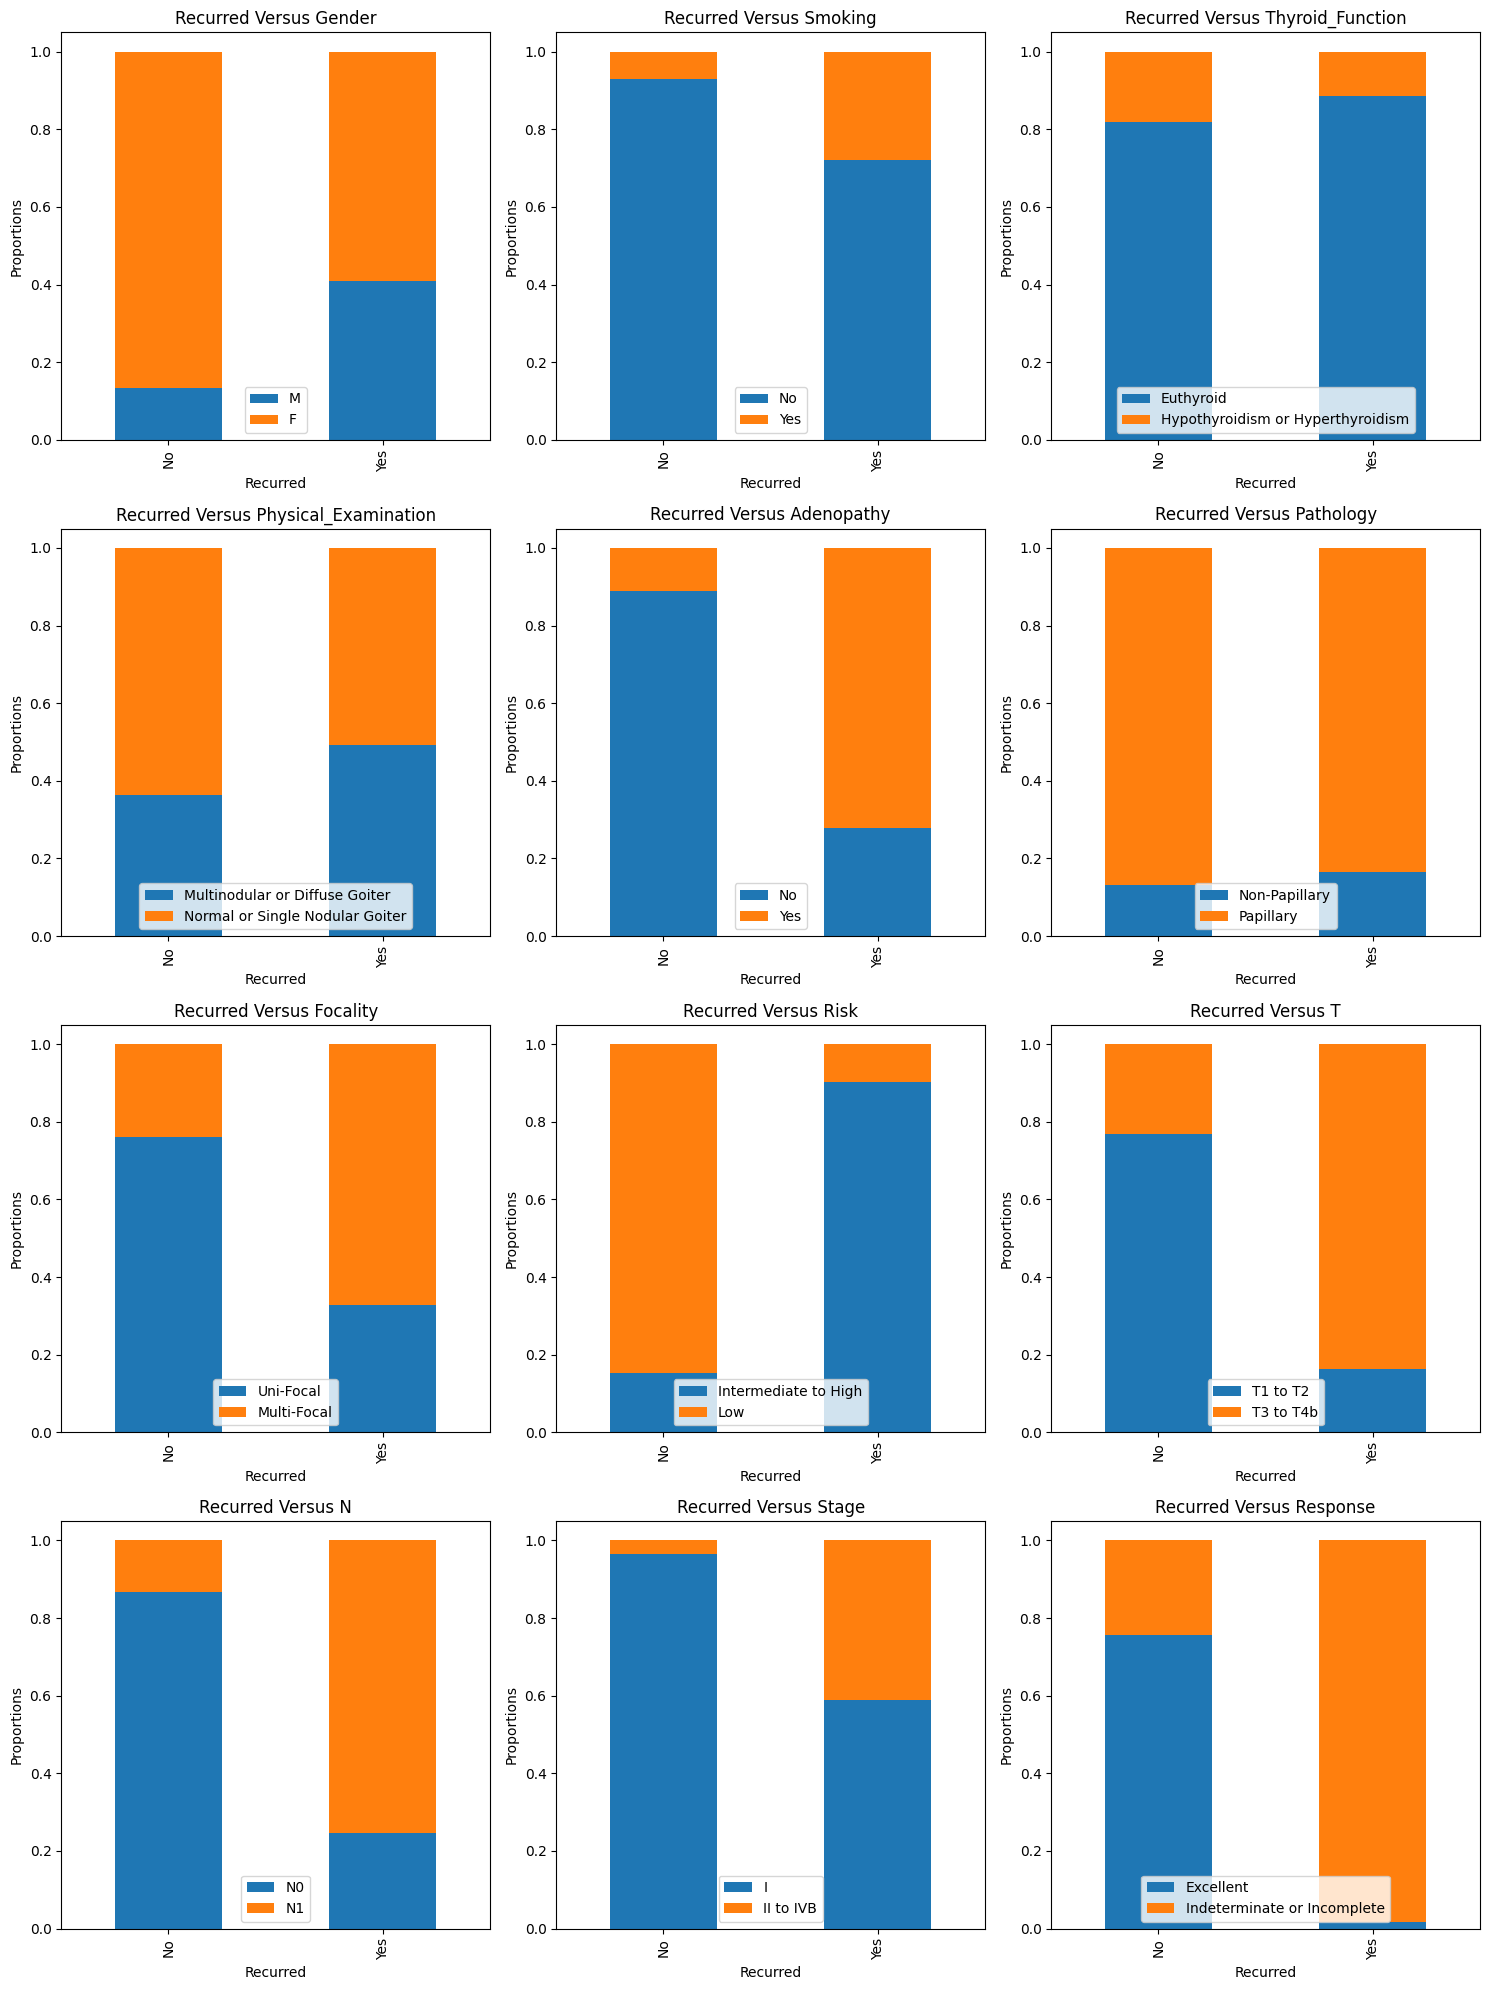

In [114]:
##################################
# Defining the number of 
# rows and columns for the subplots
##################################
num_rows = 4
num_cols = 3

##################################
# Formulating the subplot structure
##################################
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

##################################
# Flattening the multi-row and
# multi-column axes
##################################
axes = axes.ravel()

##################################
# Formulating the individual stacked column plots
# for all categorical columns
##################################
for i, y_variable in enumerate(proportion_y_variables):
    ax = axes[i]
    category_counts = thyroid_cancer_train_column_filtered.groupby([proportion_x_variable, y_variable], observed=True).size().unstack(fill_value=0)
    category_proportions = category_counts.div(category_counts.sum(axis=1), axis=0)
    category_proportions.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'{proportion_x_variable} Versus {y_variable}')
    ax.set_xlabel(proportion_x_variable)
    ax.set_ylabel('Proportions')
    ax.legend(loc="lower center")

##################################
# Adjusting the subplot layout
##################################
plt.tight_layout()

##################################
# Presenting the subplots
##################################
plt.show()

### 1.5.2 Hypothesis Testing<a class="anchor" id="1.5.2"></a>

1. The relationship between the numeric predictor to the <span style="color: #FF0000">Recurred</span> target variable was statistically evaluated using the following hypotheses:
    * **Null**: Difference in the means between groups Yes and No is equal to zero  
    * **Alternative**: Difference in the means between groups Yes and No is not equal to zero   
2. There is sufficient evidence to conclude of a statistically significant difference between the means of the numeric measurements obtained from Yes and No groups of the <span style="color: #FF0000">Recurred</span> target variable in 1 of 1 numeric predictor given its high t-test statistic values with reported low p-values less than the significance level of 0.05.
    * <span style="color: #FF0000">Age</span>: T.Test.Statistic=-3.791, T.Test.PValue=0.000
3. The relationship between the categorical predictors to the <span style="color: #FF0000">Recurred</span> target variable was statistically evaluated using the following hypotheses:
    * **Null**: The categorical predictor is independent of the categorical target variable 
    * **Alternative**: The categorical predictor is dependent of the categorical target variable    
4. There is sufficient evidence to conclude of a statistically significant relationship between the categories of the categorical predictors and the Yes and No groups of the <span style="color: #FF0000">Recurred</span> target variable in 9 of 12 categorical predictors given their high chisquare statistic values with reported low p-values less than the significance level of 0.05.
    * <span style="color: #FF0000">Risk</span>: ChiSquare.Test.Statistic=98.599, ChiSquare.Test.PValue=0.000
    * <span style="color: #FF0000">Response</span>: ChiSquare.Test.Statistic=90.866, ChiSquare.Test.PValue=0.000
    * <span style="color: #FF0000">Adenopathy</span>: ChiSquare.Test.Statistic=73.585, ChiSquare.Test.PValue=0.000
    * <span style="color: #FF0000">N</span>: ChiSquare.Test.Statistic=73.176, ChiSquare.Test.PValue=0.000
    * <span style="color: #FF0000">T</span>: ChiSquare.Test.Statistic=62.205, ChiSquare.Test.PValue=0.000   
    * <span style="color: #FF0000">Stage</span>: ChiSquare.Test.Statistic=44.963, ChiSquare.Test.PValue=0.000
    * <span style="color: #FF0000">Focality</span>: ChiSquare.Test.Statistic=32.859, ChiSquare.Test.PValue=0.000
    * <span style="color: #FF0000">Gender</span>: ChiSquare.Test.Statistic=17.787, ChiSquare.Test.PValue=0.000
    * <span style="color: #FF0000">Smoking</span>: ChiSquare.Test.Statistic=14.460, ChiSquare.Test.PValue=0.001
5. There is marginal evidence to conclude of a statistically significant relationship between the categories of the categorical predictors and the Yes and No groups of the <span style="color: #FF0000">Recurred</span> target variable in 1 of 12 categorical predictors given its sufficiently high chisquare statistic values with reported low p-values near the significance level of 0.10.    
    * <span style="color: #FF0000">Physical_Examination</span>: ChiSquare.Test.Statistic=2.413, ChiSquare.Test.PValue=0.120

In [115]:
##################################
# Computing the t-test 
# statistic and p-values
# between the target variable
# and numeric predictor columns
##################################
thyroid_cancer_numeric_ttest_target = {}
thyroid_cancer_numeric = thyroid_cancer_train_column_filtered.loc[:,(thyroid_cancer_train_column_filtered.columns == 'Age') | (thyroid_cancer_train_column_filtered.columns == 'Recurred')]
thyroid_cancer_numeric_columns = thyroid_cancer_train_column_filtered_predictors_numeric
for numeric_column in thyroid_cancer_numeric_columns:
    group_0 = thyroid_cancer_numeric[thyroid_cancer_numeric.loc[:,'Recurred']=='No']
    group_1 = thyroid_cancer_numeric[thyroid_cancer_numeric.loc[:,'Recurred']=='Yes']
    thyroid_cancer_numeric_ttest_target['Recurred_' + numeric_column] = stats.ttest_ind(
        group_0[numeric_column], 
        group_1[numeric_column], 
        equal_var=True)

In [116]:
##################################
# Formulating the pairwise ttest summary
# between the target variable
# and numeric predictor columns
##################################
thyroid_cancer_numeric_summary = thyroid_cancer_numeric.from_dict(thyroid_cancer_numeric_ttest_target, orient='index')
thyroid_cancer_numeric_summary.columns = ['T.Test.Statistic', 'T.Test.PValue']
display(thyroid_cancer_numeric_summary.sort_values(by=['T.Test.PValue'], ascending=True).head(len(thyroid_cancer_train_column_filtered_predictors_numeric)))

,T.Test.Statistic,T.Test.PValue
Recurred_Age,-3.747942,0.000233


In [117]:
##################################
# Computing the chisquare
# statistic and p-values
# between the target variable
# and categorical predictor columns
##################################
thyroid_cancer_categorical_chisquare_target = {}
thyroid_cancer_categorical = thyroid_cancer_train_column_filtered.loc[:,(thyroid_cancer_train_column_filtered.columns != 'Age') | (thyroid_cancer_train_column_filtered.columns == 'Recurred')]
thyroid_cancer_categorical_columns = thyroid_cancer_train_column_filtered_predictors_categorical
for categorical_column in thyroid_cancer_categorical_columns:
    contingency_table = pd.crosstab(thyroid_cancer_categorical[categorical_column], 
                                    thyroid_cancer_categorical['Recurred'])
    thyroid_cancer_categorical_chisquare_target['Recurred_' + categorical_column] = stats.chi2_contingency(
        contingency_table)[0:2]

In [118]:
##################################
# Formulating the pairwise chisquare summary
# between the target variable
# and categorical predictor columns
##################################
thyroid_cancer_categorical_summary = thyroid_cancer_categorical.from_dict(thyroid_cancer_categorical_chisquare_target, orient='index')
thyroid_cancer_categorical_summary.columns = ['ChiSquare.Test.Statistic', 'ChiSquare.Test.PValue']
display(thyroid_cancer_categorical_summary.sort_values(by=['ChiSquare.Test.PValue'], ascending=True).head(len(thyroid_cancer_train_column_filtered_predictors_categorical)))

,ChiSquare.Test.Statistic,ChiSquare.Test.PValue
Recurred_Risk,98.599608,3.090804e-23
Recurred_Response,90.866461,1.537030e-21
Recurred_Adenopathy,73.585561,9.636704e-18
Recurred_N,73.176134,1.185810e-17
Recurred_T,62.205367,3.094435e-15
Recurred_Stage,44.963917,2.006987e-11
Recurred_Focality,32.859398,9.907099e-09
Recurred_Gender,17.787641,2.469824e-05
Recurred_Smoking,14.460357,1.431406e-04
Recurred_Physical_Examination,2.413115,1.203227e-01


## 1.6. Premodelling Data Preparation <a class="anchor" id="1.6"></a>

### 1.6.1 Preprocessed Data Description<a class="anchor" id="1.6.1"></a>

1. A total of 6 of the 16 predictors were excluded from the dataset based on the data preprocessing and exploration findings 
2. There were 3 categorical predictors excluded from the dataset after having been observed with extremely low variance containing categories with very few or almost no variations across observations that may have limited predictive power or drive increased model complexity without performance gains:
    * <span style="color: #FF0000">Hx_Smoking</span>: 
        * **193** <span style="color: #FF0000">Hx_Smoking=No</span>: 94.61%
        * **11** <span style="color: #FF0000">Hx_Smoking=Yes</span>: 5.39%
    * <span style="color: #FF0000">Hx_Radiotherapy</span>: 
        * **202** <span style="color: #FF0000">Hx_Radiotherapy=No</span>: 99.02%
        * **2** <span style="color: #FF0000">Hx_Radiotherapy=Yes</span>: 0.98%
    * <span style="color: #FF0000">M</span>: 
        * **194** <span style="color: #FF0000">M=M0</span>: 95.10%
        * **10** <span style="color: #FF0000">M=M1</span>: 4.90%
3. There was 1 categorical predictor excluded from the dataset after having been observed with high pairwise collinearity (Phi.Coefficient>0.70) with other 2 predictors that might provide redundant information, leading to potential instability in regression models.
    * <span style="color: #FF0000">N</span> and <span style="color: #FF0000">Adenopathy</span>: Phi.Coefficient = +0.805
    * <span style="color: #FF0000">N</span> and <span style="color: #FF0000">Risk</span>: Phi.Coefficient = +0.726
4. Another 2 categorical predictors were excluded from the dataset for not exhibiting a statistically significant association with the Yes and No groups of the <span style="color: #FF0000">Recurred</span> target variable, indicating weak predictive value.
    * <span style="color: #FF0000">Thyroid_Function</span>: ChiSquare.Test.Statistic=0.967, ChiSquare.Test.PValue=0.325
    * <span style="color: #FF0000">Pathology</span>: ChiSquare.Test.Statistic=0.132, ChiSquare.Test.PValue=0.717  
5. The **preprocessed train data (final)** subset is comprised of:
    * **204 rows** (observations)
        * **143 Recurred=No**: 70.10%
        * **61 Recurred=Yes**: 29.90%
    * **11 columns** (variables)
        * **1/11 target** (categorical)
             * <span style="color: #FF0000">Recurred</span>
        * **1/11 predictor** (numeric)
             * <span style="color: #FF0000">Age</span>
        * **9/11 predictor** (categorical)
             * <span style="color: #FF0000">Gender</span>
             * <span style="color: #FF0000">Smoking</span>
             * <span style="color: #FF0000">Physical_Examination</span>
             * <span style="color: #FF0000">Adenopathy</span>
             * <span style="color: #FF0000">Focality</span>
             * <span style="color: #FF0000">Risk</span>
             * <span style="color: #FF0000">T</span>
             * <span style="color: #FF0000">M</span>
             * <span style="color: #FF0000">Stage</span>
             * <span style="color: #FF0000">Response</span>

### 1.6.2 Preprocessing Pipeline Development<a class="anchor" id="1.6.2"></a>

1. A preprocessing pipeline was formulated and applied to the **train data (final)**, **validation data** and **test data** with the following actions:
    * Excluded specified columns noted with low variance, high collinearity and weak predictive power
    * Aggregated categories in multiclass categorical variables into binary levels
    * Converted categorical columns to the appropriate type
    * Set the order of category levels for ordinal encoding during modeling pipeline creation

In [119]:
##################################
# Formulating a preprocessing pipeline
# that removes the specified columns,
# aggregates categories in multiclass categorical variables,
# converts categorical columns to the appropriate type, and
# sets the order of category levels
##################################
def preprocess_dataset(df):
    # Removing the specified columns
    columns_to_remove = ['Hx_Smoking', 'Hx_Radiotherapy', 'M', 'N', 'Thyroid_Function', 'Pathology']
    df = df.drop(columns=columns_to_remove)
    
    # Applying category aggregation
    df['Physical_Examination'] = df['Physical_Examination'].map(
        lambda x: 'Normal or Single Nodular Goiter' if x in ['Normal', 'Single nodular goiter-left', 'Single nodular goiter-right'] 
        else 'Multinodular or Diffuse Goiter').astype('category')
    
    df['Adenopathy'] = df['Adenopathy'].map(
        lambda x: 'No' if x == 'No' else ('Yes' if pd.notna(x) and x != '' else x)).astype('category')
    
    df['Risk'] = df['Risk'].map(
        lambda x: 'Low' if x == 'Low' else 'Intermediate to High').astype('category')
    
    df['T'] = df['T'].map(
        lambda x: 'T1 to T2' if x in ['T1a', 'T1b', 'T2'] else 'T3 to T4b').astype('category')
    
    df['Stage'] = df['Stage'].map(
        lambda x: 'I' if x == 'I' else 'II to IVB').astype('category')
    
    df['Response'] = df['Response'].map(
        lambda x: 'Indeterminate or Incomplete' if x in ['Indeterminate', 'Structural Incomplete', 'Biochemical Incomplete'] 
        else 'Excellent').astype('category')
    
    # Setting category levels
    category_mappings = {
        'Gender': ['M', 'F'],
        'Smoking': ['No', 'Yes'],
        'Physical_Examination': ['Normal or Single Nodular Goiter', 'Multinodular or Diffuse Goiter'],
        'Adenopathy': ['No', 'Yes'],
        'Focality': ['Uni-Focal', 'Multi-Focal'],
        'Risk': ['Low', 'Intermediate to High'],
        'T': ['T1 to T2', 'T3 to T4b'],
        'Stage': ['I', 'II to IVB'],
        'Response': ['Excellent', 'Indeterminate or Incomplete']
    }
    
    for col, categories in category_mappings.items():
        df[col] = df[col].astype('category')
        df[col] = df[col].cat.set_categories(categories, ordered=True)
    
    return df

In [120]:
##################################
# Applying the preprocessing pipeline
# to the train data
##################################
thyroid_cancer_preprocessed_train = preprocess_dataset(thyroid_cancer_train)
X_preprocessed_train = thyroid_cancer_preprocessed_train.drop('Recurred', axis = 1)
y_preprocessed_train = thyroid_cancer_preprocessed_train['Recurred']
thyroid_cancer_preprocessed_train.to_csv(os.path.join("..", DATASETS_PREPROCESSED_TRAIN_PATH, "thyroid_cancer_preprocessed_train.csv"), index=False)
X_preprocessed_train.to_csv(os.path.join("..", DATASETS_PREPROCESSED_TRAIN_FEATURES_PATH, "X_preprocessed_train.csv"), index=False)
y_preprocessed_train.to_csv(os.path.join("..", DATASETS_PREPROCESSED_TRAIN_TARGET_PATH, "y_preprocessed_train.csv"), index=False)
train_csv_path = os.path.join("..", DATASETS_PREPROCESSED_TRAIN_PATH, "thyroid_cancer_preprocessed_train.csv")
print('Final Preprocessed Train Dataset Dimensions: ')
display(X_preprocessed_train.shape)
display(y_preprocessed_train.shape)
print('Final Preprocessed Train Target Variable Breakdown: ')
display(y_preprocessed_train.value_counts())
print('Final Preprocessed Train Target Variable Proportion: ')
display(y_preprocessed_train.value_counts(normalize = True))
thyroid_cancer_preprocessed_train.head()

Final Preprocessed Train Dataset Dimensions: 


(204, 10)

(204,)

Final Preprocessed Train Target Variable Breakdown: 


Recurred
No     143
Yes     61
Name: count, dtype: int64

Final Preprocessed Train Target Variable Proportion: 


Recurred
No     0.70098
Yes    0.29902
Name: proportion, dtype: float64

,Age,Gender,Smoking,Physical_Examination,Adenopathy,Focality,Risk,T,Stage,Response,Recurred
140,28.0,F,No,Multinodular or Diffuse Goiter,No,Uni-Focal,Low,T1 to T2,I,Excellent,No
205,36.0,F,No,Normal or Single Nodular Goiter,Yes,Uni-Focal,Low,T1 to T2,I,Indeterminate or Incomplete,No
277,41.0,M,Yes,Normal or Single Nodular Goiter,No,Multi-Focal,Intermediate to High,T3 to T4b,I,Excellent,No
294,42.0,M,No,Normal or Single Nodular Goiter,No,Multi-Focal,Intermediate to High,T3 to T4b,I,Indeterminate or Incomplete,No
268,32.0,F,No,Normal or Single Nodular Goiter,No,Uni-Focal,Low,T3 to T4b,I,Excellent,No


In [121]:
##################################
# Applying the preprocessing pipeline
# to the validation data
##################################
thyroid_cancer_preprocessed_validation = preprocess_dataset(thyroid_cancer_validation)
X_preprocessed_validation = thyroid_cancer_preprocessed_validation.drop('Recurred', axis = 1)
y_preprocessed_validation = thyroid_cancer_preprocessed_validation['Recurred']
thyroid_cancer_preprocessed_validation.to_csv(os.path.join("..", DATASETS_PREPROCESSED_VALIDATION_PATH, "thyroid_cancer_preprocessed_validation.csv"), index=False)
X_preprocessed_validation.to_csv(os.path.join("..", DATASETS_PREPROCESSED_VALIDATION_FEATURES_PATH, "X_preprocessed_validation.csv"), index=False)
y_preprocessed_validation.to_csv(os.path.join("..", DATASETS_PREPROCESSED_VALIDATION_TARGET_PATH, "y_preprocessed_validation.csv"), index=False)
validation_csv_path = os.path.join("..", DATASETS_PREPROCESSED_VALIDATION_PATH, "thyroid_cancer_preprocessed_validation.csv")
print('Final Preprocessed Validation Dataset Dimensions: ')
display(X_preprocessed_validation.shape)
display(y_preprocessed_validation.shape)
print('Final Preprocessed Validation Target Variable Breakdown: ')
display(y_preprocessed_validation.value_counts())
print('Final Preprocessed Validation Target Variable Proportion: ')
display(y_preprocessed_validation.value_counts(normalize = True))
thyroid_cancer_preprocessed_validation.head()

Final Preprocessed Validation Dataset Dimensions: 


(69, 10)

(69,)

Final Preprocessed Validation Target Variable Breakdown: 


Recurred
No     49
Yes    20
Name: count, dtype: int64

Final Preprocessed Validation Target Variable Proportion: 


Recurred
No     0.710145
Yes    0.289855
Name: proportion, dtype: float64

,Age,Gender,Smoking,Physical_Examination,Adenopathy,Focality,Risk,T,Stage,Response,Recurred
173,30.0,F,No,Normal or Single Nodular Goiter,No,Uni-Focal,Low,T1 to T2,I,Indeterminate or Incomplete,No
164,29.0,F,No,Normal or Single Nodular Goiter,No,Multi-Focal,Low,T1 to T2,I,Excellent,No
256,21.0,M,Yes,Normal or Single Nodular Goiter,No,Uni-Focal,Low,T3 to T4b,I,Indeterminate or Incomplete,No
348,58.0,F,No,Multinodular or Diffuse Goiter,Yes,Multi-Focal,Intermediate to High,T3 to T4b,II to IVB,Indeterminate or Incomplete,Yes
131,31.0,F,No,Normal or Single Nodular Goiter,No,Uni-Focal,Low,T1 to T2,I,Excellent,No


In [122]:
##################################
# Applying the preprocessing pipeline
# to the test data
##################################
thyroid_cancer_preprocessed_test = preprocess_dataset(thyroid_cancer_test)
X_preprocessed_test = thyroid_cancer_preprocessed_test.drop('Recurred', axis = 1)
y_preprocessed_test = thyroid_cancer_preprocessed_test['Recurred']
thyroid_cancer_preprocessed_test.to_csv(os.path.join("..", DATASETS_PREPROCESSED_TEST_PATH, "thyroid_cancer_preprocessed_test.csv"), index=False)
X_preprocessed_test.to_csv(os.path.join("..", DATASETS_PREPROCESSED_TEST_FEATURES_PATH, "X_preprocessed_test.csv"), index=False)
y_preprocessed_test.to_csv(os.path.join("..", DATASETS_PREPROCESSED_TEST_TARGET_PATH, "y_preprocessed_test.csv"), index=False)
print('Final Preprocessed Test Dataset Dimensions: ')
display(X_preprocessed_test.shape)
display(y_preprocessed_test.shape)
print('Final Preprocessed Test Target Variable Breakdown: ')
display(y_preprocessed_test.value_counts())
print('Final Preprocessed Test Target Variable Proportion: ')
display(y_preprocessed_test.value_counts(normalize = True))
thyroid_cancer_preprocessed_test.head()

Final Preprocessed Test Dataset Dimensions: 


(91, 10)

(91,)

Final Preprocessed Test Target Variable Breakdown: 


Recurred
No     64
Yes    27
Name: count, dtype: int64

Final Preprocessed Test Target Variable Proportion: 


Recurred
No     0.703297
Yes    0.296703
Name: proportion, dtype: float64

,Age,Gender,Smoking,Physical_Examination,Adenopathy,Focality,Risk,T,Stage,Response,Recurred
345,25.0,F,No,Multinodular or Diffuse Goiter,Yes,Multi-Focal,Intermediate to High,T3 to T4b,I,Indeterminate or Incomplete,Yes
249,46.0,F,No,Normal or Single Nodular Goiter,No,Multi-Focal,Low,T3 to T4b,I,Excellent,No
83,40.0,F,No,Normal or Single Nodular Goiter,No,Uni-Focal,Intermediate to High,T1 to T2,I,Excellent,No
184,67.0,F,No,Normal or Single Nodular Goiter,No,Uni-Focal,Low,T1 to T2,I,Excellent,No
146,25.0,F,No,Multinodular or Diffuse Goiter,No,Uni-Focal,Low,T1 to T2,I,Indeterminate or Incomplete,No


In [123]:
##################################
# Defining a function to compute
# model performance
##################################
def model_performance_evaluation(y_true, y_pred):
    metric_name = ['Accuracy','Precision','Recall','F1','AUROC']
    metric_value = [accuracy_score(y_true, y_pred),
                   precision_score(y_true, y_pred),
                   recall_score(y_true, y_pred),
                   f1_score(y_true, y_pred),
                   roc_auc_score(y_true, y_pred)]    
    metric_summary = pd.DataFrame(zip(metric_name, metric_value),
                                  columns=['metric_name','metric_value']) 
    return(metric_summary)

In [124]:
##################################
# Defining a function to compute
# model performance
##################################
def evaluate_binary_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)  # Sensitivity
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    return {'accuracy': acc, 'sensitivity': recall, 'specificity': specificity, 'f1': f1}

In [125]:
##################################
# Defining a function to 
# create a hash representing a specific experiment configuration
##################################
def generate_run_hash(params: dict, mccv_seed: int) -> str:
    signature = {
        "params": params,
        "mccv_seed": mccv_seed  # ensures same splits produce same hash
    }
    run_string = json.dumps(signature, sort_keys=True)
    return hashlib.md5(run_string.encode("utf-8")).hexdigest()

In [126]:
##################################
# Defining a function to 
# add utility to search MLFlow for a matching hash
##################################
def find_existing_run_by_hash(experiment_name: str, run_hash: str):
    client = MlflowClient()
    experiment = client.get_experiment_by_name(experiment_name)
    if not experiment:
        return None
    runs = client.search_runs(experiment_ids=[experiment.experiment_id])
    for run in runs:
        if run.data.tags.get("run_hash") == run_hash:
            return run.info.run_id
    return None

In [127]:
##################################
# Defining a function to 
# delete an existing MlFlow run before logging and
# keeping only the latest
##################################
def delete_run(run_id: str):
    client = MlflowClient()
    client.set_terminated(run_id, status="KILLED")
    client.delete_run(run_id)

In [128]:
##################################
# Defining a function to 
# delete all MLFlow runs in an experiment
# in case needed
##################################
def delete_all_runs_in_experiment(experiment_name: str):
    client = MlflowClient()
    experiment = client.get_experiment_by_name(experiment_name)
    
    if experiment is None:
        print(f"No experiment found with name '{experiment_name}'")
        return

    experiment_id = experiment.experiment_id
    runs = client.search_runs([experiment_id], max_results=10000)

    if not runs:
        print(f"No runs found in experiment '{experiment_name}'")
        return

    print(f"Found {len(runs)} runs in experiment '{experiment_name}'. Deleting...")

    for run in runs:
        run_id = run.info.run_id
        client.set_terminated(run_id, status="KILLED")  # Optional, but safe
        client.delete_run(run_id)

    print("All runs deleted.")

In [129]:
##################################
# Defining a function to 
# completely remove the MLFlow experiment
# including the name and all metadata
##################################
def remove_experiment_name_metadata(experiment_name: str):
    client = MlflowClient()
    experiment = client.get_experiment_by_name(experiment_name)
    if experiment:
        client.delete_experiment(experiment.experiment_id)
        print(f"Deleted experiment '{experiment.name}'.")

In [130]:
##################################
# Defining a function to 
# generate a confusion matrix
# and log as an MLFlow artifact
##################################
def log_confusion_matrix(y_true, y_pred, labels, output_path):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.savefig(output_path)
    plt.close()


In [131]:
##################################
# Defining a function to 
# generate a classification report
# and log as an MLFlow artifact
##################################
def log_classification_report(y_true, y_pred, labels, output_path):
    report = classification_report(y_true, y_pred, target_names=[str(l) for l in labels])
    with open(output_path, 'w') as f:
        f.write(report)

## 1.7. Ensemble Model Development, Logging and Tracking using the MLFlow Framework <a class="anchor" id="1.7"></a>

### 1.7.1 Random Forest<a class="anchor" id="1.7.1"></a>

[Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) is an ensemble learning method that builds multiple decision trees and combines their outputs to improve prediction accuracy and robustness in binary classification. Instead of relying on a single decision tree, it aggregates multiple trees, reducing overfitting and increasing generalizability. The algorithm works by training individual decision trees on bootstrapped samples of the dataset, where each tree is trained on a slightly different subset of data. Additionally, at each decision node, a random subset of features is considered for splitting, adding further diversity among the trees. The final classification is determined by majority voting across all trees. The main advantages of Random Forest include its resilience to overfitting, ability to handle high-dimensional data, and robustness against noisy data. However, it has limitations, such as higher computational cost due to multiple trees and reduced interpretability compared to a single decision tree. It can also struggle with highly imbalanced data unless additional techniques like class weighting are applied.

1. The [random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model from the <mark style="background-color: #CCECFF"><b>sklearn.ensemble</b></mark> Python library API was implemented. Combined with a preprocessing operation into a pipeline, the <mark style="background-color: #CCECFF"><b>mlflow.sklearn</b></mark> module was used for loading and logging the model during experiment tracking.
2. The model contains 4 hyperparameters for tuning:
    * <span style="color: #FF0000">criterion</span> = function to measure the quality of a split made to vary between gini and entropy
    * <span style="color: #FF0000">max_depth</span> = maximum depth of the tree made to vary between 3 and 6
    * <span style="color: #FF0000">min_samples_leaf</span> = minimum number of samples required to be at a leaf node made to vary between 5 and 10
    * <span style="color: #FF0000">n_estimators</span> = number of base estimators in the ensemble made to vary between 100 and 200
3. A special hyperparameter (<span style="color: #FF0000">class_weight</span> = balanced) was fixed to address the minimal 2:1 class imbalance observed between the No and Yes <span style="color: #FF0000">Recurred</span> categories.
4. Hyperparameter tuning was conducted using a 25-cycle 70-30 stratified train-test split Monte Carlo cross-validation with the results logged using [MLflow](https://mlflow.org/docs/latest/api_reference/index.html) experiment tracking and organized under <span style="color: #FF0000">bagged_rf_experiment</span>. 
5. The optimal model performance evaluated using the F1 score, sensitivity and specificity metrics, respectively, was determined for the following hyperparameter combination: 
    * <span style="color: #FF0000">criterion</span> = entropy
    * <span style="color: #FF0000">max_depth</span> = 3
    * <span style="color: #FF0000">min_samples_leaf</span> = 5
    * <span style="color: #FF0000">n_estimators</span> = 200
6. The MCCV model performance of the optimal model as accessed from the [MLflow](https://mlflow.org/docs/latest/api_reference/index.html) user interface is summarized as follows:
    * **F1 Score** = 0.8310
    * **Sensitivity** = 0.8778
    * **Specificity** = 0.8948
    * **Accuracy** = 0.8896
7. The independent validation model performance as accessed from the [MLflow](https://mlflow.org/docs/latest/api_reference/index.html) user interface of the optimal model is summarized as follows:
    * **F1 Score** = 0.8571
    * **Sensitivity** = 0.9000
    * **Specificity** = 0.9183
    * **Accuracy** = 0.9130

In [132]:
##################################
# Setting the model naming conventions
##################################
model_name = "bagged_rf"
experiment_name = f"{model_name}_experiment"
artifact_dir = f"artifacts/{model_name}"
os.makedirs(artifact_dir, exist_ok=True)

In [133]:
##################################
# Setting the MLFlow experiment
# for the Random Forest model
##################################
mlflow.set_experiment(experiment_name)
client = MlflowClient()

In [134]:
##################################
# Defining the categorical preprocessing parameters
##################################
categorical_features = ['Gender','Smoking','Physical_Examination','Adenopathy','Focality','Risk','T','Stage','Response']
categorical_transformer = OrdinalEncoder()
categorical_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)],
                                             remainder='passthrough',
                                             force_int_remainder_cols=False)

In [135]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
bagged_rf_pipeline = Pipeline([
    ('categorical_preprocessor', categorical_preprocessor),
    ('bagged_rf_model', RandomForestClassifier(class_weight='balanced', 
                                               random_state=987654321))
])

In [136]:
##################################
# Defining hyperparameter grid
##################################
bagged_rf_hyperparameter_grid = {
    'bagged_rf_model__criterion': ['gini', 'entropy'],
    'bagged_rf_model__max_depth': [3, 6],
    'bagged_rf_model__min_samples_leaf': [5, 10],
    'bagged_rf_model__n_estimators': [100, 200]
}
param_combos = list(ParameterGrid(bagged_rf_hyperparameter_grid))

In [137]:
##################################
# Encoding the response variables
# for model evaluation
##################################
y_encoder = OrdinalEncoder()
y_encoder.fit(y_preprocessed_train.values.reshape(-1, 1))
y_preprocessed_train_encoded = y_encoder.transform(y_preprocessed_train.values.reshape(-1, 1)).ravel()
class_labels = list(y_encoder.categories_[0])
y_preprocessed_validation_encoded = y_encoder.transform(y_preprocessed_validation.values.reshape(-1, 1)).ravel()


In [138]:
##################################
# Defining the cross-validation strategy 
# using Monte Carlo Cross-Validation Setup (25 cycles of 70-30 stratified splits))
##################################
mccv = StratifiedShuffleSplit(n_splits=25, 
                              test_size=0.3, 
                              random_state=987654321)


In [139]:
##################################
# Creating containers for the best hyperparameter combination
# based on the F1 Score, Sensitivity and Specificity metrics
##################################
best_combo = None
best_metrics = {'f1': -1, 'sensitivity': -1, 'specificity': -1}
all_combos_metrics = []

In [140]:
##################################
# Implementing experiment tracking
# of the hyperparameter tuning exercise
# using MLFlow for the Random Forest model
##################################
for combo_index, param_set in enumerate(param_combos):
    print(f"Evaluating param combo {combo_index + 1}/{len(param_combos)}: {param_set}")

    # Generating hash and checking for duplicates
    run_hash = generate_run_hash(param_set, mccv_seed=987654321)
    existing_run_id = find_existing_run_by_hash("bagged_rf_experiment", run_hash)
    
    if existing_run_id:
        print(f"Duplicate found for this combo (hash={run_hash}). Removing old run: {existing_run_id}")
        delete_run(existing_run_id)
    else:
        print(f"No duplicate found. Proceeding to evaluate and log.")

    all_metrics = []

    for i, (train_idx, test_idx) in enumerate(mccv.split(X_preprocessed_train, y_preprocessed_train_encoded)):
        X_train, X_test = X_preprocessed_train.iloc[train_idx], X_preprocessed_train.iloc[test_idx]
        y_train, y_test = y_preprocessed_train_encoded[train_idx], y_preprocessed_train_encoded[test_idx]

        # Cloning the pipeline and setting the hyperparameters
        model = clone(bagged_rf_pipeline)
        model.set_params(**param_set)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        all_metrics.append(evaluate_binary_metrics(y_test, y_pred))

    # Aggregating the metrics across MCCV
    df_metrics = pd.DataFrame(all_metrics)
    avg_metrics = df_metrics.mean().to_dict()
    avg_metrics_prefixed = {f"avg_mccv_{k}": v for k, v in avg_metrics.items()}

    all_combos_metrics.append({**param_set, **avg_metrics_prefixed})

    # Logging the hyperparameter combinations and metrics to MLflow
    with mlflow.start_run(run_name=f"RF_HyperparameterCombo_{combo_index+1}"):
        # Storing the hash in MLflow for lookup
        mlflow.set_tag("run_hash", run_hash)  
        mlflow.log_params(param_set)
        mlflow.log_metrics({f"avg_mccv_{k}": v for k, v in avg_metrics.items()})
        mlflow.set_tag("param_index", combo_index)

    # Tracking the best hyperparameter combination
    better = False
    if avg_metrics['f1'] > best_metrics['f1']:
        better = True
    elif avg_metrics['f1'] == best_metrics['f1']:
        if avg_metrics['sensitivity'] > best_metrics['sensitivity']:
            better = True
        elif avg_metrics['sensitivity'] == best_metrics['sensitivity']:
            if avg_metrics['specificity'] > best_metrics['specificity']:
                better = True

    if better:
        best_combo = param_set
        best_combo_index = combo_index
        best_metrics = avg_metrics


Evaluating param combo 1/16: {'bagged_rf_model__criterion': 'gini', 'bagged_rf_model__max_depth': 3, 'bagged_rf_model__min_samples_leaf': 5, 'bagged_rf_model__n_estimators': 100}
Duplicate found for this combo (hash=a5d432cd7e9c3b18c9027bc72eb73a11). Removing old run: a3254d8fbafe45e284678135be6f307e
Evaluating param combo 2/16: {'bagged_rf_model__criterion': 'gini', 'bagged_rf_model__max_depth': 3, 'bagged_rf_model__min_samples_leaf': 5, 'bagged_rf_model__n_estimators': 200}
Duplicate found for this combo (hash=5598839645a2547b53af6e59276f6ef6). Removing old run: 5363a52f398f49529e2cc4a35f66140b
Evaluating param combo 3/16: {'bagged_rf_model__criterion': 'gini', 'bagged_rf_model__max_depth': 3, 'bagged_rf_model__min_samples_leaf': 10, 'bagged_rf_model__n_estimators': 100}
Duplicate found for this combo (hash=956ffce5827717d1916515f23ab21a66). Removing old run: a7b9b1ce85c44e9286f18f27458fea56
Evaluating param combo 4/16: {'bagged_rf_model__criterion': 'gini', 'bagged_rf_model__max_dep

In [141]:
##################################
# Defining a function to 
# generate a unique hash for the selected optimal model
##################################
final_model_hash = generate_run_hash(best_combo, mccv_seed=987654321)
existing_final_run_id = find_existing_run_by_hash("bagged_rf_experiment", final_model_hash)

if existing_final_run_id:
    print(f"Duplicate final model found (hash={final_model_hash}). Removing previous run: {existing_final_run_id}")
    delete_run(existing_final_run_id)
else:
    print(f"No duplicate final model found. Proceeding to log new final model.")

Duplicate final model found (hash=31afe18fea6914252e1d87a0f76b9901). Removing previous run: 266e6448754849c5b8d07a33790256a5


In [142]:
##################################
# Retraining the most optimal Random Forest model
# on the full training data
##################################
print("Optimal Hyperparameter Combination for Random Forest:", best_combo)
final_model = clone(bagged_rf_pipeline)
final_model.set_params(**best_combo)
final_model.fit(X_preprocessed_train, y_preprocessed_train_encoded)

Optimal Hyperparameter Combination for Random Forest: {'bagged_rf_model__criterion': 'entropy', 'bagged_rf_model__max_depth': 3, 'bagged_rf_model__min_samples_leaf': 5, 'bagged_rf_model__n_estimators': 200}


Pipeline(steps=[('categorical_preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat', OrdinalEncoder(),
                                                  ['Gender', 'Smoking',
                                                   'Physical_Examination',
                                                   'Adenopathy', 'Focality',
                                                   'Risk', 'T', 'Stage',
                                                   'Response'])])),
                ('bagged_rf_model',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=3,
                                        min_samples_leaf=5, n_estimators=200,
                                        random_state=987654321))])

In [143]:
##################################
# Evaluating the most optimal Random Forest model
# on the validation data
##################################
y_validation_pred = final_model.predict(X_preprocessed_validation)
validation_metrics = evaluate_binary_metrics(y_preprocessed_validation_encoded, y_validation_pred)

In [144]:
##################################
# Consolidating the optimal hyperparameter combination
# and its corresponding MCCV and validation metrics
##################################
consolidated_table_1 = pd.DataFrame({
    'hyperparameter': list(best_combo.keys()),
    'mccv.optimal.value': list(best_combo.values())
})
consolidated_table_2 = pd.DataFrame({
    'metric': list(best_metrics.keys()),
    'mccv': [round(v, 4) for v in best_metrics.values()],
    'validation': [round(validation_metrics[k], 4) for k in best_metrics.keys()]
})
print(f"{experiment_name} optimal hyperparameter combination:")
display(consolidated_table_1)
print(f"{experiment_name} optimal hyperparameter combination mccv versus validation performance metrics:")
display(consolidated_table_2)

bagged_rf_experiment optimal hyperparameter combination:


,hyperparameter,mccv.optimal.value
0,bagged_rf_model__criterion,entropy
1,bagged_rf_model__max_depth,3
2,bagged_rf_model__min_samples_leaf,5
3,bagged_rf_model__n_estimators,200


bagged_rf_experiment optimal hyperparameter combination mccv versus validation performance metrics:


,metric,mccv,validation
0,accuracy,0.8897,0.9130
1,sensitivity,0.8779,0.9000
2,specificity,0.8949,0.9184
3,f1,0.8310,0.8571


In [145]:
##################################
# Decoding the true and predicted labels
# for artifact storage
##################################
y_validation_true_decoded = y_encoder.inverse_transform(y_preprocessed_validation_encoded.reshape(-1, 1)).ravel()
y_validation_pred_decoded = y_encoder.inverse_transform(y_validation_pred.reshape(-1, 1)).ravel()

In [146]:
##################################
# Saving the artifacts from the Random Forest model
# hyperparameter tuning exercise
##################################
mccv_csv_path = os.path.join(artifact_dir, f"{model_name}_MCCV_metrics.csv") 
cm_path = os.path.join(artifact_dir, f"{model_name}_validation_confusion_matrix.png")
report_path = os.path.join(artifact_dir, f"{model_name}_validation_classification_report.txt")
df_all_combos = pd.DataFrame(all_combos_metrics)
df_all_combos.to_csv(mccv_csv_path, index=False)
log_confusion_matrix(y_validation_true_decoded, y_validation_pred_decoded, labels=class_labels, output_path=cm_path)
log_classification_report(y_validation_true_decoded, y_validation_pred_decoded, labels=class_labels, output_path=report_path)
pickle_model_path = os.path.join(artifact_dir, f"{model_name}_final_model.pkl")
with open(pickle_model_path, "wb") as f:
    pickle.dump(final_model, f)
train_dataset_csv_path = os.path.join(artifact_dir, f"{model_name}_train_dataset.csv") 
thyroid_cancer_preprocessed_train.to_csv(train_dataset_csv_path, index=False)
validation_dataset_csv_path = os.path.join(artifact_dir, f"{model_name}_validation_dataset.csv") 
thyroid_cancer_preprocessed_validation.to_csv(validation_dataset_csv_path, index=False)


In [147]:
##################################
# Logging the most optimal Random Forest model
# developed from the full training data
# and evaluated on the validation data
##################################
# Casting integer columns in preprocessed training data to float64
X_logged_input = X_preprocessed_train.astype({
    col: 'float64' for col in X_preprocessed_train.select_dtypes(include='int').columns
})

# Preparing the input signature for model logging
input_example = X_logged_input.sample(n=10, random_state=987654321)
signature = infer_signature(input_example, final_model.predict(input_example))

final_run_name = f"RF_HyperparameterCombo_{best_combo_index + 1}_Optimal"
with mlflow.start_run(run_name=final_run_name, description="Retrained on Full Training Set"):

    # Storing the hash in MLflow for lookup
    mlflow.set_tag("run_hash", final_model_hash) 
    mlflow.set_tag("model_type", "final_bagged_rf")
    mlflow.set_tag("best_combo_index", best_combo_index) 

    mlflow.log_params(best_combo)

    # Logging the average MCCV metrics computed previously
    mlflow.log_metrics({f"avg_mccv_{k}": v for k, v in best_metrics.items()})

    # Logging validation set metrics
    mlflow.log_metrics({f"validation_{k}": v for k, v in validation_metrics.items()})

    # Logging the model with input signature
    mlflow.sklearn.log_model(
        sk_model=final_model,
        name="best_bagged_rf_model",
        input_example=input_example,
        signature=signature
    )

    # Logging artifacts
    mlflow.log_artifact(mccv_csv_path)
    mlflow.log_artifact(cm_path)
    mlflow.log_artifact(report_path)
    mlflow.log_artifact(pickle_model_path)
    mlflow.log_artifact(train_dataset_csv_path)
    mlflow.log_artifact(validation_dataset_csv_path)

    # Logging datasets with metadata (MLflow dataset tracking)
    train_dataset = mlflow.data.from_pandas(
        pd.read_csv(train_csv_path),
        name="mccv_data"
    )
    mlflow.log_input(train_dataset, context="training")

print("Final RF Model Trained and Logged with Validation Set Evaluation.")

Final RF Model Trained and Logged with Validation Set Evaluation.


### 1.7.2 AdaBoost<a class="anchor" id="1.7.2"></a>

[AdaBoost (Adaptive Boosting)](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) is a boosting technique that combines multiple weak learners — typically decision stumps (shallow trees) — to form a strong classifier. It works by iteratively training weak models, assigning higher weights to misclassified instances so that subsequent models focus on difficult cases. At each iteration, a new weak model is trained, and its predictions are combined using a weighted voting mechanism. This process continues until a stopping criterion is met, such as a predefined number of iterations or performance threshold. AdaBoost is advantageous because it improves accuracy without overfitting if regularized properly. It performs well with clean data and can transform weak classifiers into strong ones. However, it is sensitive to noisy data and outliers, as misclassified points receive higher importance, leading to potential overfitting. Additionally, training can be slow for large datasets, and performance depends on the choice of base learner, typically decision trees.

1. The [adaboost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) model from the <mark style="background-color: #CCECFF"><b>sklearn.ensemble</b></mark> Python library API was implemented. Combined with a preprocessing operation into a pipeline, the <mark style="background-color: #CCECFF"><b>mlflow.sklearn</b></mark> module was used for loading and logging the model during experiment tracking.
2. The model contains 3 hyperparameters for tuning:
    * <span style="color: #FF0000">estimator_max_depth</span> = maximum depth of the tree made to vary between 1 and 2
    * <span style="color: #FF0000">learning_rate</span> = weight applied to each classifier at each boosting iteration made to vary between 0.01 and 0.10
    * <span style="color: #FF0000">n_estimators</span> = maximum number of estimators at which boosting is terminated made to vary between 50 and 100
3. No any hyperparameter was defined in the model to address the minimal 2:1 class imbalance observed between the No and Yes <span style="color: #FF0000">Recurred</span> categories.
4. Hyperparameter tuning was conducted using a 25-cycle 70-30 stratified train-test split Monte Carlo cross-validation with the results logged using [MLflow](https://mlflow.org/docs/latest/api_reference/index.html) experiment tracking and organized under <span style="color: #FF0000">boosted_ab_experiment</span>. 
5. The optimal model performance evaluated using the F1 score, sensitivity and specificity metrics, respectively, was determined for the following hyperparameter combination: 
    * <span style="color: #FF0000">estimator_max_depth</span> = 1
    * <span style="color: #FF0000">learning_rate</span> = 0.10
    * <span style="color: #FF0000">n_estimators</span> = 50
6. The MCCV model performance of the optimal model as accessed from the [MLflow](https://mlflow.org/docs/latest/api_reference/index.html) user interface is summarized as follows:
    * **F1 Score** = 0.8403
    * **Sensitivity** = 0.8757
    * **Specificity** = 0.9069
    * **Accuracy** = 0.8974
7. The independent validation model performance as accessed from the [MLflow](https://mlflow.org/docs/latest/api_reference/index.html) user interface of the optimal model is summarized as follows:
    * **F1 Score** = 0.8571
    * **Sensitivity** = 0.9000
    * **Specificity** = 0.9183
    * **Accuracy** = 0.9130

In [148]:
##################################
# Setting the model naming conventions
##################################
model_name = "boosted_ab"
experiment_name = f"{model_name}_experiment"
artifact_dir = f"artifacts/{model_name}"
os.makedirs(artifact_dir, exist_ok=True)

In [149]:
##################################
# Setting the MLFlow experiment
# for the AdaBoost model
##################################
mlflow.set_experiment(experiment_name)
client = MlflowClient()

In [150]:
##################################
# Defining the categorical preprocessing parameters
##################################
categorical_features = ['Gender','Smoking','Physical_Examination','Adenopathy','Focality','Risk','T','Stage','Response']
categorical_transformer = OrdinalEncoder()
categorical_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)],
                                             remainder='passthrough',
                                             force_int_remainder_cols=False)

In [151]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
boosted_ab_pipeline = Pipeline([
    ('categorical_preprocessor', categorical_preprocessor),
    ('boosted_ab_model', AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=987654321),
                                            random_state=987654321))
])

In [152]:
##################################
# Defining hyperparameter grid
##################################
boosted_ab_hyperparameter_grid = {
    'boosted_ab_model__learning_rate': [0.01, 0.10],  
    'boosted_ab_model__estimator__max_depth': [1, 2],
    'boosted_ab_model__n_estimators': [50, 100] 
}
param_combos = list(ParameterGrid(boosted_ab_hyperparameter_grid))

In [153]:
##################################
# Encoding the response variables
# for model evaluation
##################################
y_encoder = OrdinalEncoder()
y_encoder.fit(y_preprocessed_train.values.reshape(-1, 1))
y_preprocessed_train_encoded = y_encoder.transform(y_preprocessed_train.values.reshape(-1, 1)).ravel()
class_labels = list(y_encoder.categories_[0])
y_preprocessed_validation_encoded = y_encoder.transform(y_preprocessed_validation.values.reshape(-1, 1)).ravel()

In [154]:
##################################
# Defining the cross-validation strategy 
# using Monte Carlo Cross-Validation Setup (25 cycles of 70-30 stratified splits))
##################################
mccv = StratifiedShuffleSplit(n_splits=25, 
                              test_size=0.3, 
                              random_state=987654321)


In [155]:
##################################
# Creating containers for the best hyperparameter combination
# based on the F1 Score, Sensitivity and Specificity metrics
##################################
best_combo = None
best_metrics = {'f1': -1, 'sensitivity': -1, 'specificity': -1}
all_combos_metrics = []

In [156]:
##################################
# Implementing experiment tracking
# of the hyperparameter tuning exercise
# using MLFlow for the AdaBoost model
##################################
for combo_index, param_set in enumerate(param_combos):
    print(f"Evaluating param combo {combo_index + 1}/{len(param_combos)}: {param_set}")

    # Generating hash and checking for duplicates
    run_hash = generate_run_hash(param_set, mccv_seed=987654321)
    existing_run_id = find_existing_run_by_hash("boosted_ab_experiment", run_hash)
    
    if existing_run_id:
        print(f"Duplicate found for this combo (hash={run_hash}). Removing old run: {existing_run_id}")
        delete_run(existing_run_id)
    else:
        print(f"No duplicate found. Proceeding to evaluate and log.")

    all_metrics = []

    for i, (train_idx, test_idx) in enumerate(mccv.split(X_preprocessed_train, y_preprocessed_train_encoded)):
        X_train, X_test = X_preprocessed_train.iloc[train_idx], X_preprocessed_train.iloc[test_idx]
        y_train, y_test = y_preprocessed_train_encoded[train_idx], y_preprocessed_train_encoded[test_idx]

        # Cloning the pipeline and setting the hyperparameters
        model = clone(boosted_ab_pipeline)
        model.set_params(**param_set)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        all_metrics.append(evaluate_binary_metrics(y_test, y_pred))

    # Aggregating the metrics across MCCV
    df_metrics = pd.DataFrame(all_metrics)
    avg_metrics = df_metrics.mean().to_dict()
    avg_metrics_prefixed = {f"avg_mccv_{k}": v for k, v in avg_metrics.items()}

    all_combos_metrics.append({**param_set, **avg_metrics_prefixed})

    # Logging the hyperparameter combinations and metrics to MLflow
    with mlflow.start_run(run_name=f"AB_HyperparameterCombo_{combo_index+1}"):
        # Storing the hash in MLflow for lookup
        mlflow.set_tag("run_hash", run_hash)  
        mlflow.log_params(param_set)
        mlflow.log_metrics({f"avg_mccv_{k}": v for k, v in avg_metrics.items()})
        mlflow.set_tag("param_index", combo_index)

    # Tracking the best hyperparameter combination
    better = False
    if avg_metrics['f1'] > best_metrics['f1']:
        better = True
    elif avg_metrics['f1'] == best_metrics['f1']:
        if avg_metrics['sensitivity'] > best_metrics['sensitivity']:
            better = True
        elif avg_metrics['sensitivity'] == best_metrics['sensitivity']:
            if avg_metrics['specificity'] > best_metrics['specificity']:
                better = True

    if better:
        best_combo = param_set
        best_combo_index = combo_index
        best_metrics = avg_metrics


Evaluating param combo 1/8: {'boosted_ab_model__estimator__max_depth': 1, 'boosted_ab_model__learning_rate': 0.01, 'boosted_ab_model__n_estimators': 50}
Duplicate found for this combo (hash=adea3f30682c1a791bcc7fc7796ca262). Removing old run: dcf99251bb114ac5adb03092eeca7348
Evaluating param combo 2/8: {'boosted_ab_model__estimator__max_depth': 1, 'boosted_ab_model__learning_rate': 0.01, 'boosted_ab_model__n_estimators': 100}
Duplicate found for this combo (hash=f4837ebcef67ff0f6e069c7073c2ecce). Removing old run: 5ce08090a40e4048a7c9207197369dbe
Evaluating param combo 3/8: {'boosted_ab_model__estimator__max_depth': 1, 'boosted_ab_model__learning_rate': 0.1, 'boosted_ab_model__n_estimators': 50}
Duplicate found for this combo (hash=c02c4c97a7ec2b4be4455df6acde4afb). Removing old run: b385aed6e3694716987fff7b8b2bc367
Evaluating param combo 4/8: {'boosted_ab_model__estimator__max_depth': 1, 'boosted_ab_model__learning_rate': 0.1, 'boosted_ab_model__n_estimators': 100}
Duplicate found for

In [157]:
##################################
# Defining a function to 
# generate a unique hash for the selected optimal model
##################################
final_model_hash = generate_run_hash(best_combo, mccv_seed=987654321)
existing_final_run_id = find_existing_run_by_hash("boosted_ab_experiment", final_model_hash)

if existing_final_run_id:
    print(f"Duplicate final model found (hash={final_model_hash}). Removing previous run: {existing_final_run_id}")
    delete_run(existing_final_run_id)
else:
    print(f"No duplicate final model found. Proceeding to log new final model.")


Duplicate final model found (hash=c02c4c97a7ec2b4be4455df6acde4afb). Removing previous run: ca30d74cdace40f8a689fe4e0c55efd0


In [158]:
##################################
# Retraining the most optimal AdaBoost model
# on the full training data
##################################
print("Optimal Hyperparameter Combination for AdaBoost:", best_combo)
final_model = clone(boosted_ab_pipeline)
final_model.set_params(**best_combo)
final_model.fit(X_preprocessed_train, y_preprocessed_train_encoded)

Optimal Hyperparameter Combination for AdaBoost: {'boosted_ab_model__estimator__max_depth': 1, 'boosted_ab_model__learning_rate': 0.1, 'boosted_ab_model__n_estimators': 50}


Pipeline(steps=[('categorical_preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat', OrdinalEncoder(),
                                                  ['Gender', 'Smoking',
                                                   'Physical_Examination',
                                                   'Adenopathy', 'Focality',
                                                   'Risk', 'T', 'Stage',
                                                   'Response'])])),
                ('boosted_ab_model',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                                     random_state=987654321),
                                    learning_rate=0.1,
                                    random_state=987654321))])

In [159]:
##################################
# Evaluating the most optimal AdaBoost model
# on the validation data
##################################
y_validation_pred = final_model.predict(X_preprocessed_validation)
validation_metrics = evaluate_binary_metrics(y_preprocessed_validation_encoded, y_validation_pred)

In [160]:
##################################
# Consolidating the optimal hyperparameter combination
# and its corresponding MCCV and validation metrics
##################################
consolidated_table_1 = pd.DataFrame({
    'hyperparameter': list(best_combo.keys()),
    'mccv.optimal.value': list(best_combo.values())
})
consolidated_table_2 = pd.DataFrame({
    'metric': list(best_metrics.keys()),
    'mccv': [round(v, 4) for v in best_metrics.values()],
    'validation': [round(validation_metrics[k], 4) for k in best_metrics.keys()]
})
print(f"{experiment_name} optimal hyperparameter combination:")
display(consolidated_table_1)
print(f"{experiment_name} optimal hyperparameter combination mccv versus validation performance metrics:")
display(consolidated_table_2)

boosted_ab_experiment optimal hyperparameter combination:


,hyperparameter,mccv.optimal.value
0,boosted_ab_model__estimator__max_depth,1.0
1,boosted_ab_model__learning_rate,0.1
2,boosted_ab_model__n_estimators,50.0


boosted_ab_experiment optimal hyperparameter combination mccv versus validation performance metrics:


,metric,mccv,validation
0,accuracy,0.8974,0.9130
1,sensitivity,0.8758,0.9000
2,specificity,0.9070,0.9184
3,f1,0.8404,0.8571


In [161]:
##################################
# Decoding the true and predicted labels
# for artifact storage
##################################
y_validation_true_decoded = y_encoder.inverse_transform(y_preprocessed_validation_encoded.reshape(-1, 1)).ravel()
y_validation_pred_decoded = y_encoder.inverse_transform(y_validation_pred.reshape(-1, 1)).ravel()

In [162]:
##################################
# Saving the artifacts from the AdaBoost model
# hyperparameter tuning exercise
##################################
mccv_csv_path = os.path.join(artifact_dir, f"{model_name}_MCCV_metrics.csv") 
cm_path = os.path.join(artifact_dir, f"{model_name}_validation_confusion_matrix.png")
report_path = os.path.join(artifact_dir, f"{model_name}_validation_classification_report.txt")
df_all_combos = pd.DataFrame(all_combos_metrics)
df_all_combos.to_csv(mccv_csv_path, index=False)
log_confusion_matrix(y_validation_true_decoded, y_validation_pred_decoded, labels=class_labels, output_path=cm_path)
log_classification_report(y_validation_true_decoded, y_validation_pred_decoded, labels=class_labels, output_path=report_path)
pickle_model_path = os.path.join(artifact_dir, f"{model_name}_final_model.pkl")
with open(pickle_model_path, "wb") as f:
    pickle.dump(final_model, f)
train_dataset_csv_path = os.path.join(artifact_dir, f"{model_name}_train_dataset.csv") 
thyroid_cancer_preprocessed_train.to_csv(train_dataset_csv_path, index=False)
validation_dataset_csv_path = os.path.join(artifact_dir, f"{model_name}_validation_dataset.csv") 
thyroid_cancer_preprocessed_validation.to_csv(validation_dataset_csv_path, index=False)


In [163]:
##################################
# Logging the most optimal AdaBoost model
# developed from the full training data
# and evaluated on the validation data
##################################
# Casting integer columns in preprocessed training data to float64
X_logged_input = X_preprocessed_train.astype({
    col: 'float64' for col in X_preprocessed_train.select_dtypes(include='int').columns
})

# Preparing the input signature for model logging
input_example = X_logged_input.sample(n=10, random_state=987654321)
signature = infer_signature(input_example, final_model.predict(input_example))

final_run_name = f"AB_HyperparameterCombo_{best_combo_index + 1}_Optimal"
with mlflow.start_run(run_name=final_run_name, description="Retrained on Full Training Set"):

    # Storing the hash in MLflow for lookup
    mlflow.set_tag("run_hash", final_model_hash) 
    mlflow.set_tag("model_type", "final_boosted_ab")
    mlflow.set_tag("best_combo_index", best_combo_index) 

    mlflow.log_params(best_combo)

    # Logging the average MCCV metrics computed previously
    mlflow.log_metrics({f"avg_mccv_{k}": v for k, v in best_metrics.items()})

    # Logging validation set metrics
    mlflow.log_metrics({f"validation_{k}": v for k, v in validation_metrics.items()})

    # Logging the model with input signature
    mlflow.sklearn.log_model(
        sk_model=final_model,
        name="best_boosted_ab_model",
        input_example=input_example,
        signature=signature
    )

    # Logging artifacts
    mlflow.log_artifact(mccv_csv_path)
    mlflow.log_artifact(cm_path)
    mlflow.log_artifact(report_path)
    mlflow.log_artifact(pickle_model_path)
    mlflow.log_artifact(train_dataset_csv_path)
    mlflow.log_artifact(validation_dataset_csv_path)

    # Logging datasets with metadata (MLflow dataset tracking)
    train_dataset = mlflow.data.from_pandas(
        pd.read_csv(train_csv_path),
        name="mccv_data"
    )
    mlflow.log_input(train_dataset, context="training")

print("Final AB Model Trained and Logged with Validation Set Evaluation.")

Final AB Model Trained and Logged with Validation Set Evaluation.


### 1.7.3 Gradient Boosting<a class="anchor" id="1.7.3"></a>

[Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) builds an ensemble of decision trees sequentially, where each new tree corrects the mistakes of the previous ones by optimizing a loss function. Unlike AdaBoost, which reweights misclassified instances, Gradient Boosting fits each new tree to the residual errors of the previous model, gradually improving predictions. This process continues until a stopping criterion, such as a set number of trees, is met. The key advantages of Gradient Boosting include its flexibility to model complex relationships and strong predictive performance, often outperforming bagging methods. It can handle both numeric and categorical data well. However, it is prone to overfitting if not carefully tuned, especially with deep trees and too many iterations. It is also computationally expensive due to sequential training, and hyperparameter tuning (e.g., learning rate, number of trees, tree depth) can be challenging and time-consuming.

1. The [gradient boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) model from the <mark style="background-color: #CCECFF"><b>sklearn.ensemble</b></mark> Python library API was implemented. Combined with a preprocessing operation into a pipeline, the <mark style="background-color: #CCECFF"><b>mlflow.sklearn</b></mark> module was used for loading and logging the model during experiment tracking.
2. The model contains 4 hyperparameters for tuning:
    * <span style="color: #FF0000">learning_rate</span> = shrinking proportion of the contribution from each tree made to vary between 0.01 and 0.10
    * <span style="color: #FF0000">max_depth</span> = maximum depth of the tree made to vary between 3 and 6
    * <span style="color: #FF0000">min_samples_leaf</span> = minimum number of samples required to be at a leaf node made to vary between 5 and 10
    * <span style="color: #FF0000">n_estimators</span> = number of boosting stages to perform made to vary between 50 and 100
3. No any hyperparameter was defined in the model to address the minimal 2:1 class imbalance observed between the No and Yes <span style="color: #FF0000">Recurred</span> categories.
4. Hyperparameter tuning was conducted using a 25-cycle 70-30 stratified train-test split Monte Carlo cross-validation with the results logged using [MLflow](https://mlflow.org/docs/latest/api_reference/index.html) experiment tracking and organized under <span style="color: #FF0000">boosted_gb_experiment</span>. 
5. The optimal model performance evaluated using the F1 score, sensitivity and specificity metrics, respectively, was determined for the following hyperparameter combination: 
    * <span style="color: #FF0000">learning_rate</span> = 0.10
    * <span style="color: #FF0000">max_depth</span> = 3
    * <span style="color: #FF0000">min_samples_leaf</span> = 10
    * <span style="color: #FF0000">n_estimators</span> = 50
6. The MCCV model performance of the optimal model as accessed from the [MLflow](https://mlflow.org/docs/latest/api_reference/index.html) user interface is summarized as follows:
    * **F1 Score** = 0.7850
    * **Sensitivity** = 0.7705
    * **Specificity** = 0.9181
    * **Accuracy** = 0.8729
7. The independent validation model performance as accessed from the [MLflow](https://mlflow.org/docs/latest/api_reference/index.html) user interface of the optimal model is summarized as follows:
    * **F1 Score** = 0.8292
    * **Sensitivity** = 0.8500
    * **Specificity** = 0.9183
    * **Accuracy** = 0.8985

In [164]:
##################################
# Setting the model naming conventions
##################################
model_name = "boosted_gb"
experiment_name = f"{model_name}_experiment"
artifact_dir = f"artifacts/{model_name}"
os.makedirs(artifact_dir, exist_ok=True)

In [165]:
##################################
# Setting the MLFlow experiment
# for the Gradient Boosting model
##################################
mlflow.set_experiment(experiment_name)
client = MlflowClient()

In [166]:
##################################
# Defining the categorical preprocessing parameters
##################################
categorical_features = ['Gender','Smoking','Physical_Examination','Adenopathy','Focality','Risk','T','Stage','Response']
categorical_transformer = OrdinalEncoder()
categorical_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)],
                                             remainder='passthrough',
                                             force_int_remainder_cols=False)

In [167]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
boosted_gb_pipeline = Pipeline([
    ('categorical_preprocessor', categorical_preprocessor),
    ('boosted_gb_model', GradientBoostingClassifier(random_state=987654321))
])

In [168]:
##################################
# Defining hyperparameter grid
##################################
boosted_gb_hyperparameter_grid = {
    'boosted_gb_model__learning_rate': [0.01, 0.10],
    'boosted_gb_model__max_depth': [3, 6], 
    'boosted_gb_model__min_samples_leaf': [5, 10],
    'boosted_gb_model__n_estimators': [50, 100] 
}
param_combos = list(ParameterGrid(boosted_gb_hyperparameter_grid))

In [169]:
##################################
# Encoding the response variables
# for model evaluation
##################################
y_encoder = OrdinalEncoder()
y_encoder.fit(y_preprocessed_train.values.reshape(-1, 1))
y_preprocessed_train_encoded = y_encoder.transform(y_preprocessed_train.values.reshape(-1, 1)).ravel()
class_labels = list(y_encoder.categories_[0])
y_preprocessed_validation_encoded = y_encoder.transform(y_preprocessed_validation.values.reshape(-1, 1)).ravel()

In [170]:
##################################
# Defining the cross-validation strategy 
# using Monte Carlo Cross-Validation Setup (25 cycles of 70-30 stratified splits))
##################################
mccv = StratifiedShuffleSplit(n_splits=25, 
                              test_size=0.3, 
                              random_state=987654321)


In [171]:
##################################
# Creating containers for the best hyperparameter combination
# based on the F1 Score, Sensitivity and Specificity metrics
##################################
best_combo = None
best_metrics = {'f1': -1, 'sensitivity': -1, 'specificity': -1}
all_combos_metrics = []

In [172]:
##################################
# Implementing experiment tracking
# of the hyperparameter tuning exercise
# using MLFlow for the Gradient Boosting model
##################################
for combo_index, param_set in enumerate(param_combos):
    print(f"Evaluating param combo {combo_index + 1}/{len(param_combos)}: {param_set}")

    # Generating hash and checking for duplicates
    run_hash = generate_run_hash(param_set, mccv_seed=987654321)
    existing_run_id = find_existing_run_by_hash("boosted_gb_experiment", run_hash)
    
    if existing_run_id:
        print(f"Duplicate found for this combo (hash={run_hash}). Removing old run: {existing_run_id}")
        delete_run(existing_run_id)
    else:
        print(f"No duplicate found. Proceeding to evaluate and log.")

    all_metrics = []

    for i, (train_idx, test_idx) in enumerate(mccv.split(X_preprocessed_train, y_preprocessed_train_encoded)):
        X_train, X_test = X_preprocessed_train.iloc[train_idx], X_preprocessed_train.iloc[test_idx]
        y_train, y_test = y_preprocessed_train_encoded[train_idx], y_preprocessed_train_encoded[test_idx]

        # Cloning the pipeline and setting the hyperparameters
        model = clone(boosted_gb_pipeline)
        model.set_params(**param_set)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        all_metrics.append(evaluate_binary_metrics(y_test, y_pred))

    # Aggregating the metrics across MCCV
    df_metrics = pd.DataFrame(all_metrics)
    avg_metrics = df_metrics.mean().to_dict()
    avg_metrics_prefixed = {f"avg_mccv_{k}": v for k, v in avg_metrics.items()}

    all_combos_metrics.append({**param_set, **avg_metrics_prefixed})

    # Logging the hyperparameter combinations and metrics to MLflow
    with mlflow.start_run(run_name=f"GB_HyperparameterCombo_{combo_index+1}"):
        # Storing the hash in MLflow for lookup
        mlflow.set_tag("run_hash", run_hash)  
        mlflow.log_params(param_set)
        mlflow.log_metrics({f"avg_mccv_{k}": v for k, v in avg_metrics.items()})
        mlflow.set_tag("param_index", combo_index)

    # Tracking the best hyperparameter combination
    better = False
    if avg_metrics['f1'] > best_metrics['f1']:
        better = True
    elif avg_metrics['f1'] == best_metrics['f1']:
        if avg_metrics['sensitivity'] > best_metrics['sensitivity']:
            better = True
        elif avg_metrics['sensitivity'] == best_metrics['sensitivity']:
            if avg_metrics['specificity'] > best_metrics['specificity']:
                better = True

    if better:
        best_combo = param_set
        best_combo_index = combo_index
        best_metrics = avg_metrics

Evaluating param combo 1/16: {'boosted_gb_model__learning_rate': 0.01, 'boosted_gb_model__max_depth': 3, 'boosted_gb_model__min_samples_leaf': 5, 'boosted_gb_model__n_estimators': 50}
Duplicate found for this combo (hash=c9d3fa21df6427a54ccc941a57acd173). Removing old run: 515ac7506127415385a8819284505c7f
Evaluating param combo 2/16: {'boosted_gb_model__learning_rate': 0.01, 'boosted_gb_model__max_depth': 3, 'boosted_gb_model__min_samples_leaf': 5, 'boosted_gb_model__n_estimators': 100}
Duplicate found for this combo (hash=747ceea9a2b1b393e8301b3d47968555). Removing old run: 63614c58b0d64e6e9d26b280c3b0889a
Evaluating param combo 3/16: {'boosted_gb_model__learning_rate': 0.01, 'boosted_gb_model__max_depth': 3, 'boosted_gb_model__min_samples_leaf': 10, 'boosted_gb_model__n_estimators': 50}
Duplicate found for this combo (hash=1f02e54eb3b4a4b0bfc6483cb5052932). Removing old run: 03efd5e0ef724531827aeb9bcbb32b61
Evaluating param combo 4/16: {'boosted_gb_model__learning_rate': 0.01, 'boost

In [173]:
##################################
# Defining a function to 
# generate a unique hash for the selected optimal model
##################################
final_model_hash = generate_run_hash(best_combo, mccv_seed=987654321)
existing_final_run_id = find_existing_run_by_hash("boosted_gb_experiment", final_model_hash)

if existing_final_run_id:
    print(f"Duplicate final model found (hash={final_model_hash}). Removing previous run: {existing_final_run_id}")
    delete_run(existing_final_run_id)
else:
    print(f"No duplicate final model found. Proceeding to log new final model.")


Duplicate final model found (hash=d574d23109eb11783038ded97ebde691). Removing previous run: afa923aa47104f17b94cd91371b47bb2


In [174]:
##################################
# Retraining the most optimal Gradient Boosting model
# on the full training data
##################################
print("Optimal Hyperparameter Combination for Gradient Boosting:", best_combo)
final_model = clone(boosted_gb_pipeline)
final_model.set_params(**best_combo)
final_model.fit(X_preprocessed_train, y_preprocessed_train_encoded)

Optimal Hyperparameter Combination for Gradient Boosting: {'boosted_gb_model__learning_rate': 0.1, 'boosted_gb_model__max_depth': 3, 'boosted_gb_model__min_samples_leaf': 10, 'boosted_gb_model__n_estimators': 50}


Pipeline(steps=[('categorical_preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat', OrdinalEncoder(),
                                                  ['Gender', 'Smoking',
                                                   'Physical_Examination',
                                                   'Adenopathy', 'Focality',
                                                   'Risk', 'T', 'Stage',
                                                   'Response'])])),
                ('boosted_gb_model',
                 GradientBoostingClassifier(min_samples_leaf=10,
                                            n_estimators=50,
                                            random_state=987654321))])

In [175]:
##################################
# Evaluating the most optimal Gradient Boosting model
# on the validation data
##################################
y_validation_pred = final_model.predict(X_preprocessed_validation)
validation_metrics = evaluate_binary_metrics(y_preprocessed_validation_encoded, y_validation_pred)

In [176]:
##################################
# Consolidating the optimal hyperparameter combination
# and its corresponding MCCV and validation metrics
##################################
consolidated_table_1 = pd.DataFrame({
    'hyperparameter': list(best_combo.keys()),
    'mccv.optimal.value': list(best_combo.values())
})
consolidated_table_2 = pd.DataFrame({
    'metric': list(best_metrics.keys()),
    'mccv': [round(v, 4) for v in best_metrics.values()],
    'validation': [round(validation_metrics[k], 4) for k in best_metrics.keys()]
})
print(f"{experiment_name} optimal hyperparameter combination:")
display(consolidated_table_1)
print(f"{experiment_name} optimal hyperparameter combination mccv versus validation performance metrics:")
display(consolidated_table_2)

boosted_gb_experiment optimal hyperparameter combination:


,hyperparameter,mccv.optimal.value
0,boosted_gb_model__learning_rate,0.1
1,boosted_gb_model__max_depth,3.0
2,boosted_gb_model__min_samples_leaf,10.0
3,boosted_gb_model__n_estimators,50.0


boosted_gb_experiment optimal hyperparameter combination mccv versus validation performance metrics:


,metric,mccv,validation
0,accuracy,0.8729,0.8986
1,sensitivity,0.7705,0.8500
2,specificity,0.9181,0.9184
3,f1,0.7851,0.8293


In [177]:
##################################
# Decoding the true and predicted labels
# for artifact storage
##################################
y_validation_true_decoded = y_encoder.inverse_transform(y_preprocessed_validation_encoded.reshape(-1, 1)).ravel()
y_validation_pred_decoded = y_encoder.inverse_transform(y_validation_pred.reshape(-1, 1)).ravel()


In [178]:
##################################
# Saving the artifacts from the Gradient Boosting model
# hyperparameter tuning exercise
##################################
mccv_csv_path = os.path.join(artifact_dir, f"{model_name}_MCCV_metrics.csv") 
cm_path = os.path.join(artifact_dir, f"{model_name}_validation_confusion_matrix.png")
report_path = os.path.join(artifact_dir, f"{model_name}_validation_classification_report.txt")
df_all_combos = pd.DataFrame(all_combos_metrics)
df_all_combos.to_csv(mccv_csv_path, index=False)
log_confusion_matrix(y_validation_true_decoded, y_validation_pred_decoded, labels=class_labels, output_path=cm_path)
log_classification_report(y_validation_true_decoded, y_validation_pred_decoded, labels=class_labels, output_path=report_path)
pickle_model_path = os.path.join(artifact_dir, f"{model_name}_final_model.pkl")
with open(pickle_model_path, "wb") as f:
    pickle.dump(final_model, f)
train_dataset_csv_path = os.path.join(artifact_dir, f"{model_name}_train_dataset.csv") 
thyroid_cancer_preprocessed_train.to_csv(train_dataset_csv_path, index=False)
validation_dataset_csv_path = os.path.join(artifact_dir, f"{model_name}_validation_dataset.csv") 
thyroid_cancer_preprocessed_validation.to_csv(validation_dataset_csv_path, index=False)

In [179]:
##################################
# Logging the most optimal Gradient Boosting model
# developed from the full training data
# and evaluated on the validation data
##################################

# Casting integer columns in preprocessed training data to float64
X_logged_input = X_preprocessed_train.astype({
    col: 'float64' for col in X_preprocessed_train.select_dtypes(include='int').columns
})

# Preparing the input signature for model logging
input_example = X_logged_input.sample(n=10, random_state=987654321)
signature = infer_signature(input_example, final_model.predict(input_example))

final_run_name = f"GB_HyperparameterCombo_{best_combo_index + 1}_Optimal"
with mlflow.start_run(run_name=final_run_name, description="Retrained on Full Training Set"):

    # Storing the hash in MLflow for lookup
    mlflow.set_tag("run_hash", final_model_hash) 
    mlflow.set_tag("model_type", "final_boosted_gb")
    mlflow.set_tag("best_combo_index", best_combo_index) 

    mlflow.log_params(best_combo)

    # Logging the average MCCV metrics computed previously
    mlflow.log_metrics({f"avg_mccv_{k}": v for k, v in best_metrics.items()})

    # Logging validation set metrics
    mlflow.log_metrics({f"validation_{k}": v for k, v in validation_metrics.items()})

    # Logging the model with input signature
    mlflow.sklearn.log_model(
        sk_model=final_model,
        name="best_boosted_gb_model",
        input_example=input_example,
        signature=signature
    )

    # Logging artifacts
    mlflow.log_artifact(mccv_csv_path)
    mlflow.log_artifact(cm_path)
    mlflow.log_artifact(report_path)
    mlflow.log_artifact(pickle_model_path)
    mlflow.log_artifact(train_dataset_csv_path)
    mlflow.log_artifact(validation_dataset_csv_path)

    # Logging datasets with metadata (MLflow dataset tracking)
    train_dataset = mlflow.data.from_pandas(
        pd.read_csv(train_csv_path),
        name="mccv_data"
    )
    mlflow.log_input(train_dataset, context="training")

print("Final GB Model Trained and Logged with Validation Set Evaluation.")

Final GB Model Trained and Logged with Validation Set Evaluation.


### 1.7.4 XGBoost<a class="anchor" id="1.7.4"></a>

[XGBoost (Extreme Gradient Boosting)](https://xgboost.readthedocs.io/en/stable/python/index.html) is an optimized version of Gradient Boosting that introduces additional regularization and computational efficiencies. It builds decision trees sequentially, with each new tree correcting the residual errors of the previous ones, but it incorporates advanced techniques such as shrinkage (learning rate), column subsampling, and L1/L2 regularization to prevent overfitting. Additionally, XGBoost employs parallelization, reducing training time significantly compared to standard Gradient Boosting. It is widely used in machine learning competitions due to its superior accuracy and efficiency. The key advantages include its ability to handle missing data, built-in regularization for better generalization, and fast training through parallelization. However, XGBoost requires careful hyperparameter tuning to achieve optimal performance, and the model can become overly complex, making interpretation difficult. It is also memory-intensive, especially for large datasets, and can be challenging to deploy efficiently in real-time applications.

1. The [xgboost](https://xgboost.readthedocs.io/en/stable/python/index.html) model from the <mark style="background-color: #CCECFF"><b>xgboost</b></mark> Python library API was implemented.Combined with a preprocessing operation into a pipeline, the <mark style="background-color: #CCECFF"><b>mlflow.sklearn</b></mark> module was used for loading and logging the model during experiment tracking.
2. The model contains 4 hyperparameters for tuning:
    * <span style="color: #FF0000">learning_rate</span> = step size at which weights are updated during training made to vary between 0.01 and 0.10
    * <span style="color: #FF0000">max_depth</span> = maximum depth of the tree made to vary between 3 and 6
    * <span style="color: #FF0000">gamma</span> = minimum loss reduction required to make a further split in a tree made to vary between 0.10 and 0.20
    * <span style="color: #FF0000">n_estimators</span> = number of boosting stages to perform made to vary between 50 and 100
3.  A special hyperparameter (<span style="color: #FF0000">scale_pos_weight</span> = 2.0) was fixed to address the minimal 2:1 class imbalance observed between the No and Yes <span style="color: #FF0000">Recurred</span> categories.
4. Hyperparameter tuning was conducted using a 25-cycle 70-30 stratified train-test split Monte Carlo cross-validation with the results logged using [MLflow](https://mlflow.org/docs/latest/api_reference/index.html) experiment tracking and organized under <span style="color: #FF0000">bagged_rf_experiment</span>. 
5. The optimal model performance evaluated using the F1 score, sensitivity and specificity metrics, respectively, was determined for the following hyperparameter combination: 
    * <span style="color: #FF0000">learning_rate</span> = 0.01
    * <span style="color: #FF0000">max_depth</span> = 3
    * <span style="color: #FF0000">gamma</span> 0.10
    * <span style="color: #FF0000">n_estimators</span> = 50
6. The MCCV model performance of the optimal model as accessed from the [MLflow](https://mlflow.org/docs/latest/api_reference/index.html) user interface is summarized as follows:
    * **F1 Score** = 0.8264
    * **Sensitivity** = 0.8442
    * **Specificity** = 0.9125
    * **Accuracy** = 0.8916
7. The independent validation model performance as accessed from the [MLflow](https://mlflow.org/docs/latest/api_reference/index.html) user interface of the optimal model is summarized as follows:
    * **F1 Score** = 0.8571
    * **Sensitivity** = 0.9000
    * **Specificity** = 0.9183
    * **Accuracy** = 0.9130

In [180]:
##################################
# Setting the model naming conventions
##################################
model_name = "boosted_xgb"
experiment_name = f"{model_name}_experiment"
artifact_dir = f"artifacts/{model_name}"
os.makedirs(artifact_dir, exist_ok=True)

In [181]:
##################################
# Setting the MLFlow experiment
# for the XGBoost model
##################################
mlflow.set_experiment(experiment_name)
client = MlflowClient()

In [182]:
##################################
# Defining the categorical preprocessing parameters
##################################
categorical_features = ['Gender','Smoking','Physical_Examination','Adenopathy','Focality','Risk','T','Stage','Response']
categorical_transformer = OrdinalEncoder()
categorical_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)],
                                             remainder='passthrough',
                                             force_int_remainder_cols=False)

In [183]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
boosted_xgb_pipeline = Pipeline([
    ('categorical_preprocessor', categorical_preprocessor),
    ('boosted_xgb_model', XGBClassifier(scale_pos_weight=2.0, 
                                        random_state=987654321,
                                        subsample=0.7,
                                        colsample_bytree=0.7,
                                        eval_metric='logloss'))
])

In [184]:
##################################
# Defining hyperparameter grid
##################################
boosted_xgb_hyperparameter_grid = {
    'boosted_xgb_model__learning_rate': [0.01, 0.10],
    'boosted_xgb_model__max_depth': [3, 6], 
    'boosted_xgb_model__gamma': [0.1, 0.2],
    'boosted_xgb_model__n_estimators': [50, 100] 
}
param_combos = list(ParameterGrid(boosted_xgb_hyperparameter_grid))

In [185]:
##################################
# Encoding the response variables
# for model evaluation
##################################
y_encoder = OrdinalEncoder()
y_encoder.fit(y_preprocessed_train.values.reshape(-1, 1))
y_preprocessed_train_encoded = y_encoder.transform(y_preprocessed_train.values.reshape(-1, 1)).ravel()
class_labels = list(y_encoder.categories_[0])
y_preprocessed_validation_encoded = y_encoder.transform(y_preprocessed_validation.values.reshape(-1, 1)).ravel()

In [186]:
##################################
# Defining the cross-validation strategy 
# using Monte Carlo Cross-Validation Setup (25 cycles of 70-30 stratified splits))
##################################
mccv = StratifiedShuffleSplit(n_splits=25, 
                              test_size=0.3, 
                              random_state=987654321)


In [187]:
##################################
# Creating containers for the best hyperparameter combination
# based on the F1 Score, Sensitivity and Specificity metrics
##################################
best_combo = None
best_metrics = {'f1': -1, 'sensitivity': -1, 'specificity': -1}
all_combos_metrics = []

In [188]:
##################################
# Implementing experiment tracking
# of the hyperparameter tuning exercise
# using MLFlow for the XGBoost model
##################################
for combo_index, param_set in enumerate(param_combos):
    print(f"Evaluating param combo {combo_index + 1}/{len(param_combos)}: {param_set}")

    # Generating hash and checking for duplicates
    run_hash = generate_run_hash(param_set, mccv_seed=987654321)
    existing_run_id = find_existing_run_by_hash("boosted_xgb_experiment", run_hash)
    
    if existing_run_id:
        print(f"Duplicate found for this combo (hash={run_hash}). Removing old run: {existing_run_id}")
        delete_run(existing_run_id)
    else:
        print(f"No duplicate found. Proceeding to evaluate and log.")

    all_metrics = []

    for i, (train_idx, test_idx) in enumerate(mccv.split(X_preprocessed_train, y_preprocessed_train_encoded)):
        X_train, X_test = X_preprocessed_train.iloc[train_idx], X_preprocessed_train.iloc[test_idx]
        y_train, y_test = y_preprocessed_train_encoded[train_idx], y_preprocessed_train_encoded[test_idx]

        # Cloning the pipeline and setting the hyperparameters
        model = clone(boosted_xgb_pipeline)
        model.set_params(**param_set)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        all_metrics.append(evaluate_binary_metrics(y_test, y_pred))

    # Aggregating the metrics across MCCV
    df_metrics = pd.DataFrame(all_metrics)
    avg_metrics = df_metrics.mean().to_dict()
    avg_metrics_prefixed = {f"avg_mccv_{k}": v for k, v in avg_metrics.items()}

    all_combos_metrics.append({**param_set, **avg_metrics_prefixed})

    # Logging the hyperparameter combinations and metrics to MLflow
    with mlflow.start_run(run_name=f"XGB_HyperparameterCombo_{combo_index+1}"):
        # Storing the hash in MLflow for lookup
        mlflow.set_tag("run_hash", run_hash)  
        mlflow.log_params(param_set)
        mlflow.log_metrics({f"avg_mccv_{k}": v for k, v in avg_metrics.items()})
        mlflow.set_tag("param_index", combo_index)

    # Tracking the best hyperparameter combination
    better = False
    if avg_metrics['f1'] > best_metrics['f1']:
        better = True
    elif avg_metrics['f1'] == best_metrics['f1']:
        if avg_metrics['sensitivity'] > best_metrics['sensitivity']:
            better = True
        elif avg_metrics['sensitivity'] == best_metrics['sensitivity']:
            if avg_metrics['specificity'] > best_metrics['specificity']:
                better = True

    if better:
        best_combo = param_set
        best_combo_index = combo_index
        best_metrics = avg_metrics

Evaluating param combo 1/16: {'boosted_xgb_model__gamma': 0.1, 'boosted_xgb_model__learning_rate': 0.01, 'boosted_xgb_model__max_depth': 3, 'boosted_xgb_model__n_estimators': 50}
Duplicate found for this combo (hash=df9bf45aef69ddc89baf1f83e486d043). Removing old run: 2f0970da3f3f4b4ca7b651c396663dcf
Evaluating param combo 2/16: {'boosted_xgb_model__gamma': 0.1, 'boosted_xgb_model__learning_rate': 0.01, 'boosted_xgb_model__max_depth': 3, 'boosted_xgb_model__n_estimators': 100}
Duplicate found for this combo (hash=58a7168720c1fd4c1b467cd3ec42014b). Removing old run: 4faa1a4eddae425db1fa8734bd5f5007
Evaluating param combo 3/16: {'boosted_xgb_model__gamma': 0.1, 'boosted_xgb_model__learning_rate': 0.01, 'boosted_xgb_model__max_depth': 6, 'boosted_xgb_model__n_estimators': 50}
Duplicate found for this combo (hash=d9bd415cbfb544dc2ba3328ecc368bc2). Removing old run: 8e5c05bd14ee481e9b3d3998c0c279a7
Evaluating param combo 4/16: {'boosted_xgb_model__gamma': 0.1, 'boosted_xgb_model__learning_r

In [189]:
##################################
# Defining a function to 
# generate a unique hash for the selected optimal model
##################################
final_model_hash = generate_run_hash(best_combo, mccv_seed=987654321)
existing_final_run_id = find_existing_run_by_hash("boosted_xgb_experiment", final_model_hash)

if existing_final_run_id:
    print(f"Duplicate final model found (hash={final_model_hash}). Removing previous run: {existing_final_run_id}")
    delete_run(existing_final_run_id)
else:
    print(f"No duplicate final model found. Proceeding to log new final model.")

Duplicate final model found (hash=df9bf45aef69ddc89baf1f83e486d043). Removing previous run: d9bb4852e5e5491098196e97cc403d2a


In [190]:
##################################
# Retraining the most optimal XGBoost model
# on the full training data
##################################
print("Optimal Hyperparameter Combination for XGBoost:", best_combo)
final_model = clone(boosted_xgb_pipeline)
final_model.set_params(**best_combo)
final_model.fit(X_preprocessed_train, y_preprocessed_train_encoded)

Optimal Hyperparameter Combination for XGBoost: {'boosted_xgb_model__gamma': 0.1, 'boosted_xgb_model__learning_rate': 0.01, 'boosted_xgb_model__max_depth': 3, 'boosted_xgb_model__n_estimators': 50}


Pipeline(steps=[('categorical_preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat', OrdinalEncoder(),
                                                  ['Gender', 'Smoking',
                                                   'Physical_Examination',
                                                   'Adenopathy', 'Focality',
                                                   'Risk', 'T', 'Stage',
                                                   'Response'])])),
                ('boosted_xgb_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byle...
                               feature_types=None, feature_weights=None,
                               gamma=0.1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=50, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [191]:
##################################
# Evaluating the most optimal XGBoost model
# on the validation data
##################################
y_validation_pred = final_model.predict(X_preprocessed_validation)
validation_metrics = evaluate_binary_metrics(y_preprocessed_validation_encoded, y_validation_pred)

In [192]:
##################################
# Consolidating the optimal hyperparameter combination
# and its corresponding MCCV and validation metrics
##################################
consolidated_table_1 = pd.DataFrame({
    'hyperparameter': list(best_combo.keys()),
    'mccv.optimal.value': list(best_combo.values())
})
consolidated_table_2 = pd.DataFrame({
    'metric': list(best_metrics.keys()),
    'mccv': [round(v, 4) for v in best_metrics.values()],
    'validation': [round(validation_metrics[k], 4) for k in best_metrics.keys()]
})
print(f"{experiment_name} optimal hyperparameter combination:")
display(consolidated_table_1)
print(f"{experiment_name} optimal hyperparameter combination mccv versus validation performance metrics:")
display(consolidated_table_2)

boosted_xgb_experiment optimal hyperparameter combination:


,hyperparameter,mccv.optimal.value
0,boosted_xgb_model__gamma,0.10
1,boosted_xgb_model__learning_rate,0.01
2,boosted_xgb_model__max_depth,3.00
3,boosted_xgb_model__n_estimators,50.00


boosted_xgb_experiment optimal hyperparameter combination mccv versus validation performance metrics:


,metric,mccv,validation
0,accuracy,0.8916,0.9130
1,sensitivity,0.8442,0.9000
2,specificity,0.9126,0.9184
3,f1,0.8264,0.8571


In [193]:
##################################
# Decoding the true and predicted labels
# for artifact storage
##################################
y_validation_true_decoded = y_encoder.inverse_transform(y_preprocessed_validation_encoded.reshape(-1, 1)).ravel()
y_validation_pred_decoded = y_encoder.inverse_transform(y_validation_pred.reshape(-1, 1)).ravel()

In [194]:
##################################
# Saving the artifacts from the XGBoost model
# hyperparameter tuning exercise
##################################
mccv_csv_path = os.path.join(artifact_dir, f"{model_name}_MCCV_metrics.csv") 
cm_path = os.path.join(artifact_dir, f"{model_name}_validation_confusion_matrix.png")
report_path = os.path.join(artifact_dir, f"{model_name}_validation_classification_report.txt")
df_all_combos = pd.DataFrame(all_combos_metrics)
df_all_combos.to_csv(mccv_csv_path, index=False)
log_confusion_matrix(y_validation_true_decoded, y_validation_pred_decoded, labels=class_labels, output_path=cm_path)
log_classification_report(y_validation_true_decoded, y_validation_pred_decoded, labels=class_labels, output_path=report_path)
pickle_model_path = os.path.join(artifact_dir, f"{model_name}_final_model.pkl")
with open(pickle_model_path, "wb") as f:
    pickle.dump(final_model, f)
train_dataset_csv_path = os.path.join(artifact_dir, f"{model_name}_train_dataset.csv") 
thyroid_cancer_preprocessed_train.to_csv(train_dataset_csv_path, index=False)
validation_dataset_csv_path = os.path.join(artifact_dir, f"{model_name}_validation_dataset.csv") 
thyroid_cancer_preprocessed_validation.to_csv(validation_dataset_csv_path, index=False)

In [195]:
##################################
# Logging the most optimal XGBoost model
# developed from the full training data
# and evaluated on the validation data
##################################

# Casting integer columns in preprocessed training data to float64
X_logged_input = X_preprocessed_train.astype({
    col: 'float64' for col in X_preprocessed_train.select_dtypes(include='int').columns
})

# Preparing the input signature for model logging
input_example = X_logged_input.sample(n=10, random_state=987654321)
signature = infer_signature(input_example, final_model.predict(input_example))

final_run_name = f"XGB_HyperparameterCombo_{best_combo_index + 1}_Optimal"
with mlflow.start_run(run_name=final_run_name, description="Retrained on Full Training Set"):

    # Storing the hash in MLflow for lookup
    mlflow.set_tag("run_hash", final_model_hash) 
    mlflow.set_tag("model_type", "final_boosted_xgb")
    mlflow.set_tag("best_combo_index", best_combo_index) 

    mlflow.log_params(best_combo)

    # Logging the average MCCV metrics computed previously
    mlflow.log_metrics({f"avg_mccv_{k}": v for k, v in best_metrics.items()})

    # Logging validation set metrics
    mlflow.log_metrics({f"validation_{k}": v for k, v in validation_metrics.items()})

    # Logging the model with input signature
    mlflow.sklearn.log_model(
        sk_model=final_model,
        name="best_boosted_xgb_model",
        input_example=input_example,
        signature=signature
    )

    # Logging artifacts
    mlflow.log_artifact(mccv_csv_path)
    mlflow.log_artifact(cm_path)
    mlflow.log_artifact(report_path)
    mlflow.log_artifact(pickle_model_path)
    mlflow.log_artifact(train_dataset_csv_path)
    mlflow.log_artifact(validation_dataset_csv_path)

    # Logging datasets with metadata (MLflow dataset tracking)
    train_dataset = mlflow.data.from_pandas(
        pd.read_csv(train_csv_path),
        name="mccv_data"
    )
    mlflow.log_input(train_dataset, context="training")

print("Final XGB Model Trained and Logged with Validation Set Evaluation.")

Final XGB Model Trained and Logged with Validation Set Evaluation.


### 1.7.5 Light GBM<a class="anchor" id="1.7.5"></a>

[Light GBM (Light Gradient Boosting Machine)](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html) is a variation of Gradient Boosting designed for efficiency and scalability. Unlike traditional boosting methods that grow trees level by level, LightGBM grows trees leaf-wise, choosing the most informative splits, leading to faster convergence. It also uses histogram-based binning to speed up computations. These optimizations allow LightGBM to train on large datasets efficiently while maintaining high accuracy. Its advantages include faster training speed, reduced memory usage, and strong predictive performance, particularly for large datasets with many features. However, LightGBM can overfit more easily than XGBoost if not properly tuned, and it may not perform as well on small datasets. Additionally, its handling of categorical variables requires careful preprocessing, and the leaf-wise tree growth can sometimes lead to instability if not controlled properly.

1. The [light gbm](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html) model from the <mark style="background-color: #CCECFF"><b>light</b></mark> Python library API was implemented. Combined with a preprocessing operation into a pipeline, the <mark style="background-color: #CCECFF"><b>mlflow.sklearn</b></mark> module was used for loading and logging the model during experiment tracking.
2. The model contains 4 hyperparameters for tuning:
    * <span style="color: #FF0000">learning_rate</span> = step size at which weights are updated during training made to vary between 0.01 and 0.10
    * <span style="color: #FF0000">min_child_samples</span> = minimum number of data needed in a child 3 and 6
    * <span style="color: #FF0000">num_leaves</span> = maximum tree leaves for base learners made to vary between 8 and 16
    * <span style="color: #FF0000">n_estimators</span> = number of boosted trees to fit made to vary between 50 and 100
3.  A special hyperparameter (<span style="color: #FF0000">scale_pos_weight</span> = 2.0) was fixed to address the minimal 2:1 class imbalance observed between the No and Yes <span style="color: #FF0000">Recurred</span> categories.
4. Hyperparameter tuning was conducted using a 25-cycle 70-30 stratified train-test split Monte Carlo cross-validation with the results logged using [MLflow](https://mlflow.org/docs/latest/api_reference/index.html) experiment tracking and organized under <span style="color: #FF0000">bagged_rf_experiment</span>. 
5. The optimal model performance evaluated using the F1 score, sensitivity and specificity metrics, respectively, was determined for the following hyperparameter combination: 
    * <span style="color: #FF0000">learning_rate</span> = 0.01
    * <span style="color: #FF0000">min_child_samples</span> = 3
    * <span style="color: #FF0000">num_leaves</span> 8
    * <span style="color: #FF0000">n_estimators</span> = 100
6. The MCCV model performance of the optimal model as accessed from the [MLflow](https://mlflow.org/docs/latest/api_reference/index.html) user interface is summarized as follows:
    * **F1 Score** = 0.8025
    * **Sensitivity** = 0.8000
    * **Specificity** = 0.9162
    * **Accuracy** = 0.8806
7. The independent validation model performance as accessed from the [MLflow](https://mlflow.org/docs/latest/api_reference/index.html) user interface of the optimal model is summarized as follows:
    * **F1 Score** = 0.8292
    * **Sensitivity** = 0.8500
    * **Specificity** = 0.9183
    * **Accuracy** = 0.8985

In [196]:
##################################
# Setting the model naming conventions
##################################
model_name = "boosted_lgbm"
experiment_name = f"{model_name}_experiment"
artifact_dir = f"artifacts/{model_name}"
os.makedirs(artifact_dir, exist_ok=True)

In [197]:
##################################
# Setting the MLFlow experiment
# for the Light GBM model
##################################
mlflow.set_experiment(experiment_name)
client = MlflowClient()

In [198]:
##################################
# Defining the categorical preprocessing parameters
##################################
categorical_features = ['Gender','Smoking','Physical_Examination','Adenopathy','Focality','Risk','T','Stage','Response']
categorical_transformer = OrdinalEncoder()
categorical_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)],
                                             remainder='passthrough',
                                             force_int_remainder_cols=False)

In [199]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
boosted_lgbm_pipeline = Pipeline([
    ('categorical_preprocessor', categorical_preprocessor),
    ('boosted_lgbm_model', LGBMClassifier(scale_pos_weight=2.0, 
                                          random_state=987654321,
                                          max_depth=-1,
                                          feature_fraction =0.7,
                                          bagging_fraction=0.7,
                                          verbose=-1))
])

In [200]:
##################################
# Defining hyperparameter grid
##################################
boosted_lgbm_hyperparameter_grid = {
    'boosted_lgbm_model__learning_rate': [0.01, 0.10],
    'boosted_lgbm_model__min_child_samples': [3, 6], 
    'boosted_lgbm_model__num_leaves': [8, 16],
    'boosted_lgbm_model__n_estimators': [50, 100] 
}
param_combos = list(ParameterGrid(boosted_lgbm_hyperparameter_grid))

In [201]:
##################################
# Encoding the response variables
# for model evaluation
##################################
y_encoder = OrdinalEncoder()
y_encoder.fit(y_preprocessed_train.values.reshape(-1, 1))
y_preprocessed_train_encoded = y_encoder.transform(y_preprocessed_train.values.reshape(-1, 1)).ravel()
class_labels = list(y_encoder.categories_[0])
y_preprocessed_validation_encoded = y_encoder.transform(y_preprocessed_validation.values.reshape(-1, 1)).ravel()

In [202]:
##################################
# Defining the cross-validation strategy 
# using Monte Carlo Cross-Validation Setup (25 cycles of 70-30 stratified splits))
##################################
mccv = StratifiedShuffleSplit(n_splits=25, 
                              test_size=0.3, 
                              random_state=987654321)


In [203]:
##################################
# Creating containers for the best hyperparameter combination
# based on the F1 Score, Sensitivity and Specificity metrics
##################################
best_combo = None
best_metrics = {'f1': -1, 'sensitivity': -1, 'specificity': -1}
all_combos_metrics = []

In [204]:
##################################
# Implementing experiment tracking
# of the hyperparameter tuning exercise
# using MLFlow for the Light GBM model
##################################
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn.utils.validation')
for combo_index, param_set in enumerate(param_combos):
    print(f"Evaluating param combo {combo_index + 1}/{len(param_combos)}: {param_set}")

    # Generating hash and checking for duplicates
    run_hash = generate_run_hash(param_set, mccv_seed=987654321)
    existing_run_id = find_existing_run_by_hash("boosted_lgbm_experiment", run_hash)
    
    if existing_run_id:
        print(f"Duplicate found for this combo (hash={run_hash}). Removing old run: {existing_run_id}")
        delete_run(existing_run_id)
    else:
        print(f"No duplicate found. Proceeding to evaluate and log.")

    all_metrics = []

    for i, (train_idx, test_idx) in enumerate(mccv.split(X_preprocessed_train, y_preprocessed_train_encoded)):
        X_train, X_test = X_preprocessed_train.iloc[train_idx], X_preprocessed_train.iloc[test_idx]
        y_train, y_test = y_preprocessed_train_encoded[train_idx], y_preprocessed_train_encoded[test_idx]

        # Cloning the pipeline and setting the hyperparameters
        model = clone(boosted_lgbm_pipeline)
        model.set_params(**param_set)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        all_metrics.append(evaluate_binary_metrics(y_test, y_pred))

    # Aggregating the metrics across MCCV
    df_metrics = pd.DataFrame(all_metrics)
    avg_metrics = df_metrics.mean().to_dict()
    avg_metrics_prefixed = {f"avg_mccv_{k}": v for k, v in avg_metrics.items()}

    all_combos_metrics.append({**param_set, **avg_metrics_prefixed})

    # Logging the hyperparameter combinations and metrics to MLflow
    with mlflow.start_run(run_name=f"LGBM_HyperparameterCombo_{combo_index+1}"):
        # Storing the hash in MLflow for lookup
        mlflow.set_tag("run_hash", run_hash)  
        mlflow.log_params(param_set)
        mlflow.log_metrics({f"avg_mccv_{k}": v for k, v in avg_metrics.items()})
        mlflow.set_tag("param_index", combo_index)

    # Tracking the best hyperparameter combination
    better = False
    if avg_metrics['f1'] > best_metrics['f1']:
        better = True
    elif avg_metrics['f1'] == best_metrics['f1']:
        if avg_metrics['sensitivity'] > best_metrics['sensitivity']:
            better = True
        elif avg_metrics['sensitivity'] == best_metrics['sensitivity']:
            if avg_metrics['specificity'] > best_metrics['specificity']:
                better = True

    if better:
        best_combo = param_set
        best_combo_index = combo_index
        best_metrics = avg_metrics


Evaluating param combo 1/16: {'boosted_lgbm_model__learning_rate': 0.01, 'boosted_lgbm_model__min_child_samples': 3, 'boosted_lgbm_model__n_estimators': 50, 'boosted_lgbm_model__num_leaves': 8}
Duplicate found for this combo (hash=cfbcfc69d01483171c99767848e6ff6c). Removing old run: 97a32623a6154431abdacf4e5fbf481d
Evaluating param combo 2/16: {'boosted_lgbm_model__learning_rate': 0.01, 'boosted_lgbm_model__min_child_samples': 3, 'boosted_lgbm_model__n_estimators': 50, 'boosted_lgbm_model__num_leaves': 16}
Duplicate found for this combo (hash=365bd16ade45a726de60dbfbf3131994). Removing old run: 77c4ffc4c59649319f30f55eba634aa6
Evaluating param combo 3/16: {'boosted_lgbm_model__learning_rate': 0.01, 'boosted_lgbm_model__min_child_samples': 3, 'boosted_lgbm_model__n_estimators': 100, 'boosted_lgbm_model__num_leaves': 8}
Duplicate found for this combo (hash=c5ec25839801fb3bc539c05d4def3cef). Removing old run: f97aefb160de41a4b13546193dd28490
Evaluating param combo 4/16: {'boosted_lgbm_mod

In [205]:
##################################
# Defining a function to 
# generate a unique hash for the selected optimal model
##################################
final_model_hash = generate_run_hash(best_combo, mccv_seed=987654321)
existing_final_run_id = find_existing_run_by_hash("boosted_lgbm_experiment", final_model_hash)

if existing_final_run_id:
    print(f"Duplicate final model found (hash={final_model_hash}). Removing previous run: {existing_final_run_id}")
    delete_run(existing_final_run_id)
else:
    print(f"No duplicate final model found. Proceeding to log new final model.")

Duplicate final model found (hash=c5ec25839801fb3bc539c05d4def3cef). Removing previous run: cf907c19595f48e3b2226c08b7812e4a


In [206]:
##################################
# Retraining the most optimal Light GBM model
# on the full training data
##################################
print("Optimal Hyperparameter Combination for Light GBM:", best_combo)
final_model = clone(boosted_lgbm_pipeline)
final_model.set_params(**best_combo)
final_model.fit(X_preprocessed_train, y_preprocessed_train_encoded)

Optimal Hyperparameter Combination for Light GBM: {'boosted_lgbm_model__learning_rate': 0.01, 'boosted_lgbm_model__min_child_samples': 3, 'boosted_lgbm_model__n_estimators': 100, 'boosted_lgbm_model__num_leaves': 8}


Pipeline(steps=[('categorical_preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat', OrdinalEncoder(),
                                                  ['Gender', 'Smoking',
                                                   'Physical_Examination',
                                                   'Adenopathy', 'Focality',
                                                   'Risk', 'T', 'Stage',
                                                   'Response'])])),
                ('boosted_lgbm_model',
                 LGBMClassifier(bagging_fraction=0.7, feature_fraction=0.7,
                                learning_rate=0.01, min_child_samples=3,
                                num_leaves=8, random_state=987654321,
                                scale_pos_weight=2.0, verbose=-1))])

In [207]:
##################################
# Evaluating the most optimal Light GBM model
# on the validation data
##################################
y_validation_pred = final_model.predict(X_preprocessed_validation)
validation_metrics = evaluate_binary_metrics(y_preprocessed_validation_encoded, y_validation_pred)

In [208]:
##################################
# Consolidating the optimal hyperparameter combination
# and its corresponding MCCV and validation metrics
##################################
consolidated_table_1 = pd.DataFrame({
    'hyperparameter': list(best_combo.keys()),
    'mccv.optimal.value': list(best_combo.values())
})
consolidated_table_2 = pd.DataFrame({
    'metric': list(best_metrics.keys()),
    'mccv': [round(v, 4) for v in best_metrics.values()],
    'validation': [round(validation_metrics[k], 4) for k in best_metrics.keys()]
})
print(f"{experiment_name} optimal hyperparameter combination:")
display(consolidated_table_1)
print(f"{experiment_name} optimal hyperparameter combination mccv versus validation performance metrics:")
display(consolidated_table_2)

boosted_lgbm_experiment optimal hyperparameter combination:


,hyperparameter,mccv.optimal.value
0,boosted_lgbm_model__learning_rate,0.01
1,boosted_lgbm_model__min_child_samples,3.00
2,boosted_lgbm_model__n_estimators,100.00
3,boosted_lgbm_model__num_leaves,8.00


boosted_lgbm_experiment optimal hyperparameter combination mccv versus validation performance metrics:


,metric,mccv,validation
0,accuracy,0.8806,0.8986
1,sensitivity,0.8000,0.8500
2,specificity,0.9163,0.9184
3,f1,0.8025,0.8293


In [209]:
##################################
# Decoding the true and predicted labels
# for artifact storage
##################################
y_validation_true_decoded = y_encoder.inverse_transform(y_preprocessed_validation_encoded.reshape(-1, 1)).ravel()
y_validation_pred_decoded = y_encoder.inverse_transform(y_validation_pred.reshape(-1, 1)).ravel()


In [210]:
##################################
# Saving the artifacts from the Light GBM model
# hyperparameter tuning exercise
##################################
mccv_csv_path = os.path.join(artifact_dir, f"{model_name}_MCCV_metrics.csv") 
cm_path = os.path.join(artifact_dir, f"{model_name}_validation_confusion_matrix.png")
report_path = os.path.join(artifact_dir, f"{model_name}_validation_classification_report.txt")
df_all_combos = pd.DataFrame(all_combos_metrics)
df_all_combos.to_csv(mccv_csv_path, index=False)
log_confusion_matrix(y_validation_true_decoded, y_validation_pred_decoded, labels=class_labels, output_path=cm_path)
log_classification_report(y_validation_true_decoded, y_validation_pred_decoded, labels=class_labels, output_path=report_path)
pickle_model_path = os.path.join(artifact_dir, f"{model_name}_final_model.pkl")
with open(pickle_model_path, "wb") as f:
    pickle.dump(final_model, f)
train_dataset_csv_path = os.path.join(artifact_dir, f"{model_name}_train_dataset.csv") 
thyroid_cancer_preprocessed_train.to_csv(train_dataset_csv_path, index=False)
validation_dataset_csv_path = os.path.join(artifact_dir, f"{model_name}_validation_dataset.csv") 
thyroid_cancer_preprocessed_validation.to_csv(validation_dataset_csv_path, index=False)

In [211]:
##################################
# Logging the most optimal Light GBM model
# developed from the full training data
# and evaluated on the validation data
##################################

# Casting integer columns in preprocessed training data to float64
X_logged_input = X_preprocessed_train.astype({
    col: 'float64' for col in X_preprocessed_train.select_dtypes(include='int').columns
})

# Preparing the input signature for model logging
input_example = X_logged_input.sample(n=10, random_state=987654321)
signature = infer_signature(input_example, final_model.predict(input_example))

final_run_name = f"LGBM_HyperparameterCombo_{best_combo_index + 1}_Optimal"
with mlflow.start_run(run_name=final_run_name, description="Retrained on Full Training Set"):

    # Storing the hash in MLflow for lookup
    mlflow.set_tag("run_hash", final_model_hash) 
    mlflow.set_tag("model_type", "final_boosted_lgbm")
    mlflow.set_tag("best_combo_index", best_combo_index) 

    mlflow.log_params(best_combo)

    # Logging the average MCCV metrics computed previously
    mlflow.log_metrics({f"avg_mccv_{k}": v for k, v in best_metrics.items()})

    # Logging validation set metrics
    mlflow.log_metrics({f"validation_{k}": v for k, v in validation_metrics.items()})

    # Logging the model with input signature
    mlflow.sklearn.log_model(
        sk_model=final_model,
        name="best_boosted_lgbm_model",
        input_example=input_example,
        signature=signature
    )

    # Logging artifacts
    mlflow.log_artifact(mccv_csv_path)
    mlflow.log_artifact(cm_path)
    mlflow.log_artifact(report_path)
    mlflow.log_artifact(pickle_model_path)
    mlflow.log_artifact(train_dataset_csv_path)
    mlflow.log_artifact(validation_dataset_csv_path)

    # Logging datasets with metadata (MLflow dataset tracking)
    train_dataset = mlflow.data.from_pandas(
        pd.read_csv(train_csv_path),
        name="mccv_data"
    )
    mlflow.log_input(train_dataset, context="training")

print("Final LGBM Model Trained and Logged with Validation Set Evaluation.")

Final LGBM Model Trained and Logged with Validation Set Evaluation.


### 1.7.6 CatBoost<a class="anchor" id="1.7.6"></a>

[CatBoost (Categorical Boosting)](https://catboost.ai/docs/en/concepts/python-reference_catboostclassifier) is a boosting algorithm optimized for categorical data. Unlike other gradient boosting methods that require categorical variables to be manually encoded, CatBoost handles them natively, reducing preprocessing effort and improving performance. It builds decision trees iteratively, like other boosting methods, but uses ordered boosting to prevent target leakage and enhance generalization. The main advantages of CatBoost are its ability to handle categorical data without extensive preprocessing, high accuracy with minimal tuning, and robustness against overfitting due to built-in regularization. Additionally, it is relatively fast and memory-efficient. However, CatBoost can still be slower than LightGBM on very large datasets, and while it requires less tuning, improper parameter selection can lead to suboptimal performance. Its internal mechanics, such as ordered boosting, make interpretation more complex compared to simpler models.

1. The [catboost](https://catboost.ai/docs/en/concepts/python-reference_catboostclassifier) model from the <mark style="background-color: #CCECFF"><b>catboost</b></mark> Python library API was implemented. Combined with a preprocessing operation into a pipeline, the <mark style="background-color: #CCECFF"><b>mlflow.sklearn</b></mark> module was used for loading and logging the model during experiment tracking.
2. The model contains 4 hyperparameters for tuning:
    * <span style="color: #FF0000">learning_rate</span> = step size at which weights are updated during training made to vary between 0.01 and 0.10
    * <span style="color: #FF0000">max_depth</span> = maximum depth of each decision tree in the boosting process made to vary between 3 and 6
    * <span style="color: #FF0000">num_leaves</span> = maximum tree leaves for base learners made to vary between 8 and 16
    * <span style="color: #FF0000">iterations</span> = number of boosted trees to fit made to vary between 50 and 100
3.  A special hyperparameter (<span style="color: #FF0000">scale_pos_weight</span> = 2.0) was fixed to address the minimal 2:1 class imbalance observed between the No and Yes <span style="color: #FF0000">Recurred</span> categories.
4. Hyperparameter tuning was conducted using a 25-cycle 70-30 stratified train-test split Monte Carlo cross-validation with the results logged using [MLflow](https://mlflow.org/docs/latest/api_reference/index.html) experiment tracking and organized under <span style="color: #FF0000">bagged_rf_experiment</span>. 
5. The optimal model performance evaluated using the F1 score, sensitivity and specificity metrics, respectively, was determined for the following hyperparameter combination: 
    * <span style="color: #FF0000">learning_rate</span> = 0.01
    * <span style="color: #FF0000">max_depth</span> = 3
    * <span style="color: #FF0000">num_leaves</span> = 8
    * <span style="color: #FF0000">iterations</span> = 50
6. The MCCV model performance of the optimal model as accessed from the [MLflow](https://mlflow.org/docs/latest/api_reference/index.html) user interface is summarized as follows:
    * **F1 Score** = 0.8348
    * **Sensitivity** = 0.8799
    * **Specificity** = 0.8976
    * **Accuracy** = 0.8922
7. The independent validation model performance as accessed from the [MLflow](https://mlflow.org/docs/latest/api_reference/index.html) user interface of the optimal model is summarized as follows:
    * **F1 Score** = 0.8571
    * **Sensitivity** = 0.9000
    * **Specificity** = 0.9183
    * **Accuracy** = 0.9130

In [212]:
##################################
# Setting the model naming conventions
##################################
model_name = "boosted_cb"
experiment_name = f"{model_name}_experiment"
artifact_dir = f"artifacts/{model_name}"
os.makedirs(artifact_dir, exist_ok=True)

In [213]:
##################################
# Setting the MLFlow experiment
# for the CatBoost model
##################################
mlflow.set_experiment(experiment_name)
client = MlflowClient()

In [214]:
##################################
# Defining the categorical preprocessing parameters
##################################
categorical_features = ['Gender','Smoking','Physical_Examination','Adenopathy','Focality','Risk','T','Stage','Response']
categorical_transformer = OrdinalEncoder()
categorical_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)],
                                             remainder='passthrough',
                                             force_int_remainder_cols=False)

In [215]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
boosted_cb_pipeline = Pipeline([
    ('categorical_preprocessor', categorical_preprocessor),
    ('boosted_cb_model', CatBoostClassifier(scale_pos_weight=2.0, 
                                            random_state=987654321,
                                            subsample =0.7,
                                            colsample_bylevel=0.7,
                                           grow_policy='Lossguide'))
])

In [216]:
##################################
# Defining hyperparameter grid
##################################
boosted_cb_hyperparameter_grid = {
    'boosted_cb_model__learning_rate': [0.01, 0.10],
    'boosted_cb_model__max_depth': [3, 6], 
    'boosted_cb_model__num_leaves': [8, 16],
    'boosted_cb_model__iterations': [50, 100] 
}
param_combos = list(ParameterGrid(boosted_cb_hyperparameter_grid))

In [217]:
##################################
# Encoding the response variables
# for model evaluation
##################################
y_encoder = OrdinalEncoder()
y_encoder.fit(y_preprocessed_train.values.reshape(-1, 1))
y_preprocessed_train_encoded = y_encoder.transform(y_preprocessed_train.values.reshape(-1, 1)).ravel()
class_labels = list(y_encoder.categories_[0])
y_preprocessed_validation_encoded = y_encoder.transform(y_preprocessed_validation.values.reshape(-1, 1)).ravel()

In [218]:
##################################
# Defining the cross-validation strategy 
# using Monte Carlo Cross-Validation Setup (25 cycles of 70-30 stratified splits))
##################################
mccv = StratifiedShuffleSplit(n_splits=25, 
                              test_size=0.3, 
                              random_state=987654321)


In [219]:
##################################
# Creating containers for the best hyperparameter combination
# based on the F1 Score, Sensitivity and Specificity metrics
##################################
best_combo = None
best_metrics = {'f1': -1, 'sensitivity': -1, 'specificity': -1}
all_combos_metrics = []

In [220]:
##################################
# Implementing experiment tracking
# of the hyperparameter tuning exercise
# using MLFlow for the CatBoost model
##################################
for combo_index, param_set in enumerate(param_combos):
    print(f"Evaluating param combo {combo_index + 1}/{len(param_combos)}: {param_set}")

    # Generating hash and checking for duplicates
    run_hash = generate_run_hash(param_set, mccv_seed=987654321)
    existing_run_id = find_existing_run_by_hash("boosted_cb_experiment", run_hash)
    
    if existing_run_id:
        print(f"Duplicate found for this combo (hash={run_hash}). Removing old run: {existing_run_id}")
        delete_run(existing_run_id)
    else:
        print(f"No duplicate found. Proceeding to evaluate and log.")

    all_metrics = []

    for i, (train_idx, test_idx) in enumerate(mccv.split(X_preprocessed_train, y_preprocessed_train_encoded)):
        X_train, X_test = X_preprocessed_train.iloc[train_idx], X_preprocessed_train.iloc[test_idx]
        y_train, y_test = y_preprocessed_train_encoded[train_idx], y_preprocessed_train_encoded[test_idx]

        # Cloning the pipeline and setting the hyperparameters
        model = clone(boosted_cb_pipeline)
        model.set_params(**param_set)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        all_metrics.append(evaluate_binary_metrics(y_test, y_pred))

    # Aggregating the metrics across MCCV
    df_metrics = pd.DataFrame(all_metrics)
    avg_metrics = df_metrics.mean().to_dict()
    avg_metrics_prefixed = {f"avg_mccv_{k}": v for k, v in avg_metrics.items()}

    all_combos_metrics.append({**param_set, **avg_metrics_prefixed})

    # Logging the hyperparameter combinations and metrics to MLflow
    with mlflow.start_run(run_name=f"CB_HyperparameterCombo_{combo_index+1}"):
        # Storing the hash in MLflow for lookup
        mlflow.set_tag("run_hash", run_hash)  
        mlflow.log_params(param_set)
        mlflow.log_metrics({f"avg_mccv_{k}": v for k, v in avg_metrics.items()})
        mlflow.set_tag("param_index", combo_index)

    # Tracking the best hyperparameter combination
    better = False
    if avg_metrics['f1'] > best_metrics['f1']:
        better = True
    elif avg_metrics['f1'] == best_metrics['f1']:
        if avg_metrics['sensitivity'] > best_metrics['sensitivity']:
            better = True
        elif avg_metrics['sensitivity'] == best_metrics['sensitivity']:
            if avg_metrics['specificity'] > best_metrics['specificity']:
                better = True

    if better:
        best_combo = param_set
        best_combo_index = combo_index
        best_metrics = avg_metrics

Evaluating param combo 1/16: {'boosted_cb_model__iterations': 50, 'boosted_cb_model__learning_rate': 0.01, 'boosted_cb_model__max_depth': 3, 'boosted_cb_model__num_leaves': 8}
Duplicate found for this combo (hash=09ee965f4973379bda050e0af8b07bb7). Removing old run: f3c0e5c2201d43f3acf17ebeeb4fda79
0:	learn: 0.6882794	total: 111ms	remaining: 5.46s
1:	learn: 0.6829408	total: 112ms	remaining: 2.69s
2:	learn: 0.6779769	total: 113ms	remaining: 1.77s
3:	learn: 0.6731590	total: 119ms	remaining: 1.37s
4:	learn: 0.6685559	total: 120ms	remaining: 1.08s
5:	learn: 0.6636779	total: 121ms	remaining: 884ms
6:	learn: 0.6591763	total: 121ms	remaining: 744ms
7:	learn: 0.6551357	total: 122ms	remaining: 639ms
8:	learn: 0.6504101	total: 122ms	remaining: 557ms
9:	learn: 0.6464580	total: 123ms	remaining: 491ms
10:	learn: 0.6425359	total: 123ms	remaining: 437ms
11:	learn: 0.6387708	total: 124ms	remaining: 392ms
12:	learn: 0.6346059	total: 125ms	remaining: 355ms
13:	learn: 0.6304314	total: 125ms	remaining: 322

In [221]:
##################################
# Defining a function to 
# generate a unique hash for the selected optimal model
##################################
final_model_hash = generate_run_hash(best_combo, mccv_seed=987654321)
existing_final_run_id = find_existing_run_by_hash("boosted_cb_experiment", final_model_hash)

if existing_final_run_id:
    print(f"Duplicate final model found (hash={final_model_hash}). Removing previous run: {existing_final_run_id}")
    delete_run(existing_final_run_id)
else:
    print(f"No duplicate final model found. Proceeding to log new final model.")

Duplicate final model found (hash=09ee965f4973379bda050e0af8b07bb7). Removing previous run: c357f7319aab4f8894fb7905354ab53b


In [222]:
##################################
# Retraining the most optimal CatBoost model
# on the full training data
##################################
print("Optimal Hyperparameter Combination for CatBoost:", best_combo)
final_model = clone(boosted_cb_pipeline)
final_model.set_params(**best_combo)
final_model.fit(X_preprocessed_train, y_preprocessed_train_encoded)

Optimal Hyperparameter Combination for CatBoost: {'boosted_cb_model__iterations': 50, 'boosted_cb_model__learning_rate': 0.01, 'boosted_cb_model__max_depth': 3, 'boosted_cb_model__num_leaves': 8}
0:	learn: 0.6891722	total: 805us	remaining: 39.5ms
1:	learn: 0.6834783	total: 4.07ms	remaining: 97.8ms
2:	learn: 0.6782963	total: 4.65ms	remaining: 72.9ms
3:	learn: 0.6734680	total: 5.48ms	remaining: 63ms
4:	learn: 0.6687357	total: 6ms	remaining: 54.1ms
5:	learn: 0.6634680	total: 9.36ms	remaining: 68.6ms
6:	learn: 0.6585557	total: 9.9ms	remaining: 60.8ms
7:	learn: 0.6543455	total: 10.4ms	remaining: 54.5ms
8:	learn: 0.6494274	total: 10.8ms	remaining: 49.1ms
9:	learn: 0.6445245	total: 11.7ms	remaining: 46.8ms
10:	learn: 0.6403235	total: 13.2ms	remaining: 46.8ms
11:	learn: 0.6356199	total: 13.9ms	remaining: 43.9ms
12:	learn: 0.6312758	total: 14.8ms	remaining: 42.3ms
13:	learn: 0.6272985	total: 15.7ms	remaining: 40.3ms
14:	learn: 0.6234670	total: 16.6ms	remaining: 38.7ms
15:	learn: 0.6188170	total

Pipeline(steps=[('categorical_preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat', OrdinalEncoder(),
                                                  ['Gender', 'Smoking',
                                                   'Physical_Examination',
                                                   'Adenopathy', 'Focality',
                                                   'Risk', 'T', 'Stage',
                                                   'Response'])])),
                ('boosted_cb_model',
                 <catboost.core.CatBoostClassifier object at 0x00000299D80B23C0>)])

In [223]:
##################################
# Evaluating the most optimal CatBoost model
# on the validation data
##################################
y_validation_pred = final_model.predict(X_preprocessed_validation)
validation_metrics = evaluate_binary_metrics(y_preprocessed_validation_encoded, y_validation_pred)

In [224]:
##################################
# Consolidating the optimal hyperparameter combination
# and its corresponding MCCV and validation metrics
##################################
consolidated_table_1 = pd.DataFrame({
    'hyperparameter': list(best_combo.keys()),
    'mccv.optimal.value': list(best_combo.values())
})
consolidated_table_2 = pd.DataFrame({
    'metric': list(best_metrics.keys()),
    'mccv': [round(v, 4) for v in best_metrics.values()],
    'validation': [round(validation_metrics[k], 4) for k in best_metrics.keys()]
})
print(f"{experiment_name} optimal hyperparameter combination:")
display(consolidated_table_1)
print(f"{experiment_name} optimal hyperparameter combination mccv versus validation performance metrics:")
display(consolidated_table_2)


boosted_cb_experiment optimal hyperparameter combination:


,hyperparameter,mccv.optimal.value
0,boosted_cb_model__iterations,50.00
1,boosted_cb_model__learning_rate,0.01
2,boosted_cb_model__max_depth,3.00
3,boosted_cb_model__num_leaves,8.00


boosted_cb_experiment optimal hyperparameter combination mccv versus validation performance metrics:


,metric,mccv,validation
0,accuracy,0.8923,0.9130
1,sensitivity,0.8800,0.9000
2,specificity,0.8977,0.9184
3,f1,0.8349,0.8571


In [225]:
##################################
# Decoding the true and predicted labels
# for artifact storage
##################################
y_validation_true_decoded = y_encoder.inverse_transform(y_preprocessed_validation_encoded.reshape(-1, 1)).ravel()
y_validation_pred_decoded = y_encoder.inverse_transform(y_validation_pred.reshape(-1, 1)).ravel()


In [226]:
##################################
# Saving the artifacts from the CatBoost model
# hyperparameter tuning exercise
##################################
mccv_csv_path = os.path.join(artifact_dir, f"{model_name}_MCCV_metrics.csv") 
cm_path = os.path.join(artifact_dir, f"{model_name}_validation_confusion_matrix.png")
report_path = os.path.join(artifact_dir, f"{model_name}_validation_classification_report.txt")
df_all_combos = pd.DataFrame(all_combos_metrics)
df_all_combos.to_csv(mccv_csv_path, index=False)
log_confusion_matrix(y_validation_true_decoded, y_validation_pred_decoded, labels=class_labels, output_path=cm_path)
log_classification_report(y_validation_true_decoded, y_validation_pred_decoded, labels=class_labels, output_path=report_path)
pickle_model_path = os.path.join(artifact_dir, f"{model_name}_final_model.pkl")
with open(pickle_model_path, "wb") as f:
    pickle.dump(final_model, f)
train_dataset_csv_path = os.path.join(artifact_dir, f"{model_name}_train_dataset.csv") 
thyroid_cancer_preprocessed_train.to_csv(train_dataset_csv_path, index=False)
validation_dataset_csv_path = os.path.join(artifact_dir, f"{model_name}_validation_dataset.csv") 
thyroid_cancer_preprocessed_validation.to_csv(validation_dataset_csv_path, index=False)

In [227]:
##################################
# Logging the most optimal CatBoost model
# developed from the full training data
# and evaluated on the validation data
##################################
# Casting integer columns in preprocessed training data to float64
X_logged_input = X_preprocessed_train.astype({
    col: 'float64' for col in X_preprocessed_train.select_dtypes(include='int').columns
})

# Preparing the input signature for model logging
input_example = X_logged_input.sample(n=10, random_state=987654321)
signature = infer_signature(input_example, final_model.predict(input_example))

final_run_name = f"CB_HyperparameterCombo_{best_combo_index + 1}_Optimal"
with mlflow.start_run(run_name=final_run_name, description="Retrained on Full Training Set"):

    # Storing the hash in MLflow for lookup
    mlflow.set_tag("run_hash", final_model_hash) 
    mlflow.set_tag("model_type", "final_boosted_cb")
    mlflow.set_tag("best_combo_index", best_combo_index) 

    mlflow.log_params(best_combo)

    # Logging the average MCCV metrics computed previously
    mlflow.log_metrics({f"avg_mccv_{k}": v for k, v in best_metrics.items()})

    # Logging validation set metrics
    mlflow.log_metrics({f"validation_{k}": v for k, v in validation_metrics.items()})

    # Logging the model with input signature
    mlflow.sklearn.log_model(
        sk_model=final_model,
        name="best_boosted_cb_model",
        input_example=input_example,
        signature=signature
    )

    # Logging artifacts
    mlflow.log_artifact(mccv_csv_path)
    mlflow.log_artifact(cm_path)
    mlflow.log_artifact(report_path)
    mlflow.log_artifact(pickle_model_path)
    mlflow.log_artifact(train_dataset_csv_path)
    mlflow.log_artifact(validation_dataset_csv_path)

    # Logging datasets with metadata (MLflow dataset tracking)
    train_dataset = mlflow.data.from_pandas(
        pd.read_csv(train_csv_path),
        name="mccv_data"
    )
    mlflow.log_input(train_dataset, context="training")

print("Final CB Model Trained and Logged with Validation Set Evaluation.")

Final CB Model Trained and Logged with Validation Set Evaluation.


### 1.7.7 Experiment Organization<a class="anchor" id="1.7.7"></a>

1. The MLflow Tracking User Interface (UI) was launched locally at http://127.0.0.1:5000, enabling systematic comparison of all conducted experiments and identification of the optimal run for each ensemble model family
2. The <span style="color: #FF0000">bagged_rf_experiment</span> consisted of 16 total runs with the highest model performance metric achieved for **RF_HyperparameterCombo_10_Optimal**
    * **avg_mccv_f1 (MCCV F1 Score)** = 0.8310 
    * **avg_mccv_sensitivity (MCCV Sensitivity)** = 0.8778 
    * **avg_mccv_specificity (MCCV Specificity)** = 0.8948 
    * **avg_mccv_accuracy (MCCV Accuracy)** = 0.8896 
3. The <span style="color: #FF0000">boosted_ab_experiment</span> consisted of 8 total runs with the highest model performance metric achieved for **AB_HyperparameterCombo_3_Optimal**
    * **avg_mccv_f1 (MCCV F1 Score)** = 0.8403
    * **avg_mccv_sensitivity (MCCV Sensitivity)** = 0.8757
    * **avg_mccv_specificity (MCCV Specificity)** = 0.9069
    * **avg_mccv_accuracy (MCCV Accuracy)** = 0.8974
4. The <span style="color: #FF0000">boosted_gb_experiment</span> consisted of 16 total runs with the highest model performance metric achieved for **GB_HyperparameterCombo_11_Optimal** 
    * **avg_mccv_f1 (MCCV F1 Score)** = 0.7850
    * **avg_mccv_sensitivity (MCCV Sensitivity)** = 0.7705
    * **avg_mccv_specificity (MCCV Specificity)** = 0.9181
    * **avg_mccv_accuracy (MCCV Accuracy)** = 0.8729    
5. The <span style="color: #FF0000">boosted_xgb_experiment</span> consisted of 16 total runs with the highest model performance metric achieved for **XGB_HyperparameterCombo_1_Optimal**   
    * **avg_mccv_f1 (MCCV F1 Score)** = 0.8264
    * **avg_mccv_sensitivity (MCCV Sensitivity)** = 0.8442
    * **avg_mccv_specificity (MCCV Specificity)** = 0.9125
    * **avg_mccv_accuracy (MCCV Accuracy)** = 0.8916 
6. The <span style="color: #FF0000">boosted_lgbm_experiment</span> consisted of 16 total runs with the highest model performance metric achieved for **LGBM_HyperparameterCombo_3_Optimal**
    * **avg_mccv_f1 (MCCV F1 Score)** = 0.8025
    * **avg_mccv_sensitivity (MCCV Sensitivity)** = 0.8000
    * **avg_mccv_specificity (MCCV Specificity)** = 0.9162
    * **avg_mccv_accuracy (MCCV Accuracy)** = 0.8806
7. The <span style="color: #FF0000">boosted_cb_experiment</span> consisted of 16 total runs with the highest model performance metric achieved for **CB_HyperparameterCombo_1_Optimal**    
    * **avg_mccv_f1 (MCCV F1 Score)** = 0.8348
    * **avg_mccv_sensitivity (MCCV Sensitivity)** = 0.8799
    * **avg_mccv_specificity (MCCV Specificity)** = 0.8976
    * **avg_mccv_accuracy (MCCV Accuracy)** = 0.8922

![](https://raw.githubusercontent.com/JohnPaulinePineda/Portfolio_Project_62/main/images/experiment_organization_bagged_rf.png)

![](https://raw.githubusercontent.com/JohnPaulinePineda/Portfolio_Project_62/main/images/experiment_organization_boosted_ab.png)

![](https://raw.githubusercontent.com/JohnPaulinePineda/Portfolio_Project_62/main/images/experiment_organization_boosted_gb.png)

![](https://raw.githubusercontent.com/JohnPaulinePineda/Portfolio_Project_62/main/images/experiment_organization_boosted_xgb.png)

![](https://raw.githubusercontent.com/JohnPaulinePineda/Portfolio_Project_62/main/images/experiment_organization_boosted_lgbm.png)

![](https://raw.githubusercontent.com/JohnPaulinePineda/Portfolio_Project_62/main/images/experiment_organization_boosted_cb.png)

![](https://raw.githubusercontent.com/JohnPaulinePineda/Portfolio_Project_62/main/images/images/experiment_organization_boosted_cb.png)

### 1.7.8 Run Comparison<a class="anchor" id="1.7.8"></a>

1. For the <span style="color: #FF0000">bagged_rf_experiment</span>, the highest **avg_mccv_f1 (MCCV F1 Score)** was 0.8310 and achieved by the following hyperparameter combination:
    * <span style="color: #FF0000">criterion</span> = entropy (against gini)
    * <span style="color: #FF0000">max_depth</span> = 3 (against 6) 
    * <span style="color: #FF0000">min_samples_leaf</span> = 5 (against 10)  
    * <span style="color: #FF0000">n_estimators</span> = 200 (against 100)
2. For the <span style="color: #FF0000">boosted_ab_experiment</span>, the highest **avg_mccv_f1 (MCCV F1 Score)** was 0.8403 and achieved by the following hyperparameter combination:
    * <span style="color: #FF0000">estimator_max_depth</span> = 1 (against 2)
    * <span style="color: #FF0000">learning_rate</span> = 0.10 (against 0.01)
    * <span style="color: #FF0000">n_estimators</span> = 50 (against 100)
3. For the <span style="color: #FF0000">boosted_ab_experiment</span>, the highest **avg_mccv_f1 (MCCV F1 Score)** was 0.7850 and achieved by the following hyperparameter combination:
    * <span style="color: #FF0000">learning_rate</span> = 0.10 (against 0.01)
    * <span style="color: #FF0000">max_depth</span> = 3 (against 6)
    * <span style="color: #FF0000">min_samples_leaf</span> = 10 (against 5)
    * <span style="color: #FF0000">n_estimators</span> = 50 (against 100)
4. For the <span style="color: #FF0000">boosted_ab_experiment</span>, the highest **avg_mccv_f1 (MCCV F1 Score)** was 0.8264 and achieved by the following hyperparameter combination:
    * <span style="color: #FF0000">learning_rate</span> = 0.01 (against 0.10)
    * <span style="color: #FF0000">max_depth</span> = 3 (against 6)
    * <span style="color: #FF0000">gamma</span> 0.10 (against 0.20)
    * <span style="color: #FF0000">n_estimators</span> = 50 (against 100)
5. For the <span style="color: #FF0000">boosted_ab_experiment</span>, the highest **avg_mccv_f1 (MCCV F1 Score)** was 0.8025 and achieved by the following hyperparameter combination:
    * <span style="color: #FF0000">learning_rate</span> = 0.01 (against 0.10)
    * <span style="color: #FF0000">min_child_samples</span> = 3 (against 6)
    * <span style="color: #FF0000">num_leaves</span> 8 (against 16)
    * <span style="color: #FF0000">n_estimators</span> = 100 (against 200)
6. For the <span style="color: #FF0000">boosted_ab_experiment</span>, the highest **avg_mccv_f1 (MCCV F1 Score)** was 0.8348 and achieved by the following hyperparameter combination:
    * <span style="color: #FF0000">learning_rate</span> = 0.01 (against 0.10)
    * <span style="color: #FF0000">max_depth</span> = 3 (against 6)
    * <span style="color: #FF0000">num_leaves</span> = 8 (against 16)
    * <span style="color: #FF0000">iterations</span> = 50 (against 100)

![](https://raw.githubusercontent.com/JohnPaulinePineda/Portfolio_Project_62/main/images/run_comparison_bagged_rf.png)

![](https://raw.githubusercontent.com/JohnPaulinePineda/Portfolio_Project_62/main/images/run_comparison_boosted_ab.png)

![](https://raw.githubusercontent.com/JohnPaulinePineda/Portfolio_Project_62/main/images/run_comparison_boosted_gb.png)

![](https://raw.githubusercontent.com/JohnPaulinePineda/Portfolio_Project_62/main/images/run_comparison_boosted_xgb.png)

![](https://raw.githubusercontent.com/JohnPaulinePineda/Portfolio_Project_62/main/images/run_comparison_boosted_lgbm.png)

![](https://raw.githubusercontent.com/JohnPaulinePineda/Portfolio_Project_62/main/images/run_comparison_boosted_cb.png)

### 1.7.9 Artifact Storage<a class="anchor" id="1.7.9"></a>

1. For each ensemble algorithm, hyperparameter tuning was performed over a predefined search space. The most performant model from each ensemble experiment was systematically retrained on the full training dataset and logged to MLFlow. Model selection was driven by MCCV performance and confirmed via hold-out validation. Each selected model was logged under the convention *best_{model_name}_model*:
    * <span style="color: #FF0000">bagged_rf_experiment</span>: **RF_HyperparameterCombo_10_Optimal** = **<span style="color: #FF0000">best_bagged_rf_model</span>**
        * <span style="color: #FF0000">criterion</span> = entropy (against gini)
        * <span style="color: #FF0000">max_depth</span> = 3 (against 6) 
        * <span style="color: #FF0000">min_samples_leaf</span> = 5 (against 10)  
        * <span style="color: #FF0000">n_estimators</span> = 200 (against 100)
        * **avg_mccv_f1 (MCCV F1 Score)** = 0.8310 
        * **avg_mccv_sensitivity (MCCV Sensitivity)** = 0.8778 
        * **avg_mccv_specificity (MCCV Specificity)** = 0.8948 
        * **avg_mccv_accuracy (MCCV Accuracy)** = 0.8896 
        * **validation_f1 (Validation F1 Score)** = 0.8571
        * **validation_sensitivity (Validation Sensitivity)** = 0.9000 
        * **validation_specificity (Validation Specificity)** = 0.9183
        * **validation_accuracy (Validation Accuracy)** = 0.9130 
    * <span style="color: #FF0000">boosted_ab_experiment</span>: **AB_HyperparameterCombo_3_Optimal** = **<span style="color: #FF0000">best_boosted_ab_model</span>**
        * <span style="color: #FF0000">estimator_max_depth</span> = 1 (against 2)
        * <span style="color: #FF0000">learning_rate</span> = 0.10 (against 0.01)
        * <span style="color: #FF0000">n_estimators</span> = 50 (against 100)
        * **avg_mccv_f1 (MCCV F1 Score)** = 0.8403
        * **avg_mccv_sensitivity (MCCV Sensitivity)** = 0.8757
        * **avg_mccv_specificity (MCCV Specificity)** = 0.9069
        * **avg_mccv_accuracy (MCCV Accuracy)** = 0.8974
        * **validation_f1 (Validation F1 Score)** = 0.8571
        * **validation_sensitivity (Validation Sensitivity)** = 0.9000 
        * **validation_specificity (Validation Specificity)** = 0.9183 
        * **validation_accuracy (Validation Accuracy)** = 0.9130
    * <span style="color: #FF0000">boosted_gb_experiment</span>: **GB_HyperparameterCombo_11_Optimal** = **<span style="color: #FF0000">best_boosted_gb_model</span>** 
        * <span style="color: #FF0000">learning_rate</span> = 0.10 (against 0.01)
        * <span style="color: #FF0000">max_depth</span> = 3 (against 6)
        * <span style="color: #FF0000">min_samples_leaf</span> = 10 (against 5)
        * <span style="color: #FF0000">n_estimators</span> = 50 (against 100)
        * **avg_mccv_f1 (MCCV F1 Score)** = 0.7850
        * **avg_mccv_sensitivity (MCCV Sensitivity)** = 0.7705
        * **avg_mccv_specificity (MCCV Specificity)** = 0.9181
        * **avg_mccv_accuracy (MCCV Accuracy)** = 0.8729    
        * **validation_f1 (Validation F1 Score)** = 0.8292 
        * **validation_sensitivity (Validation Sensitivity)** = 0.8500
        * **validation_specificity (Validation Specificity)** = 0.9183 
        * **validation_accuracy (Validation Accuracy)** = 0.8985 
    * <span style="color: #FF0000">boosted_xgb_experiment</span>: **XGB_HyperparameterCombo_1_Optimal** = **<span style="color: #FF0000">best_boosted_xgb_model</span>**    
        * <span style="color: #FF0000">learning_rate</span> = 0.01 (against 0.10)
        * <span style="color: #FF0000">max_depth</span> = 3 (against 6)
        * <span style="color: #FF0000">gamma</span> 0.10 (against 0.20)
        * <span style="color: #FF0000">n_estimators</span> = 50 (against 100)
        * **avg_mccv_f1 (MCCV F1 Score)** = 0.8264
        * **avg_mccv_sensitivity (MCCV Sensitivity)** = 0.8442
        * **avg_mccv_specificity (MCCV Specificity)** = 0.9125
        * **avg_mccv_accuracy (MCCV Accuracy)** = 0.8916 
        * **validation_f1 (Validation F1 Score)** = 0.8571
        * **validation_sensitivity (Validation Sensitivity)** = 0.9000 
        * **validation_specificity (Validation Specificity)** = 0.9183
        * **validation_accuracy (Validation Accuracy)** = 0.9130 
    * <span style="color: #FF0000">boosted_lgbm_experiment</span>: **LGBM_HyperparameterCombo_3_Optimal** = **<span style="color: #FF0000">best_boosted_lgbm_model</span>** 
        * <span style="color: #FF0000">learning_rate</span> = 0.01 (against 0.10)
        * <span style="color: #FF0000">min_child_samples</span> = 3 (against 6)
        * <span style="color: #FF0000">num_leaves</span> 8 (against 16)
        * <span style="color: #FF0000">n_estimators</span> = 100 (against 200)
        * **avg_mccv_f1 (MCCV F1 Score)** = 0.8025
        * **avg_mccv_sensitivity (MCCV Sensitivity)** = 0.8000
        * **avg_mccv_specificity (MCCV Specificity)** = 0.9162
        * **avg_mccv_accuracy (MCCV Accuracy)** = 0.8806
        * **validation_f1 (Validation F1 Score)** = 0.8292 
        * **validation_sensitivity (Validation Sensitivity)** = 0.8500 
        * **validation_specificity (Validation Specificity)** = 0.9183 
        * **validation_accuracy (Validation Accuracy)** = 0.8985 
    * <span style="color: #FF0000">boosted_cb_experiment</span>: **CB_HyperparameterCombo_1_Optimal** = **<span style="color: #FF0000">best_boosted_cb_model</span>**  
        * <span style="color: #FF0000">learning_rate</span> = 0.01 (against 0.10)
        * <span style="color: #FF0000">max_depth</span> = 3 (against 6)
        * <span style="color: #FF0000">num_leaves</span> = 8 (against 16)
        * <span style="color: #FF0000">iterations</span> = 50 (against 100)   
        * **avg_mccv_f1 (MCCV F1 Score)** = 0.8348
        * **avg_mccv_sensitivity (MCCV Sensitivity)** = 0.8799
        * **avg_mccv_specificity (MCCV Specificity)** = 0.8976
        * **avg_mccv_accuracy (MCCV Accuracy)** = 0.8922
        * **validation_f1 (Validation F1 Score)** = 0.8571 
        * **validation_sensitivity (Validation Sensitivity)** = 0.9000
        * **validation_specificity (Validation Specificity)** = 0.9183 
        * **validation_accuracy (Validation Accuracy)** = 0.9130
2. As part of the ensemble model evaluation and selection process, a structured artifact saving pipeline was implemented for each ensemble model for improved reproducibility and traceability. For each model, the following artifacts were generated and saved to both the The MLFlow Tracking UI (launched locally at http://127.0.0.1:5000) and the designated directory:
    * **MCCV_metrics.csv**
        * **Purpose**: Stores cross-validation performance metrics for all hyperparameter combinations explored during tuning.
        * **Contents**: Includes classification metrics (Accuracy, Sensitivity, Specificity, F1 Score) for each parameter set.
        * **File name pattern**: *{model_name}_MCCV_metrics.csv*
    * **final_model.pkl**
        * **Purpose**: Contains the serialized (pickled) optimal model corresponding to the hyperparameter combination that achieved the highest MCCV F1 score.
        * **Contents**: Enables rapid reloading for inference or deployment without retraining.
        * **File name pattern**: *{model_name}_final_model.pkl*
    * **validation_classification_report.txt**
        * **Purpose**: Captures a full classification report of the optimal model evaluated on the validation set.
        * **Contents**: Precision, Recall, F1-score, Support (per class), Overall Accuracy, Macro Average, and Weighted Average.
        * **File name pattern**: *{model_name}_validation_classification_report.txt*
    * **validation_confusion_matrix.png**
        * **Purpose**: Visualizes classification results on the validation set via a confusion matrix, providing insight into true positives, true negatives, false positives, and false negatives.
        * **Contents**: PNG image for easy inspection or inclusion in presentations and reports.
        * **File name pattern**: *{model_name}_validation_confusion_matrix.png*

![](https://raw.githubusercontent.com/JohnPaulinePineda/Portfolio_Project_62/main/images/artifact_storage_overview_bagged_rf.png)

![](https://raw.githubusercontent.com/JohnPaulinePineda/Portfolio_Project_62/main/images/artifact_storage_artifact_bagged_rf.png)

![](https://raw.githubusercontent.com/JohnPaulinePineda/Portfolio_Project_62/main/images/artifact_storage_overview_boosted_ab.png)

![](https://raw.githubusercontent.com/JohnPaulinePineda/Portfolio_Project_62/main/images/artifact_storage_artifact_boosted_ab.png)

![](https://raw.githubusercontent.com/JohnPaulinePineda/Portfolio_Project_62/main/images/artifact_storage_overview_boosted_gb.png)

![](https://raw.githubusercontent.com/JohnPaulinePineda/Portfolio_Project_62/main/images/artifact_storage_artifact_boosted_gb.png)

![](https://raw.githubusercontent.com/JohnPaulinePineda/Portfolio_Project_62/main/images/artifact_storage_overview_boosted_xgb.png)

![](https://raw.githubusercontent.com/JohnPaulinePineda/Portfolio_Project_62/main/images/artifact_storage_artifact_boosted_xgb.png)

![](https://raw.githubusercontent.com/JohnPaulinePineda/Portfolio_Project_62/main/images/artifact_storage_overview_boosted_lgbm.png)

![](https://raw.githubusercontent.com/JohnPaulinePineda/Portfolio_Project_62/main/images/artifact_storage_artifact_boosted_lgbm.png)

![](https://raw.githubusercontent.com/JohnPaulinePineda/Portfolio_Project_62/main/images/artifact_storage_overview_boosted_cb.png)

![](https://raw.githubusercontent.com/JohnPaulinePineda/Portfolio_Project_62/main/images/artifact_storage_artifact_boosted_cb.png)

### 1.7.10 Model Registry<a class="anchor" id="1.7.10"></a>

1. The best model run from each of the six ensemble experiments was identified using the MLflow Tracking API:
    * <span style="color: #FF0000">bagged_rf_experiment</span>: **RF_HyperparameterCombo_10_Optimal** = **<span style="color: #FF0000">best_bagged_rf_model</span>**
    * <span style="color: #FF0000">boosted_ab_experiment</span>: **AB_HyperparameterCombo_3_Optimal** = **<span style="color: #FF0000">best_boosted_ab_model</span>**
    * <span style="color: #FF0000">boosted_gb_experiment</span>: **GB_HyperparameterCombo_11_Optimal** = **<span style="color: #FF0000">best_boosted_gb_model</span>** 
    * <span style="color: #FF0000">boosted_xgb_experiment</span>: **XGB_HyperparameterCombo_1_Optimal** = **<span style="color: #FF0000">best_boosted_xgb_model</span>**    
    * <span style="color: #FF0000">boosted_lgbm_experiment</span>: **LGBM_HyperparameterCombo_3_Optimal** = **<span style="color: #FF0000">best_boosted_lgbm_model</span>** 
    * <span style="color: #FF0000">boosted_cb_experiment</span>: **CB_HyperparameterCombo_1_Optimal** = **<span style="color: #FF0000">best_boosted_cb_model</span>**  
2. For each candidate, both validation performance and Monte Carlo Cross-Validation (MCCV) metrics were retrieved and compared. The primary metric for selection was validation F1 Score, with secondary sorting on the remaining metrics to resolve ties. This composite scoring mechanism ensures the final model is both accurate and well-balanced in class sensitivity:
    * **validation_f1 (Validation F1 Score)**
    * **validation_sensitivity (Validation Sensitivity)**
    * **validation_specificity (Validation Specificity)**
    * **validation_accuracy (Validation Accuracy)**
    * **avg_mccv_f1 (MCCV F1 Score)**
    * **avg_mccv_sensitivity (MCCV Sensitivity)**
    * **avg_mccv_specificity (MCCV Specificity)**
    * **avg_mccv_accuracy (MCCV Accuracy)**
3. The **<span style="color: #FF0000">best_boosted_ab_model</span>** was determined to have the highest cumulative ranking across the validation and MCCV metrics, and was registered directly from its logged run using **mlflow.register_model**, with the name *<span style="color: #FF0000">selected_final_model</span>*. Metadata including the experiment name, experiment ID, run ID, model ID, model path  and model URI was captured for downstream use.
    * **validation_f1 (Validation F1 Score)** = 0.8571
    * **validation_sensitivity (Validation Sensitivity)** = 0.9000 
    * **validation_specificity (Validation Specificity)** = 0.9183 
    * **validation_accuracy (Validation Accuracy)** = 0.9130
    * **avg_mccv_f1 (MCCV F1 Score)** = 0.8403
    * **avg_mccv_sensitivity (MCCV Sensitivity)** = 0.8757
    * **avg_mccv_specificity (MCCV Specificity)** = 0.9069
    * **avg_mccv_accuracy (MCCV Accuracy)** = 0.8974

In [ ]:
##################################
# Setting the MLFlow Client and selecting the final model
# from the optimal candidate models from the previous experiments
# based on the validation and MCCV performance metrics
##################################
client = MlflowClient()

# Listing all experiments for each model type
experiment_names = [
    "bagged_rf_experiment",
    "boosted_ab_experiment",
    "boosted_gbm_experiment",
    "boosted_lgbm_experiment",
    "boosted_cb_experiment"
]

best_model_info = None
best_evaluation = {
    'validation_f1': -1,
    'validation_sensitivity': -1,
    'validation_specificity': -1,
    'validation_accuracy': -1,
    'mccv_f1': -1,
    'mccv_sensitivity': -1,
    'mccv_specificity': -1,
    'mccv_accuracy': -1
}

# Evaluating the optimal candidate models to determine the final model
for exp_name in experiment_names:
    exp = client.get_experiment_by_name(exp_name)
    if exp is None:
        continue

    runs = client.search_runs(
        experiment_ids=[exp.experiment_id],
        filter_string="tags.model_type LIKE 'final_%'",
        order_by=[
            "metrics.validation_f1 DESC",
            "metrics.validation_sensitivity DESC",
            "metrics.validation_specificity DESC",
            "metrics.validation_accuracy DESC",
            "metrics.avg_mccv_f1 DESC",
            "metrics.avg_mccv_sensitivity DESC",
            "metrics.avg_mccv_specificity DESC",
            "metrics.avg_mccv_accuracy DESC"
        ],
        max_results=1
    )

    if not runs:
        continue

    run = runs[0]

    # Extracting model classification performance metrics
    val_f1 = run.data.metrics.get("validation_f1", 0)
    val_sens = run.data.metrics.get("validation_sensitivity", 0)
    val_spec = run.data.metrics.get("validation_specificity", 0)
    val_acc = run.data.metrics.get("validation_accuracy", 0)
    mccv_f1 = run.data.metrics.get("avg_mccv_f1", 0)
    mccv_sens = run.data.metrics.get("avg_mccv_sensitivity", 0)
    mccv_spec = run.data.metrics.get("avg_mccv_specificity", 0)
    mccv_acc = run.data.metrics.get("avg_mccv_accuracy", 0)

    current_model_score = (val_f1, val_sens, val_spec, val_acc, mccv_f1, mccv_sens, mccv_spec, mccv_acc)
    best_model_score = tuple(best_evaluation.values())

    if current_model_score > best_model_score:
        # Obtaining experiment artifact location and normalizing path
        artifact_uri = exp.artifact_location
        parsed_uri = urlparse(artifact_uri)
        if parsed_uri.scheme != "file":
            raise RuntimeError(f"Artifact store for experiment {exp.experiment_id} is not local: {artifact_uri}")

        exp_path = parsed_uri.path
        if re.match(r"^/[a-zA-Z]:", exp_path):  # Windows drive letter fix
            exp_path = exp_path[1:]
        exp_path = os.path.normpath(exp_path)

        # Accessing the run's folder inside the experiment folder
        run_folder = os.path.join(exp_path, run.info.run_id)
        if not os.path.exists(run_folder):
            raise FileNotFoundError(f"Run folder not found: {run_folder}")

        # Accessing the 'outputs' folder inside the run folder
        outputs_folder = os.path.join(run_folder, "outputs")
        if not os.path.exists(outputs_folder):
            raise FileNotFoundError(f"No 'outputs' folder found in: {run_folder}")

        # Dynamically detecting the model ID (m-<uuid> pattern) inside the outputs folder 
        entries = os.listdir(outputs_folder)
        model_id = None
        for entry in entries:
            if re.match(r"m-[0-9a-f]{32}", entry):
                model_id = entry
                break

        if not model_id:
            raise FileNotFoundError(f"No model ID folder found in outputs: {outputs_folder}")

        # Building the directory path to models/<model_id>
        models_folder = os.path.join(exp_path, "models", model_id)
        if not os.path.exists(models_folder):
            raise FileNotFoundError(f"Model folder not found: {models_folder}")

        model_path = f"file:{models_folder}"

        best_model_info = {
            "experiment_name": exp_name,
            "experiment_id": exp.experiment_id,
            "run_id": run.info.run_id,
            "model_id": model_id,
            "model_path": model_path,
            "model_name": "selected_final_model",
            "model_uri": f"runs:/{run.info.run_id}/best_{exp_name.split('_')[0]+"_"+exp_name.split('_')[1]}_model"
        }
        best_evaluation = {
            'validation_f1': val_f1,
            'validation_sensitivity': val_sens,
            'validation_specificity': val_spec,
            'validation_accuracy': val_acc,
            'mccv_f1': mccv_f1,
            'mccv_sensitivity': mccv_sens,
            'mccv_specificity': mccv_spec,
            'mccv_accuracy': mccv_acc,
        }

print("selected final model information:")
display(best_model_info)


'Best model info:'

{'experiment_name': 'boosted_ab_experiment',
 'experiment_id': '511308871718837045',
 'run_id': '88f9778fe2a04620aedac612ee8b0a18',
 'model_id': 'm-ee67ecef6be1449396a9311ec748b552',
 'model_path': 'file:d:\\Github_Codes\\ProjectPortfolio\\Portfolio_Project_62\\codes\\mlruns\\511308871718837045\\models\\m-ee67ecef6be1449396a9311ec748b552',
 'model_name': 'selected_final_model',
 'model_uri': 'runs:/88f9778fe2a04620aedac612ee8b0a18/best_boosted_ab_model'}

In [229]:
##################################
# Registering the final model
##################################
logging.getLogger("mlflow.tracking._model_registry.fluent").setLevel(logging.ERROR)
if best_model_info:
    model_name = best_model_info["model_name"]
    model_uri = best_model_info["model_uri"]

    # Deleting the existing registered model (if exists)
    try:
        client.delete_registered_model(name=model_name)
        print(f"Deleted model '{model_name}' to reset to version 1.")
    except RestException as e:
        print(f"Model did not exist or couldn't be deleted: {e}")

    # Registering the new best model
    result = mlflow.register_model(
        model_uri=model_uri,
        name=model_name
    )
    print(f"Registered best model from {best_model_info['experiment_name']} as '{result.name}', version {result.version}")

Deleted model 'selected_final_model' to reset to version 1.


Successfully registered model 'selected_final_model'.


Registered best model from boosted_ab_experiment as 'selected_final_model', version 1


Created version '1' of model 'selected_final_model'.


In [ ]:
![](https://raw.githubusercontent.com/JohnPaulinePineda/Portfolio_Project_62/main/images/artifact_storage_artifact_boosted_cb.png)

### 1.7.11 Model Inference<a class="anchor" id="1.7.11"></a>

1. The most performant model, previously registered under the name *<span style="color: #FF0000">selected_final_model</span>*, was loaded dynamically from the **MLflow Model Registry**.
2. To ensure compatibility with the model input schema:
    * The test dataset was cast to the appropriate types (float64 for numeric and object for categorical features).
    * Column types were aligned to match those used during training and logged as part of the model's input signature.
3. Predictions were generated using the MLflow-wrapped model via *.predict(...)*.
4. The ground truth labels were encoded using an **OrdinalEncoder** trained on the training labels to maintain consistent class encoding.
5. Performance metrics were computed using a custom binary evaluation utility, capturing the following metrics:
    * **test_f1 (Test F1 Score)**
    * **test_sensitivity (Test Sensitivity)**
    * **test_specificity (Test Specificity)**
    * **test_accuracy (Test Accuracy)**
6. The final evaluation involving batch inference on the test set confirms the selected model’s ability to generalize to unseen data.
    * **test_f1 (Test F1 Score)** = 0.8518
    * **test_sensitivity (Test Sensitivity)** = 0.8518
    * **test_specificity (Test Specificity)** = 0.9375
    * **test_accuracy (Test Accuracy)** = 0.9120

In [230]:
##################################
# Loading the latest version of the registered model
##################################
model_name = "selected_final_model"
final_model = mlflow.pyfunc.load_model(model_uri=f"models:/{model_name}/latest")

# Casting the test data to match the original schema
X_preprocessed_test = X_preprocessed_test.astype({
    'Age': 'float64',
    'Gender': 'object',
    'Smoking': 'object',
    'Physical_Examination': 'object',
    'Adenopathy': 'object',
    'Focality': 'object',
    'Risk': 'object',
    'T': 'object',
    'Stage': 'object',
    'Response': 'object'
})

# Evaluating the final model on the test data
y_test_pred = final_model.predict(X_preprocessed_test)

# Encoding the response variables for model evaluation
y_encoder = OrdinalEncoder()
y_encoder.fit(y_preprocessed_train.values.reshape(-1, 1))
y_preprocessed_train_encoded = y_encoder.transform(y_preprocessed_train.values.reshape(-1, 1)).ravel()
class_labels = list(y_encoder.categories_[0])
y_preprocessed_test_encoded = y_encoder.transform(y_preprocessed_test.values.reshape(-1, 1)).ravel()
test_metrics = evaluate_binary_metrics(y_preprocessed_test_encoded, y_test_pred)

# Extracting the test metrics
test_f1 = test_metrics.get("f1", 0)
test_sensitivity = test_metrics.get("sensitivity", 0)
test_specificity = test_metrics.get("specificity", 0)
test_accuracy = test_metrics.get("accuracy", 0)

In [232]:
##################################
# Consolidating the optimal hyperparameter combination
# and its corresponding MCCV and validation metrics
##################################
consolidated_table_final = pd.DataFrame({
    'metric': ['accuracy','sensitivity','specificity','f1'],
    'test': [test_accuracy, test_sensitivity, test_specificity, test_f1],
})
print("final selected model test performance metrics:")
display(consolidated_table_final)

final selected model test performance metrics:


,metric,test
0,accuracy,0.912088
1,sensitivity,0.851852
2,specificity,0.937500
3,f1,0.851852


## 1.9. Consolidated Findings <a class="anchor" id="1.9"></a>

# 2. Summary <a class="anchor" id="Summary"></a>

# 3. References <a class="anchor" id="References"></a>

* **[Book]** [Machine Learning Engineering with MLflow: Manage the End-to-End Machine Learning Life Cycle with MLflow](https://ieeexplore.ieee.org/document/10162559) by Natu Lauchande
* **[Book]** [Practical Deep Learning at Scale with MLflow: Bridge the Gap Between Offline Experimentation and Online Production](https://ieeexplore.ieee.org/document/10163438) by Yong Liu and Matei Zaharia
* **[Book]** [Implementing MLOps in the Enterprise](https://www.oreilly.com/library/view/implementing-mlops-in/9781098136574/) by Yaron Haviv and Noah Gift
* **[Book]** [Beginning MLOps with MLFlow: Deploy Models in AWS SageMaker, Google Cloud, and Microsoft Azure](https://link.springer.com/book/10.1007/978-1-4842-6549-9) by Sridhar Alla and Suman Kalyan Adari
* **[Book]** [Practical Machine Learning on Databricks: Seamlessly Transition ML Models and MLOps on Databricks](https://www.packtpub.com/en-us/product/practical-machine-learning-on-databricks-9781801812030) by Debu Sinha
* **[Book]** [Ensemble Methods for Machine Learning](https://www.manning.com/books/ensemble-methods-for-machine-learning) by Gautam Kunapuli
* **[Book]** [Applied Predictive Modeling](http://appliedpredictivemodeling.com/) by Max Kuhn and Kjell Johnson
* **[Book]** [An Introduction to Statistical Learning](https://www.statlearning.com/) by Gareth James, Daniela Witten, Trevor Hastie and Rob Tibshirani
* **[Book]** [Ensemble Methods: Foundations and Algorithms](https://www.taylorfrancis.com/books/mono/10.1201/b12207/ensemble-methods-zhi-hua-zhou) by Zhi-Hua Zhou
* **[Book]** [Effective XGBoost: Optimizing, Tuning, Understanding, and Deploying Classification Models (Treading on Python)](https://www.taylorfrancis.com/books/mono/10.1201/b12207/ensemble-methods-zhi-hua-zhou) by Matt Harrison, Edward Krueger, Alex Rook, Ronald Legere and Bojan Tunguz
* **[Python Library API]** [MLflow](https://mlflow.org/docs/latest/ml/) by MLFlow Team
* **[Python Library API]** [NumPy](https://numpy.org/doc/) by NumPy Team
* **[Python Library API]** [pandas](https://pandas.pydata.org/docs/) by Pandas Team
* **[Python Library API]** [seaborn](https://seaborn.pydata.org/) by Seaborn Team
* **[Python Library API]** [matplotlib.pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) by MatPlotLib Team
* **[Python Library API]** [itertools](https://docs.python.org/3/library/itertools.html) by Python Team
* **[Python Library API]** [sklearn.experimental](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.experimental) by Scikit-Learn Team
* **[Python Library API]** [sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) by Scikit-Learn Team
* **[Python Library API]** [scipy](https://docs.scipy.org/doc/scipy/) by SciPy Team
* **[Python Library API]** [sklearn.tree](https://scikit-learn.org/stable/modules/tree.html) by Schttps://scikit-learn.org/stable/api/sklearn.neighbors.htmlikit-Learn Team
* **[Python Library API]** [sklearn.ensemble](https://scikit-learn.org/stable/modules/ensemble.html) by Scikit-Learn Team
* **[Python Library API]** [sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) by Scikit-Learn Team
* **[Python Library API]** [xgboost](https://xgboost.readthedocs.io/en/stable/python/index.html) by XGBoost Team
* **[Python Library API]** [lightgbm](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html) by LightGBM Team
* **[Python Library API]** [catboost](https://catboost.ai/docs/en/concepts/python-reference_catboostclassifier) by CatBoost Team
* **[Python Library API]** [StatsModels](https://www.statsmodels.org/stable/index.html) by StatsModels Team
* **[Python Library API]** [SciPy](https://scipy.org/) by SciPy Team
* **[Article]** [MLflow: A Tool for Managing the Machine Learning Lifecycle](https://mlflow.org/docs/latest/ml/) by MlFlow Team (MLFlow.Org)
* **[Article]** [Experiment Tracking with MLflow in 10 Minutes](https://towardsdatascience.com/experiment-tracking-with-mlflow-in-10-minutes-f7c2128b8f2c/) by Kay Jan Wong (Towards Data Science)
* **[Article]** [Getting Started with MLflow Experiment Tracking](https://medium.com/@pumaline/getting-started-with-mlflow-tracking-46a0089d6a73) by DataMapu (Medium)
* **[Article]** [Experiment Tracking and Model Registry with Mlflow](https://medium.com/@johnthuo/experiment-tracking-and-model-registry-with-mlflow-a74c30217e8c) by John Thuo (Medium)
* **[Article]** [Machine Learning Experiment tracking using MLflow](https://medium.com/@avikumart_/machine-learning-experiment-tracking-using-mlflow-8bba10f8f475) by Avikumar Talaviya (Medium)
* **[Article]** [A Comprehensive Guide to MLflow for Data Scientists: Real-World Applications and Examples](https://medium.com/@elmahfoudradwane/a-comprehensive-guide-to-mlflow-for-data-scientists-real-world-applications-and-examples-d4a2a32dda22) by Radouane El Mahfoud(Medium)
* **[Article]** [End-to-End ML Pipelines with MLflow: Tracking, Projects & Serving](https://towardsdatascience.com/end-to-end-ml-pipelines-with-mlflow-tracking-projects-serving-1b491bcdc25f/) by Antons Tocilins-Ruberts (Towards Data Science)
* **[Article]** [Tracking ML Experiments using MLflow](https://medium.com/data-science/tracking-ml-experiments-using-mlflow-7910197091bb) by Hafidz Zulkifli (Medium)
* **[Article]** [A Comprehensive Comparison of ML Experiment Tracking Tools](https://towardsdatascience.com/a-comprehensive-comparison-of-ml-experiment-tracking-tools-9f0192543feb/) by Eryk Lewinson (Towards Data Science)
* **[Article]** [Introduction to DVC and MLflow for Experiment tracking](https://medium.com/@haythemtellili/optimization-of-the-life-cycle-of-an-ml-project-using-mlflow-and-dvc-646553985ca0) by Haythem Tellili (Medium)
* **[Article]** [How to Track and Visualize Machine Learning Experiments using MLflow](https://pub.towardsai.net/how-to-track-and-visualize-machine-learning-experiments-using-mlflow-6de5a7994452) by Gurami Keretchashvili (Medium)
* **[Article]** [Experiment Tracking Template with Keras and Mlflow](https://towardsdatascience.com/experiment-tracking-template-with-keras-and-mlflow-36aa214896df/) by Lucas Soares (Towards Data Science)
* **[Article]** [Model and Data Versioning: An Introduction to mlflow and DVC](https://medium.com/walmartglobaltech/model-and-data-versioning-an-introduction-to-mlflow-and-dvc-260347cd0f6e) by Anant Kumar (Medium)
* **[Article]** [How to Track and Visualize Machine Learning Experiments using MLflow](https://pub.towardsai.net/how-to-track-and-visualize-machine-learning-experiments-using-mlflow-6de5a7994452) by Gurami Keretchashvili (Medium)
* **[Article]** [Weights and Biases : Experiment Tracking](https://medium.com/@yiyichanmyaewinshein/weight-and-bias-experiment-tracking-75ab99a3aa82) by Yi Yi Chan Myae Win Shein (Medium)
* **[Article]** [A Guide To ML Experiment Tracking – With Weights & Biases](https://towardsdatascience.com/a-guide-to-ml-experiment-tracking-with-weights-biases-93a3a2544413/) by Yash Prakash (Towards Data Science)
* **[Article]** [Weights & Biases: The ML Experiment Tracking Tool That Won’t Make You Cry](https://jmgomezolea.medium.com/weights-biases-the-ml-experiment-tracking-tool-that-wont-make-you-cry-fb18b7af9d88) by Jose S. Gomez-Olea (Medium)
* **[Article]** [MLOps: Weights & Biases Experiments Tracking](https://medium.com/@engr_faizan_ml/mlops-weights-biases-experiments-tracking-62ff287e2f9f) by Muhammad Faizan (Medium)
* **[Article]** [Intro to MLOps: Machine Learning Experiment Tracking](https://wandb.ai/site/articles/intro-to-mlops-machine-learning-experiment-tracking) by Weights and Biases Team (Wandb.AI)
* **[Article]** [Ensemble: Boosting, Bagging, and Stacking Machine Learning](https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/) by Jason Brownlee (MachineLearningMastery.Com)
* **[Article]** [Stacking Machine Learning: Everything You Need to Know](https://www.machinelearningpro.org/stacking-machine-learning/) by Ada Parker (MachineLearningPro.Org)
* **[Article]** [Ensemble Learning: Bagging, Boosting and Stacking](https://duchesnay.github.io/pystatsml/machine_learning/ensemble_learning.html) by Edouard Duchesnay, Tommy Lofstedt and Feki Younes (Duchesnay.GitHub.IO)
* **[Article]** [Stack Machine Learning Models: Get Better Results](https://developer.ibm.com/articles/stack-machine-learning-models-get-better-results/) by Casper Hansen (Developer.IBM.Com)
* **[Article]** [GradientBoosting vs AdaBoost vs XGBoost vs CatBoost vs LightGBM](https://www.geeksforgeeks.org/gradientboosting-vs-adaboost-vs-xgboost-vs-catboost-vs-lightgbm/) by Geeks for Geeks Team (GeeksForGeeks.Org)
* **[Article]** [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/) by Jason Brownlee (MachineLearningMastery.Com)
* **[Article]** [The Ultimate Guide to AdaBoost Algorithm | What is AdaBoost Algorithm?](https://www.mygreatlearning.com/blog/adaboost-algorithm/) by Ashish Kumar (MyGreatLearning.Com)
* **[Article]** [A Gentle Introduction to Ensemble Learning Algorithms](https://machinelearningmastery.com/tour-of-ensemble-learning-algorithms/) by Jason Brownlee (MachineLearningMastery.Com)
* **[Article]** [Ensemble Methods: Elegant Techniques to Produce Improved Machine Learning Results](https://www.toptal.com/machine-learning/ensemble-methods-machine-learning) by Necati Demir (Toptal.Com)
* **[Article]** [The Essential Guide to Ensemble Learning](https://www.v7labs.com/blog/ensemble-learning-guide) by Rohit Kundu (V7Labs.Com)
* **[Article]** [Develop an Intuition for How Ensemble Learning Works](https://machinelearningmastery.com/how-ensemble-learning-works/) by by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Mastering Ensemble Techniques in Machine Learning: Bagging, Boosting, Bayes Optimal Classifier, and Stacking](https://rahuljain788.medium.com/mastering-ensemble-techniques-in-machine-learning-bagging-boosting-bayes-optimal-classifier-and-c1dd8052f53f) by Rahul Jain (Medium)
* **[Article]** [Ensemble Learning: Bagging, Boosting, Stacking](https://ai.plainenglish.io/ml-tutorial-19-ensemble-learning-bagging-boosting-stacking-5a926db20ec5) by Ayşe Kübra Kuyucu (Medium)
* **[Article]** [Ensemble: Boosting, Bagging, and Stacking Machine Learning](https://medium.com/@senozanAleyna/ensemble-boosting-bagging-and-stacking-machine-learning-6a09c31thyroid_cancer778) by Aleyna Şenozan (Medium)
* **[Article]** [Boosting, Stacking, and Bagging for Ensemble Models for Time Series Analysis with Python](https://medium.com/@kylejones_47003/boosting-stacking-and-bagging-for-ensemble-models-for-time-series-analysis-with-python-d74ab9026782) by Kyle Jones (Medium)
* **[Article]** [Different types of Ensemble Techniques — Bagging, Boosting, Stacking, Voting, Blending](https://medium.com/@abhishekjainindore24/different-types-of-ensemble-techniques-bagging-boosting-stacking-voting-blending-b04355a03c93) by Abhishek Jain (Medium)
* **[Article]** [Mastering Ensemble Techniques in Machine Learning: Bagging, Boosting, Bayes Optimal Classifier, and Stacking](https://rahuljain788.medium.com/mastering-ensemble-techniques-in-machine-learning-bagging-boosting-bayes-optimal-classifier-and-c1dd8052f53f) by Rahul Jain (Medium)
* **[Article]** [Understanding Ensemble Methods: Bagging, Boosting, and Stacking](https://divyabhagat.medium.com/understanding-ensemble-methods-bagging-boosting-and-stacking-7683c493ac19) by Divya bhagat (Medium)
* **[Video Tutorial]** [MLFlow Tutorial | ML Ops Tutorial](https://www.youtube.com/watch?v=6ngxBkx05Fs&t=10s) by CodeBasics (YouTube)
* **[Video Tutorial]** [Introduction To MLflow | Track Your Machine Learning Experiments | MLOps](https://www.youtube.com/watch?v=ksYIVDue8ak&t=4s) by DSWithBappy (YouTube)
* **[Video Tutorial]** [Complete Tutorial For MLFlow | Experiment Tracking](https://www.youtube.com/watch?v=GlvgqliaQaA&list=PLupK5DK91flV45dkPXyGViMLtHadRr6sp&index=6) by Vikash Das (YouTube)
* **[Video Tutorial]** [Weights and Biases End-To-End Demo](https://www.youtube.com/watch?v=tHAFujRhZLA&t=5s) by Weights & Biases (YouTube)
* **[Video Tutorial]** [BAGGING vs. BOOSTING vs STACKING in Ensemble Learning | Machine Learning](https://www.youtube.com/watch?v=j9jGLwPa6_E) by Gate Smashers (YouTube)
* **[Video Tutorial]** [What is Ensemble Method in Machine Learning | Bagging | Boosting | Stacking | Voting](https://www.youtube.com/watch?v=obXqwJofQeo) by Data_SPILL (YouTube)
* **[Video Tutorial]** [Ensemble Methods | Bagging | Boosting | Stacking](https://www.youtube.com/watch?v=d7Y8snuu7Rs) by World of Signet (YouTube)
* **[Video Tutorial]** [Ensemble (Boosting, Bagging, and Stacking) in Machine Learning: Easy Explanation for Data Scientists](https://www.youtube.com/watch?v=sN5ZcJLDMaE) by Emma Ding (YouTube)
* **[Video Tutorial]** [Ensemble Learning - Bagging, Boosting, and Stacking explained in 4 minutes!](https://www.youtube.com/watch?v=eLt4a8-316E) by Melissa Van Bussel (YouTube)
* **[Video Tutorial]** [Introduction to Ensemble Learning | Bagging , Boosting & Stacking Techniques](https://www.youtube.com/watch?v=hhRYsyHwn3E) by UncomplicatingTech (YouTube)
* **[Video Tutorial]** [Machine Learning Basics: Ensemble Learning: Bagging, Boosting, Stacking](https://www.youtube.com/watch?v=EbYOnORvrio) by ISSAI_NU (YouTube)
* **[Course]** [DataCamp Python Data Analyst Certificate](https://app.datacamp.com/learn/career-tracks/data-analyst-with-python) by DataCamp Team (DataCamp)
* **[Course]** [DataCamp Python Associate Data Scientist Certificate](https://app.datacamp.com/learn/career-tracks/associate-data-scientist-in-python) by DataCamp Team (DataCamp)
* **[Course]** [DataCamp Python Data Scientist Certificate](https://app.datacamp.com/learn/career-tracks/data-scientist-in-python) by DataCamp Team (DataCamp)
* **[Course]** [DataCamp Machine Learning Engineer Certificate](https://app.datacamp.com/learn/career-tracks/machine-learning-engineer) by DataCamp Team (DataCamp)
* **[Course]** [DataCamp Machine Learning Scientist Certificate](https://app.datacamp.com/learn/career-tracks/machine-learning-scientist-with-python) by DataCamp Team (DataCamp)
* **[Course]** [IBM Data Analyst Professional Certificate](https://www.coursera.org/professional-certificates/ibm-data-analyst) by IBM Team (Coursera)
* **[Course]** [IBM Data Science Professional Certificate](https://www.coursera.org/professional-certificates/ibm-data-science) by IBM Team (Coursera)
* **[Course]** [IBM Machine Learning Professional Certificate](https://www.coursera.org/professional-certificates/ibm-machine-learning) by IBM Team (Coursera)